###История:

Все началось, когда маги из Ордена Змеи, древнего и таинственного братства, обратились к героям с предложением, от которого невозможно было отказаться. Им требовался готовый к испытаниям доброволец с пытливым умом для поиска древних артефактов: «Камень Судеб», «Око Дракона» и «Священная Амброзия», которые, по легенде, могли даровать своему владельцу власть над силами природы. Артефакты были утеряны столетия назад, и их местонахождение было утрачено в веках. Однако, древние записи, найденные в руинах Темерии, указывали, что артефакты могут быть спрятаны в одном из подземных рудников, залегающем глубоко в недрах земли.
В поисках древних артефактов могущественная чародейка Йеннифэр из Венгерберга находит древнюю карту, созданную краснолюдами, на помощь ей спешит Золтан Хивай, опытный краснолюд и мастер шахтерского дела. Эта карта, покрытая магическими символами, указывает на места старых расщелин и подземных туннелей, где могут быть спрятаны артефакты.
Герои, следуя по древней карте краснолюдов, сталкиваются с множеством опасностей на своём пути. На различных землях, где им предстоит искать артефакты, их ждут серьезные испытания геологического и технического характера.
Геологические опасности включают нестабильные слои земли, скрытые подземные воды и обвалы.
Технические сложности усугубляют ситуацию, создавая дополнительные простои. Старые гномьи механизмы часто выходят из строя в самые неподходящие моменты, что приводит к вынужденным задержкам и потере производительности. Метели и снежные бури налетают будто ниоткуда и замедляют процесс поиска артефактов.

###Цель:

Разработать оптимальный план похода за артефактами, который поможет героям предсказывать сроки и оптимизировать процесс поиска артефактов, учитывая сложные геологические и технические условия подземных рудников.

####Задача:

Для успешного прогнозирования времени, необходимого для каждой вылазки за артефактом, требуется применить аналитические сверхспособности и разработать модель машинного обучения, которая будет предсказывать срок получения артефактов. Определите и протестируете важные признаки, которые можете использовать для обучения модели. Проведите детальный анализ (EDA), чтобы определить, какие признаки лучше всего предсказывают целевую переменную. Модель машинного обучения должна учитывать древние знания о поисках магических артефактов в разных королевствах, на различных землях, полученные из карты краснолюдов.


In [ ]:
!pip install -Uq scikit-learn -q
!pip install phik -q
!pip install shap -q
!pip install catboost -q
!pip install xgboost -q
!pip install tensorflow -q
!pip install pandas -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 73.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
ERROR: pip's dependency resolver does no

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from phik.report import plot_correlation_matrix
from phik import report

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import (StandardScaler,
                                   MinMaxScaler,
                                   RobustScaler,
                                   PolynomialFeatures,
                                   OneHotEncoder,
                                   OrdinalEncoder,
                                   LabelEncoder)

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,mean_absolute_error, r2_score, make_scorer, root_mean_squared_error

from catboost import CatBoostRegressor
from xgboost import XGBRegressor

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

from sklearn.ensemble import RandomForestRegressor, VotingClassifier

from warnings import simplefilter

import shap
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.inspection import permutation_importance
from sklearn.model_selection import StratifiedKFold

In [ ]:
import os
os.listdir()
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('drive/MyDrive/Colab Notebooks/GPN_oil_retail/data.csv')

Mounted at /content/drive


In [ ]:
def phik_features_matrix(df, interval_cols):
    phik_overview = phik_matrix(df, interval_cols=interval_cols)

    plot_correlation_matrix(
           phik_overview.values,
           x_labels=phik_overview.columns,
           y_labels=phik_overview.index,
          title=r"Матрица корреляций $\phi_K$",
          fontsize_factor=1.5,
          figsize=(20, 20)
)

In [ ]:
def research_vis_cat(df, df_features, palet):

    for feat in df_features:

        fig, ax = plt.subplots(1, 2, figsize=(15, 7))

        sns.countplot(df[feat], palette=palet, ax=ax[0])

        ax[0].set_xlabel(f'{df[feat].name}')
        ax[0].set_ylabel('Количество')
        ax[0].set_title(f'Cтолбчатая диаграмма {df[feat].name}', fontsize=12)

        ax[1].pie(df[feat].value_counts(),
                        labels=df[feat].value_counts().index,
                        autopct='%1.1f%%',
                        startangle=140,
                        colors=sns.color_palette(palet),
                        textprops={'color':'white'})

        ax[1].legend()
        ax[1].set_title(f'Круговая диаграмма {df[feat].name}', fontsize=12)

In [ ]:
def researchvis_num_features(df, df_features, color):

    for feat in df_features:

        fig, ax = plt.subplots(2, 1, figsize=(10, 12))
        plt.subplots_adjust(hspace=0.5)
        sns.histplot(ax=ax[0], data=df, x=df[feat], kde=True, bins=100, color=color)

        ax[0].set_ylabel('Частота')
        ax[0].set_title(f'Распределение показателей {df[feat].name}', fontsize=12)

        sns.boxplot(ax=ax[1], data=df, x=df[feat], color=color, medianprops={'color': "darkred", "linewidth": 2})
        ax[1].set_title(f'Диаграмма размаха {df[feat].name}', fontsize = 12)

In [ ]:
df.head()

Наименование королевства Наименование земли Наименование хребта  \
0                   Кэдвен            Приобия                 684   
1                  Темерия              Сутор                1141   
2                   Кэдвен            Приобия              18А.28   
3                   Кэдвен            Приобия               9А.18   
4                   Кэдвен            Приобия                 627   

   Наименование расщелины   Цель   Тип расщелины Категория расщелины  \
0                    2903  поиск       наклонная      Нагнетательная   
1                    1332  поиск  горизонтальная           Поисковая   
2                    1027  поиск       наклонная           Поисковая   
3                    4208  поиск       наклонная           Поисковая   
4                    9352  поиск       наклонная      Нагнетательная   

     Назначение расщелины                                            Участки  \
0  Магическое воздействие  верхнее укрепление+среднее укрепление+основное...   
1                     NaN  верхнее укрепление+среднее укрепление+основное...   
2                     NaN  верхнее укрепление+среднее укрепление+основное...   
3                     NaN  верхнее укрепление+среднее укрепление+основное...   
4  Магическое воздействие  верхнее укрепление+среднее укрепление+основное...   

   Тип отвилка  ... Количество простоев по зельям  \
0  Материнский  ...                           2.7   
1  Материнский  ...                           0.0   
2  Материнский  ...                           0.0   
3  Материнский  ...                           0.0   
4  Материнский  ...                           0.0   

  Количество простоев в контроле поиска Количество простоев в конце расщелины  \
0                                   0.0                                   0.0   
1                                   0.0                                   0.0   
2                                   0.0                                   0.0   
3                                   0.0                                   0.0   
4                                   0.0                                   0.0   

  Количество простоев по долбилам Количество простоев по вине исследователей  \
0                             0.0                                        0.0   
1                             0.0                                        0.0   
2                             0.0                                        0.0   
3                             0.0                                        0.0   
4                             0.0                                        0.0   

  Количество простоев по креплениям Количество простоев (прочие)  \
0                               0.0                          0.0   
1                               0.0                          0.0   
2                               0.9                          0.0   
3                               0.0                          0.0   
4                               0.0                          0.0   

  Общий путь поиска   Дата начала поиска Дата окончания поиска  
0            2889.0  2162-12-23 15:00:17   2163-01-04 07:00:17  
1            5620.5  2162-11-09 00:00:17   2163-01-05 04:30:17  
2            2600.1  2162-12-24 23:30:17   2163-01-06 02:30:17  
3            2699.1  2162-12-24 12:00:17   2163-01-06 01:00:17  
4            3195.0  2162-12-24 12:00:17   2163-01-07 19:00:17  

[5 rows x 53 columns]

In [ ]:
df[df.columns[12:23]].head()

Помощник по контролю поиска   Помощник по поиску  \
0          Геральт и Компания     Компания Глоруин   
1                                                    
2             Нежить и Услуги     Компания Глоруин   
3          Геральт и Компания  Туманные Кузнецы Ши   
4          Геральт и Компания  Туманные Кузнецы Ши   

                    Помощник по наклонным расщелинам  \
0                                                      
1  Ковен Ветра и Бурения; Цех Технологического Ге...   
2                                Туманные Кузнецы Ши   
3                                Туманные Кузнецы Ши   
4                        Союз Геомагических Сервисов   

                        Помощник по зельям  \
0     Краснолюдский Цех Буровых Технологий   
1  Альянс Мудрецов и Травников Нильфгаарда   
2     Краснолюдский Цех Буровых Технологий   
3     Краснолюдский Цех Буровых Технологий   
4                      Туманные Кузнецы Ши   

                   Помощник по долбилам       Помощник по исследованиям  \
0                                        Гильдия Временных Исследований   
1              Гильдия Новых Технологий                          Стихия   
2            АО НПП Защитники Проклятых                                   
3            АО НПП Защитники Проклятых                                   
4  Краснолюдский Цех Буровых Технологий                                   

                              Помощник по укреплению  \
0                          Искусство Стихийных Служб   
1                         Магическая Торговая Управа   
2                     Строительный Технический Ковен   
3                     Строительный Технический Ковен   
4  Искусство Стихийных Служб; Строительный Технич...   

  Помощник по огненным заклятиям Помощник по подвескам  \
0                                                        
1                                                        
2                                                        
3                                                        
4                                                        

  Помощник по вырезке окна Тип инструмента  
0                                           
1                                           
2                                           
3                                           
4

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13416 entries, 0 to 13415
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Наименование королевства                    13416 non-null  object 
 1   Наименование земли                          13416 non-null  object 
 2   Наименование хребта                         13416 non-null  object 
 3   Наименование расщелины                      13416 non-null  int64  
 4   Цель                                        13416 non-null  object 
 5   Тип расщелины                               13414 non-null  object 
 6   Категория расщелины                         13416 non-null  object 
 7   Назначение расщелины                        10800 non-null  object 
 8   Участки                                     13416 non-null  object 
 9   Тип отвилка                                 13416 non-null  object 
 10  Технологич

Судя по характеристике данных всего признаков у нас 53. Во многих колонках есть пропуски, в большинстве случаев число пропусков стремятся к 10% от общего кол-ва, что не критично для модели. Также такие примеры можно будет подробно изучить, возможно удастся сохранить эти строки.

Однако есть случаи, когда пропусков в столбце свыше 80% от общего кол-ва. Эта особенность делает данные признаки неинформативными и они с меньшей вероятностью будут учавствовать в обучении модели.

Также есть небольшое совпадение с типом данных в колонаках с датой начала поиска и датой окончания посика. Тип следует заменить на date.

In [ ]:
df['Дата начала поиска'] = pd.to_datetime(df['Дата начала поиска'], format='%Y-%m-%d %H:%M:%S')
df['Дата окончания поиска'] = pd.to_datetime(df['Дата окончания поиска'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
data_cat_cols = df.columns[0:23]
data_cat_cols

Index(['Наименование королевства', 'Наименование земли', 'Наименование хребта',
       'Наименование расщелины', 'Цель', 'Тип расщелины',
       'Категория расщелины', 'Назначение расщелины', 'Участки', 'Тип отвилка',
       'Технологическая особенность', 'Статус поиска',
       'Помощник по контролю поиска', 'Помощник по поиску',
       'Помощник по наклонным расщелинам', 'Помощник по зельям',
       'Помощник по долбилам', 'Помощник по исследованиям',
       'Помощник по укреплению', 'Помощник по огненным заклятиям',
       'Помощник по подвескам', 'Помощник по вырезке окна', 'Тип инструмента'],
      dtype='object')

In [ ]:
data_num_cols = df.columns[23:51]
data_num_cols

Index(['Количество труб', 'Количество дополнительных отвилков',
       'Количество пилотных отвилков', 'Глубина по отвилку',
       'Глубина первого отвилка', 'Путь поиска в первом отвилке',
       'Общее время поиска', 'Общее время активного поиска',
       'Общее время простоев', 'Количество аварий', 'Количество брака',
       'Количество геологических осложнений', 'Количество осложнений',
       'Количество простоев по метеоусловиям', 'Количество простоев',
       'Количество ремонтов', 'Количество простоев без виновника',
       'Количество простоев по вине королевства',
       'Количество простоев в поиске',
       'Количество простоев в наклонном поиске',
       'Количество простоев по зельям',
       'Количество простоев в контроле поиска',
       'Количество простоев в конце расщелины',
       'Количество простоев по долбилам',
       'Количество простоев по вине исследователей',
       'Количество простоев по креплениям', 'Количество простоев (прочие)',
       'Общий путь поис

In [ ]:
df[df['Количество дополнительных отвилков'].isna()].head()

Наименование королевства Наименование земли Наименование хребта  \
204                   Темерия             Вингах                1141   
290                   Темерия             Вингах                1172   
1041                  Редания            Капинор                5349   
1637                  Редания              Кувай                 А14   
1736                  Редания            Капитош                6821   

      Наименование расщелины             Цель   Тип расщелины  \
204                     2391  боковой отвилок  горизонтальная   
290                     2392  боковой отвилок  горизонтальная   
1041                    7784            поиск    вертикальная   
1637                    5258         разведка    вертикальная   
1736                    1291            поиск    вертикальная   

     Категория расщелины Назначение расщелины Участки Тип отвилка  ...  \
204            Поисковая                  NaN                      ...   
290            Поисковая                  NaN                      ...   
1041           Поисковая                  NaN                      ...   
1637  Поисково-оценочная                  NaN                      ...   
1736           Поисковая                  NaN                      ...   

     Количество простоев по зельям Количество простоев в контроле поиска  \
204                            0.0                                   0.0   
290                            0.0                                   0.0   
1041                           0.0                                   0.0   
1637                           0.0                                   0.0   
1736                           6.3                                   0.0   

     Количество простоев в конце расщелины Количество простоев по долбилам  \
204                                    0.0                             0.0   
290                                    0.0                             0.0   
1041                                   0.0                             1.8   
1637                                   0.0                             7.2   
1736                                   0.0                             5.4   

     Количество простоев по вине исследователей  \
204                                         0.0   
290                                         0.0   
1041                                        0.0   
1637                                        0.0   
1736                                        0.0   

     Количество простоев по креплениям Количество простоев (прочие)  \
204                                0.0                          0.0   
290                                0.0                          0.0   
1041                               0.0                          0.0   
1637                               0.0                          0.9   
1736                               0.0                          0.0   

     Общий путь поиска  Дата начала поиска Дата окончания поиска  
204             814.50 2163-03-27 22:00:17   2163-04-19 00:00:17  
290             752.40 2163-04-25 19:00:17   2163-05-22 00:00:17  
1041           3465.00 2164-01-31 00:00:17   2164-03-14 14:00:17  
1637           3958.52 2163-12-26 00:00:17   2164-10-13 00:00:17  
1736           3447.00 2164-08-29 00:00:17   2164-11-13 06:00:17  

[5 rows x 53 columns]

In [ ]:
df['Назначение расщелины'].value_counts()
#.idxmax()

Назначение расщелины
Око Дракона               9999
Магическое воздействие     665
Камень Судеб               132
Неизвестный Артефакт         3
Священная Амброзия           1
Name: count, dtype: int64

In [ ]:
df_old = df.copy()

In [ ]:
def fill_null(data, data_features):
  for feat in data_features:
    value = data[feat].value_counts.idxmax()
    data[feat] = data[feat].fillna(value)

<Axes: >

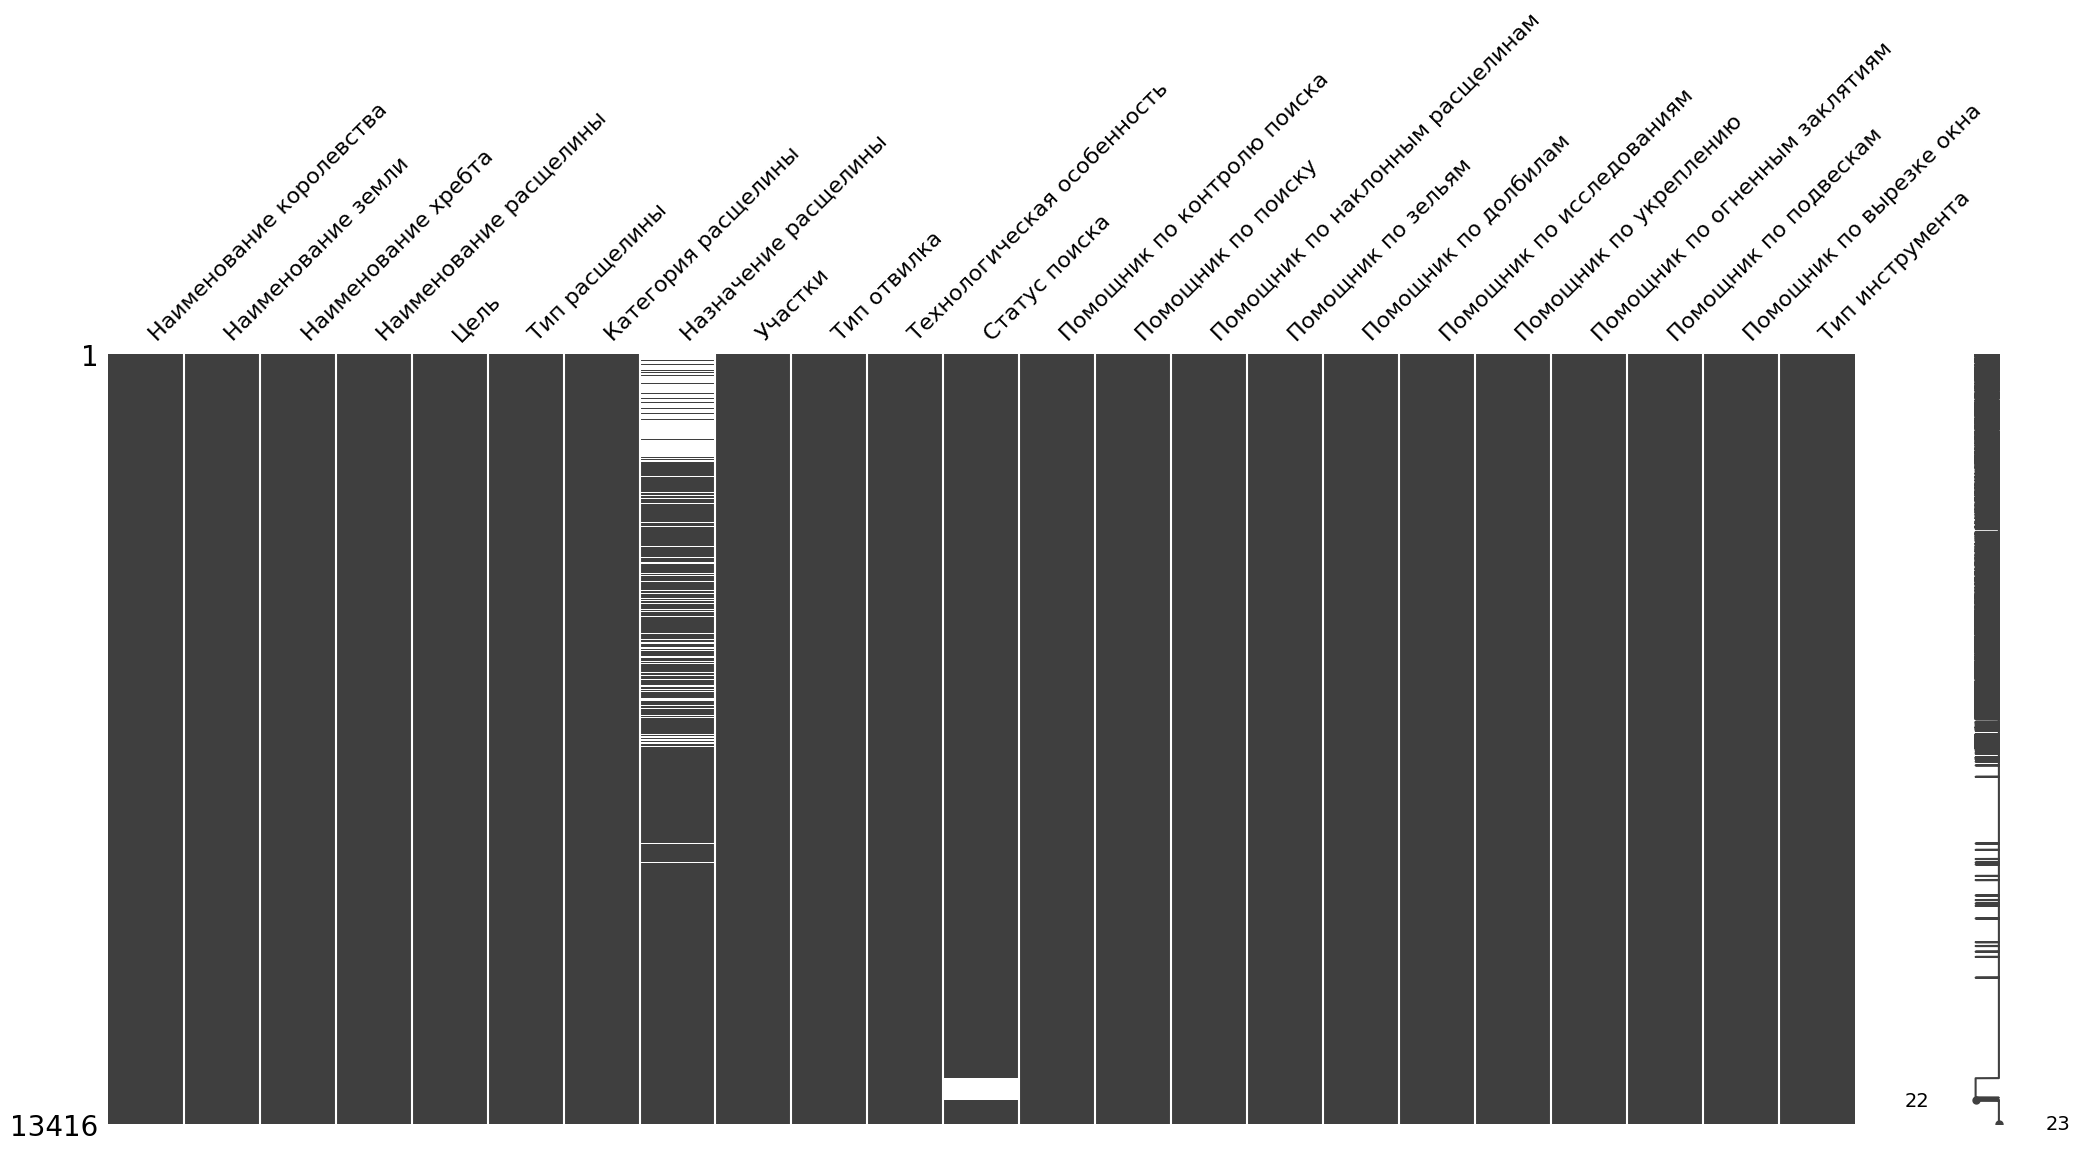

In [ ]:
msno.matrix(df[data_cat_cols])

Пропусков по категориальным признакам не много. Больше всего пропусков по признаку Назначение расщелены, больше всего пропусков в начале, дальше по строкам разрывов всё меньше.

Также пропуски есть в признаке Статус поиска. Они представляют собой единую, неразрывную группу на несколько сотен строк. Относительно предыдущего случая эти пропуски выглядят аномально, как будто на их месте должна быть иная категория.

In [ ]:
df['Статус поиска'].value_counts()

Статус поиска
завершен      12868
в процессе      165
Name: count, dtype: int64

<Axes: >

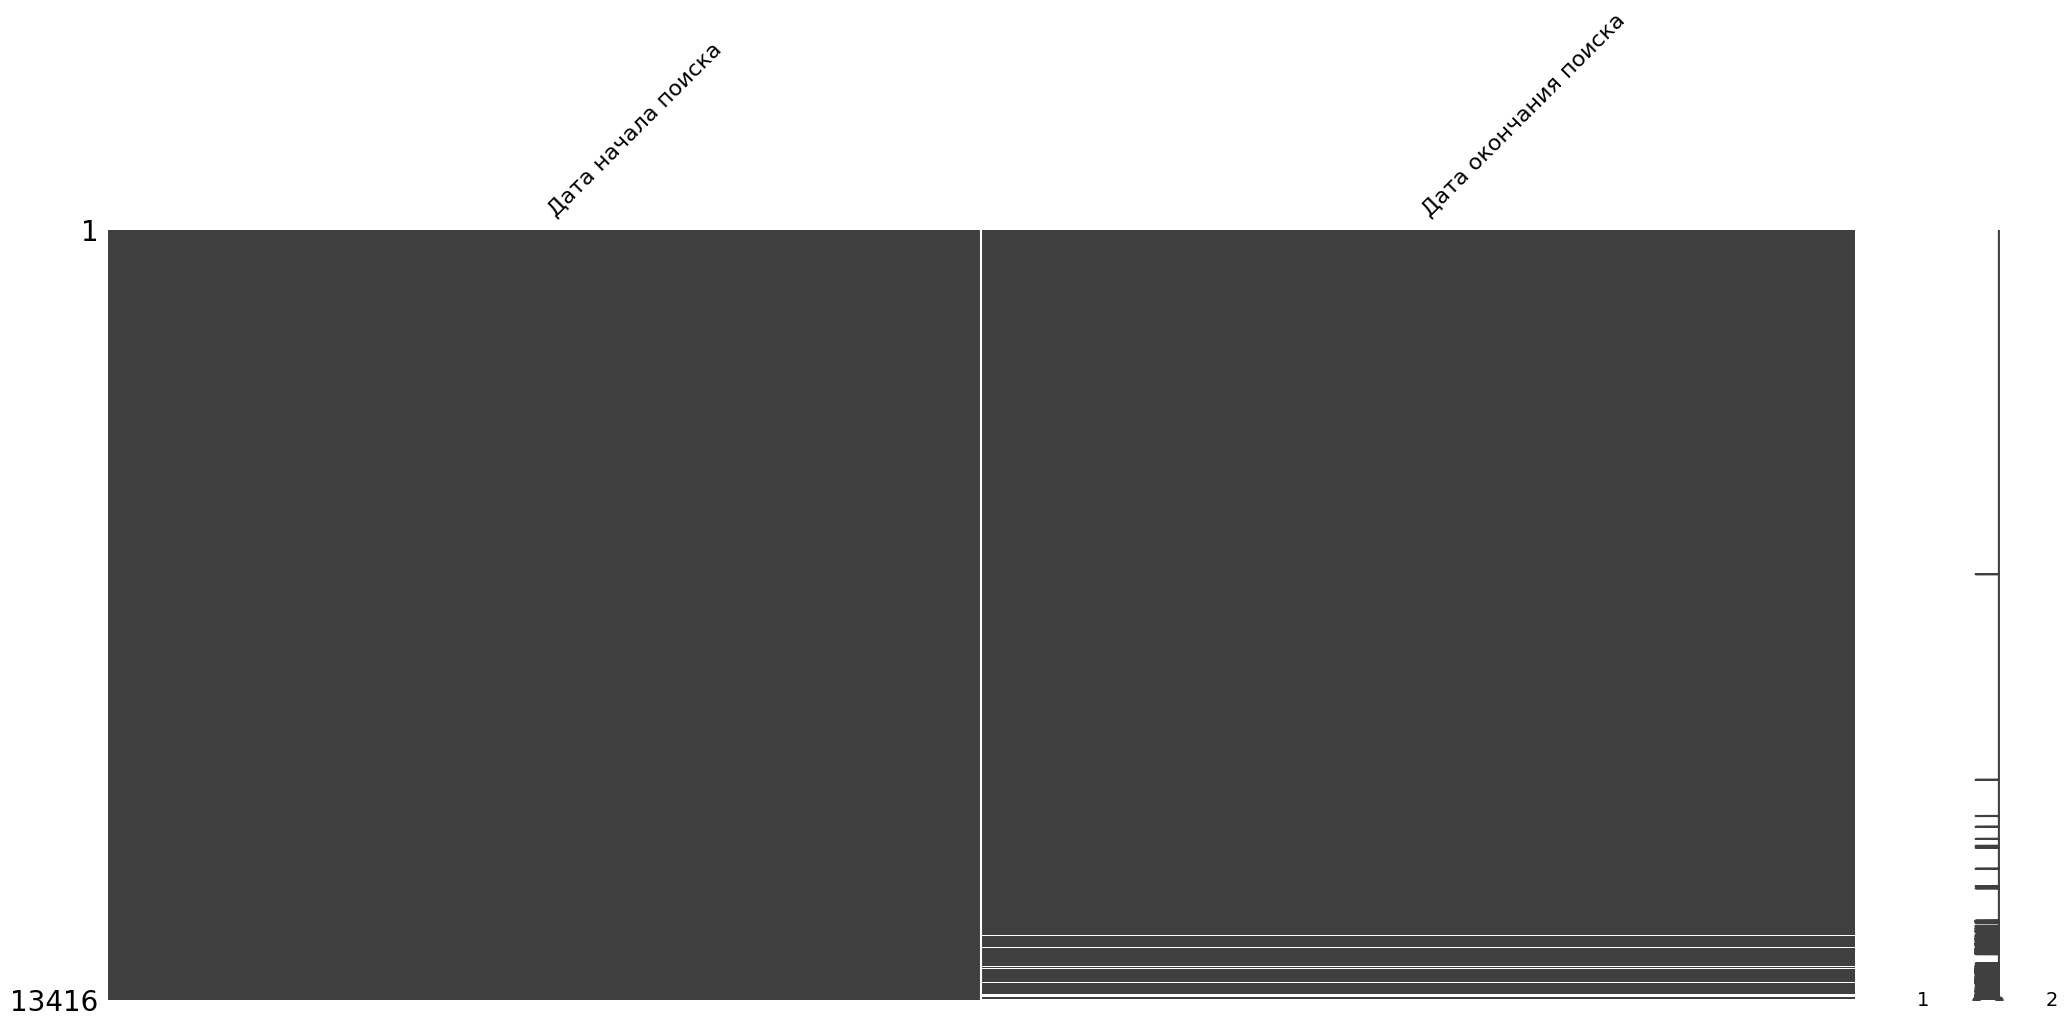

In [ ]:
data_date_cols = df.columns[51:]
msno.matrix(df[data_date_cols])

К сожалению, я вынужден удалить строки с пропусками по признаку Дата окончания поиска, иначе не будет возможности зафиксировать сам срок поисков. То же касается строк со статусом поиска "в процессе".

<Axes: >

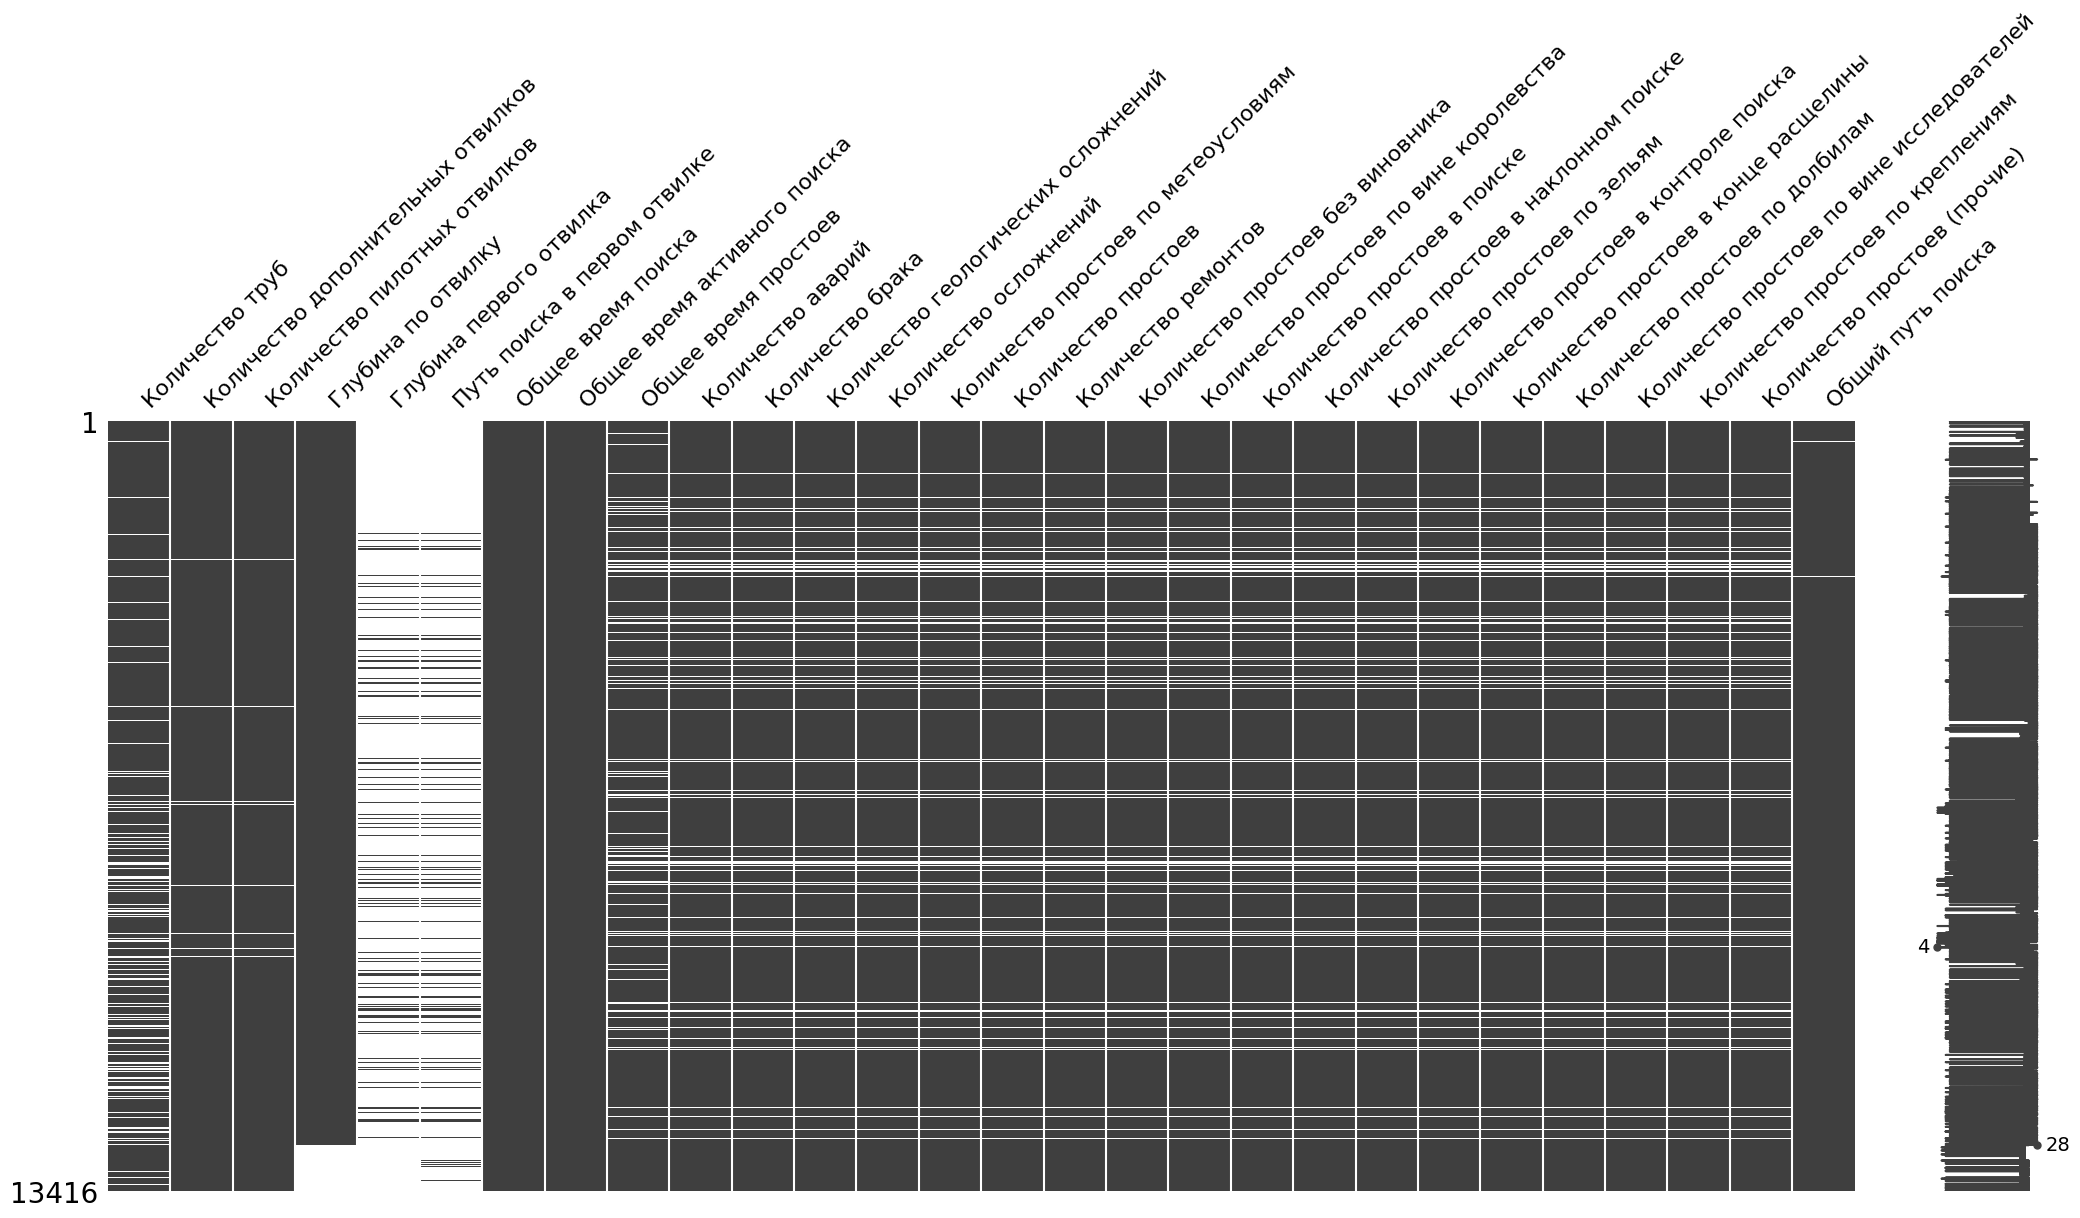

In [ ]:
msno.matrix(df[data_num_cols])

Бросаются в глаза столбцы:

  1) Глубина по отвилку. В столбце есть целый блок пропусков ближе к концу. При том, что никаких пропусков кроме этого проебла не наблюдалось. Можно предположить, что в более поздних датах иссследования подземелья эту глубину перестали замерять, из-за близости к концу подземелья. Это предположение ещё следует проверить.


  2) Глубина первого отвилка. Путь поиска в первом отвилке. Эти столбцы заполнены не более чем на 10 % от общего числа строк. Скорее всего этих первых отвилков, в разветвлении ходов подземелья было не так уже и много, что и логично первый отвилок по расщелине всегда один. Заполненные строки по этим признакам совпадают, что может подтверждать вышесказанное. Соответсвенно пропуски заполним занчением 0, если первого отвилка нет, значит его глубина и пройденный путь нулевые.

  3) Все признаки от столбца Общее количество проестоев до столбца Количество простоев (прочие). Эти признаки количественные и связаны с простоями по различным причинам, авариям, осложенениями и браком. То есть все они описывают кол-во произошедших ситуаций разного характера из-за которых исследование замедлилось. Строки с пропусками в большинстве случаев совпадают по всем этим признакам, значит можно предположить, что простоев не было зафиксировано, либо их кол-во осталось неизвестным. Значение 0 часто встречается в заполненных строках по этим признакам. Поэтому я склоняюсь к заполнению этих столбцов значением 0, в том случае если в строке по по всем выбранным столбцам отсутствует значение.

  4) Во всех остальных случаях пропуски встречаются гораздо реже. Ячейки можно зполнить средними значениями, либо применить mice, тогда пропуски будут заполняться на основании взаимосвязи с другими признаками.

In [ ]:
df = df.dropna(subset=['Дата окончания поиска'])
df['Статус поиска'].value_counts()

Статус поиска
завершен      12868
в процессе       11
Name: count, dtype: int64

Действительно взаимосвязь статуса поиска в проессе и пропусков дате окончания поисков подтвердилась

In [ ]:
nans = df.columns[31:50]
na_col = df[nans].isna().all(axis=1)
df.loc[na_col, nans] = df.loc[na_col, nans].fillna(0)

<Axes: >

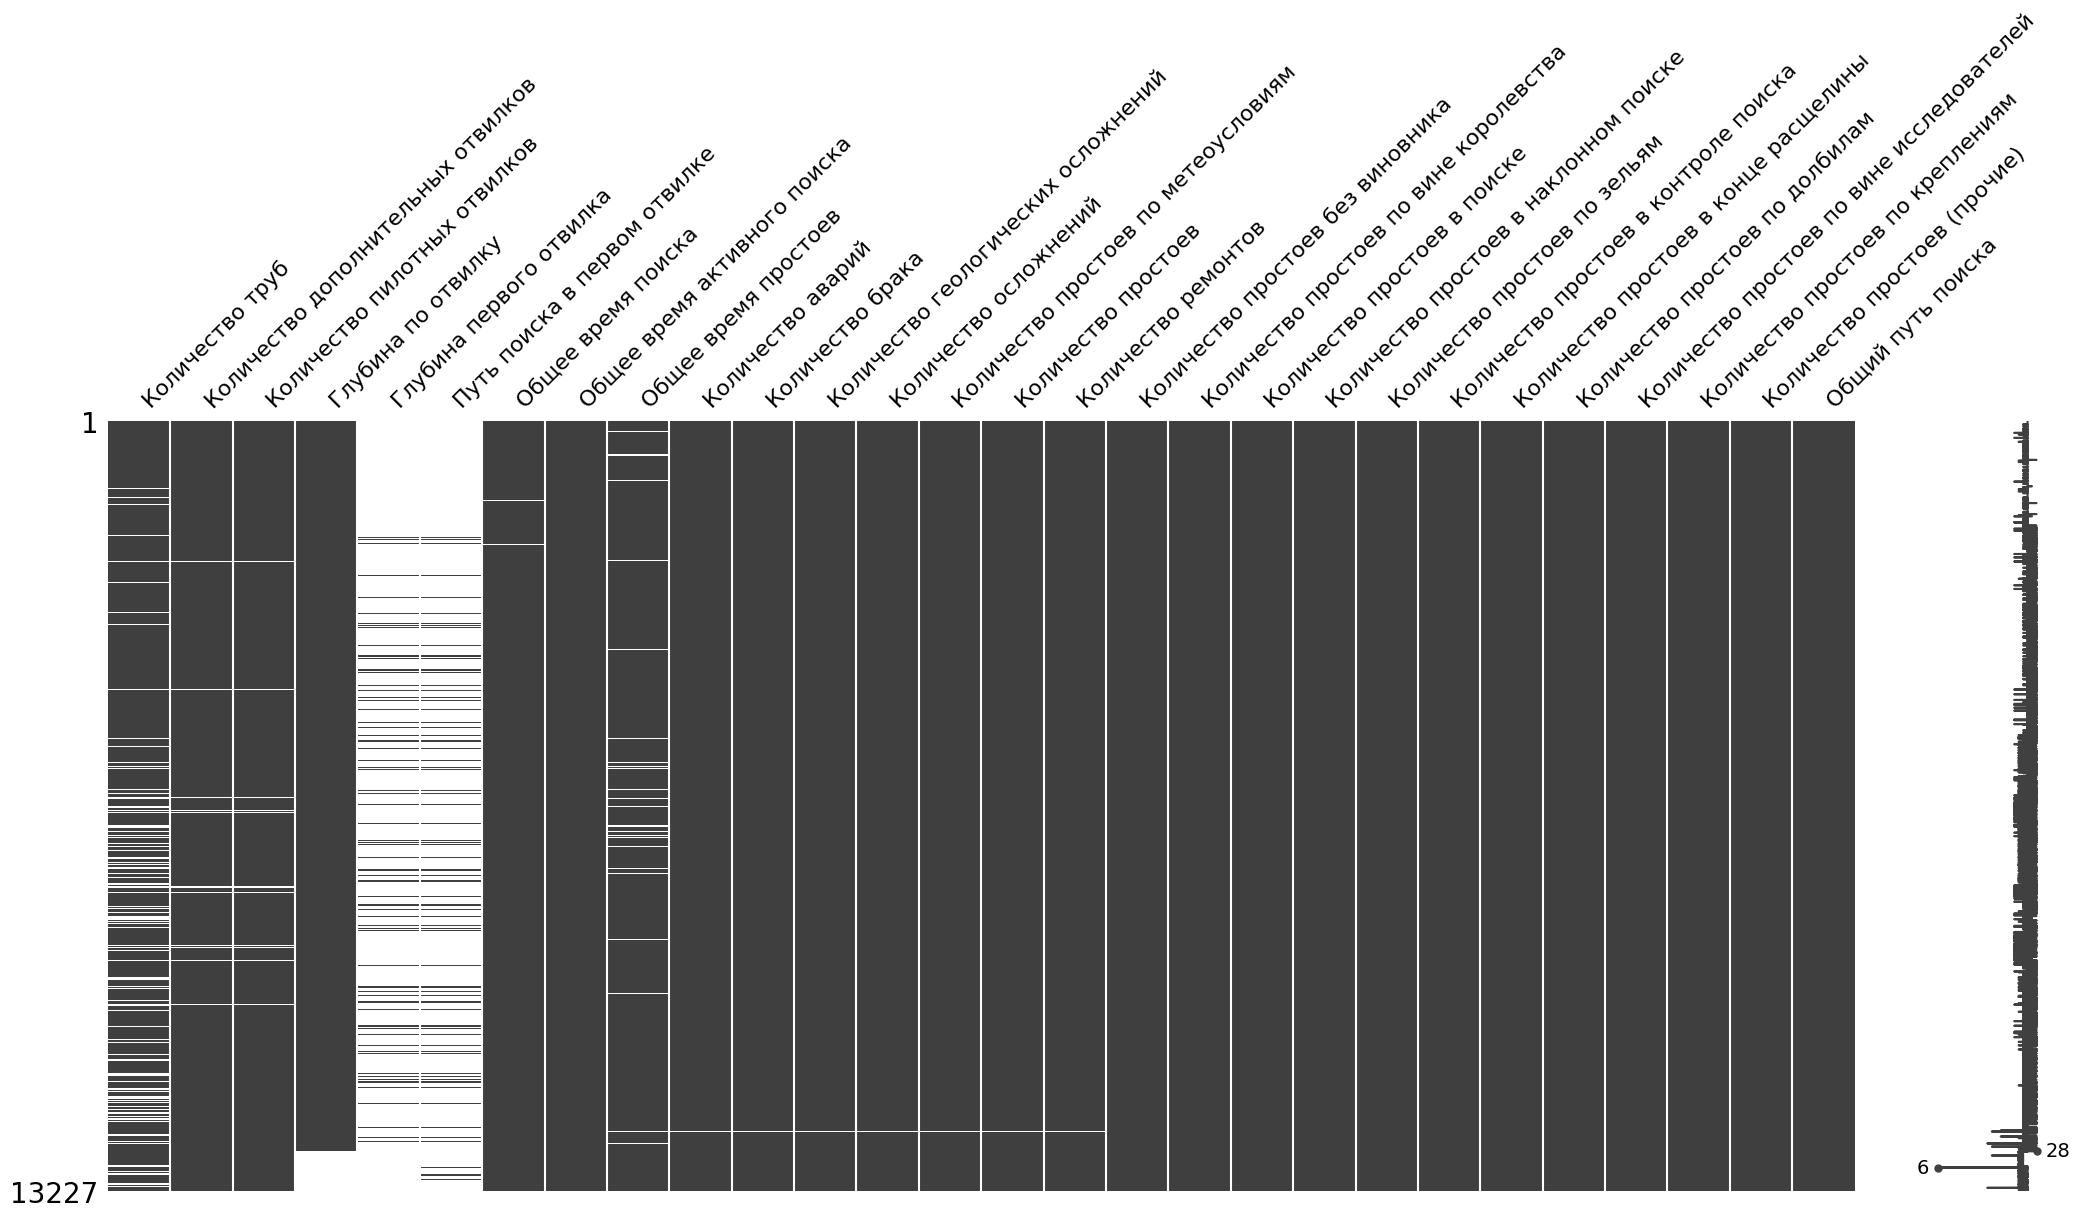

In [ ]:
msno.matrix(df[data_num_cols])

In [ ]:
df['Общее время поиска'] = df['Общее время поиска'].fillna(df['Общее время поиска'].mean())

In [ ]:
df['Количество дополнительных отвилков'] = df['Количество дополнительных отвилков'].fillna(df['Количество дополнительных отвилков'].median())
df['Количество пилотных отвилков'] = df['Количество пилотных отвилков'].fillna(df['Количество пилотных отвилков'].median())
df['Количество труб'] = df['Количество труб'].fillna(df['Количество труб'].median())

In [ ]:
df[df.columns[32:39]] = df[df.columns[32:39]].fillna(0)

Во всех оставшихся случаях, где пропуски не имеют закономерного характера или их сложно заполнить в ручную, использую итеративный метод заполнения на основе закономерностей по остальным количественным признакам.

In [ ]:
imputer = IterativeImputer(random_state=42, max_iter=10)
spec_cols = data_num_cols.difference(['Путь поиска в первом отвилке', 'Глубина первого отвилка', 'Количество труб'])
df_train = df.loc[:, spec_cols]
imputer.fit(df_train)
df_imputed = imputer.transform(df_train)
df.loc[:, spec_cols] = df_imputed

<Axes: >

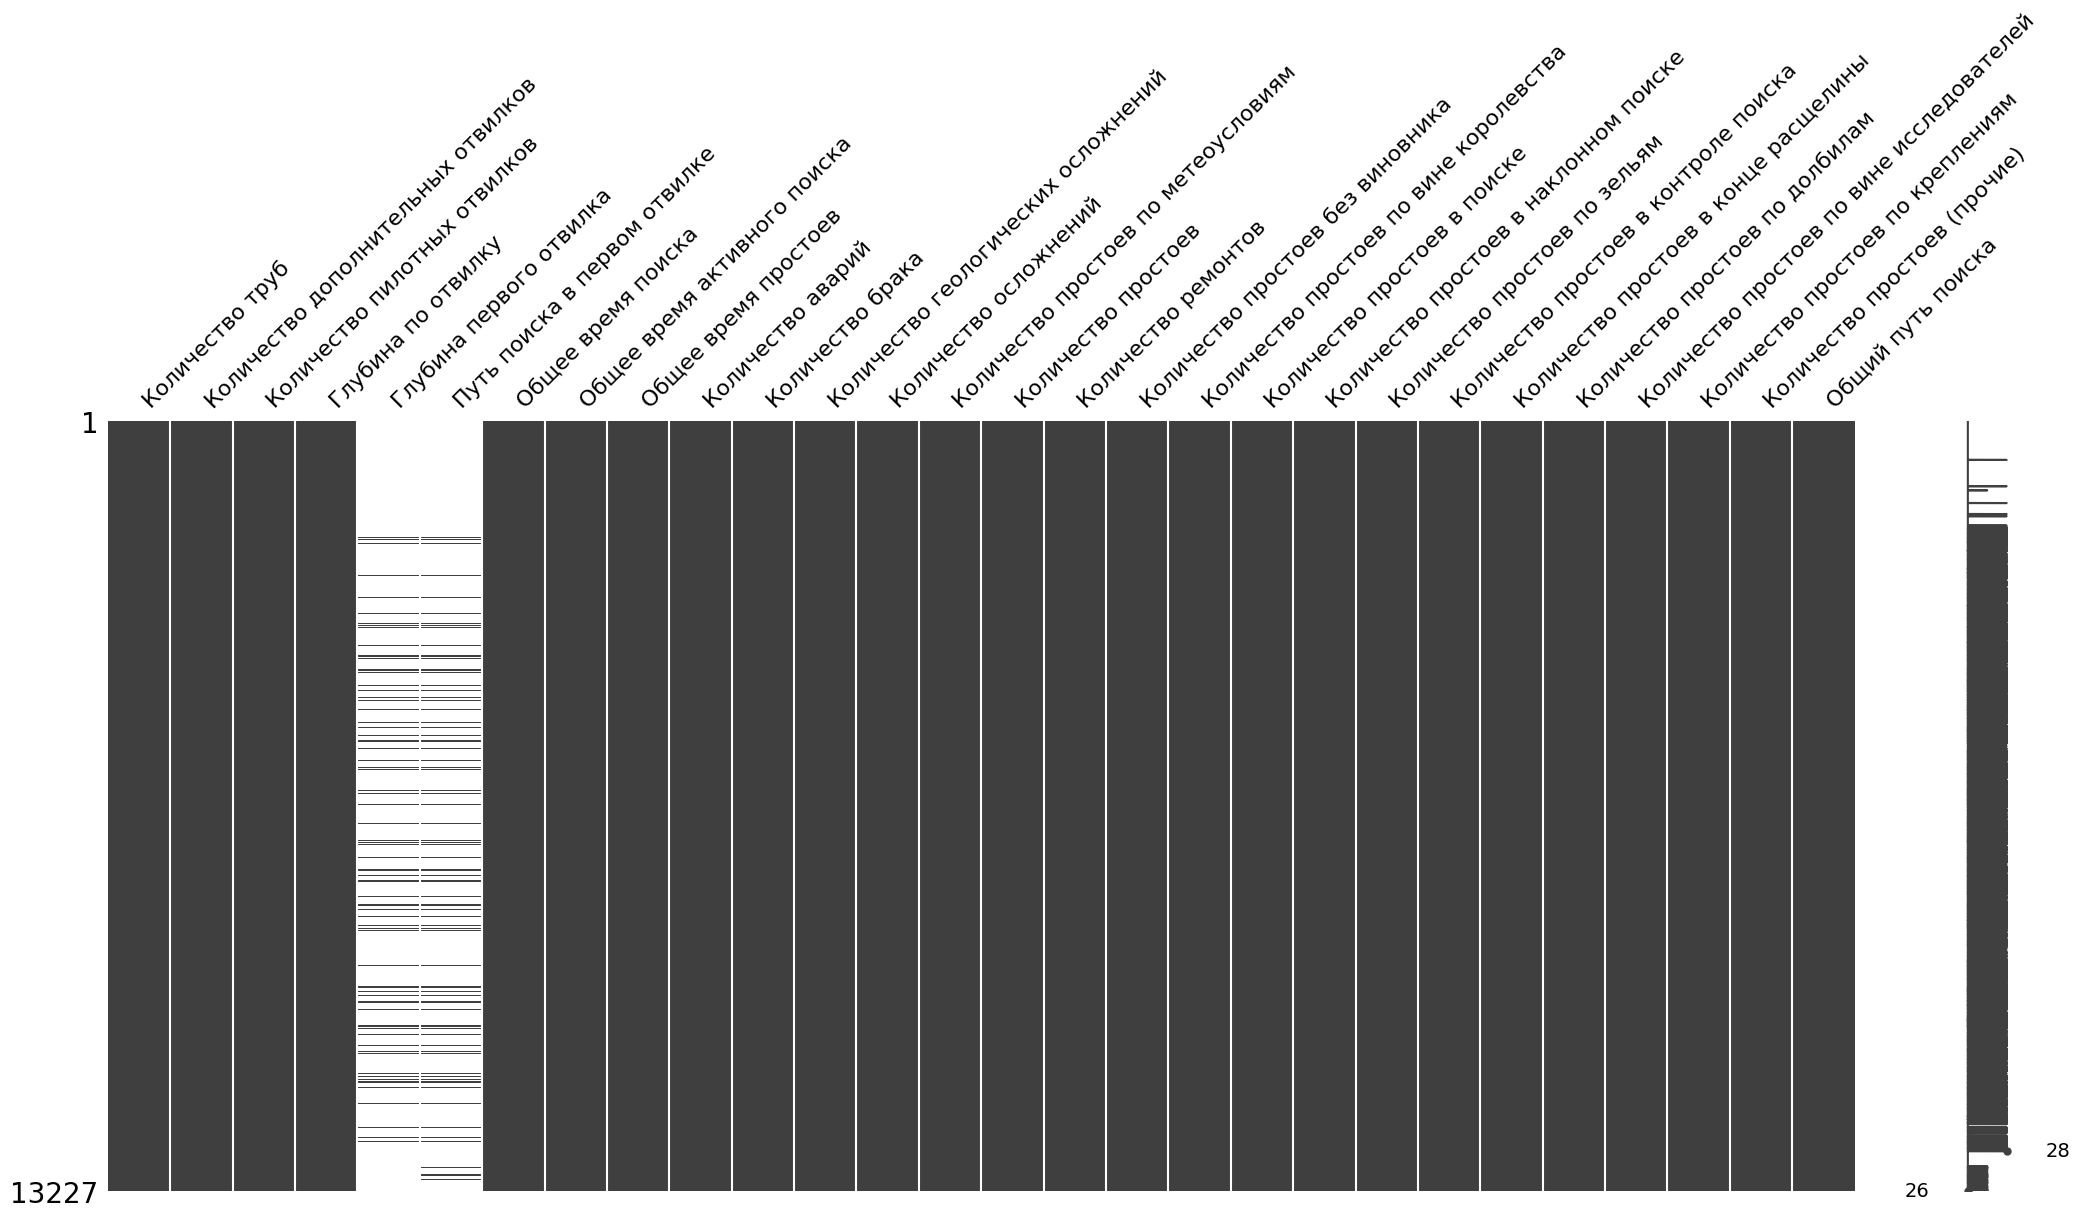

In [ ]:
msno.matrix(df[data_num_cols])

In [ ]:
df['Глубина первого отвилка'] = df['Глубина первого отвилка'].fillna(0)
df['Путь поиска в первом отвилке'] = df['Путь поиска в первом отвилке'].fillna(0)

In [ ]:
df['Статус поиска'] = df['Статус поиска'].fillna('завершен')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13227 entries, 0 to 13414
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Наименование королевства                    13227 non-null  object        
 1   Наименование земли                          13227 non-null  object        
 2   Наименование хребта                         13227 non-null  object        
 3   Наименование расщелины                      13227 non-null  int64         
 4   Цель                                        13227 non-null  object        
 5   Тип расщелины                               13225 non-null  object        
 6   Категория расщелины                         13227 non-null  object        
 7   Назначение расщелины                        10611 non-null  object        
 8   Участки                                     13227 non-null  object        
 9   Тип отвилка

# Исследовательский анализ

## Категориальные признаки

In [ ]:
def extremal_nunique(df, df_features):
  low_feat = []
  high_feat = []
  extremal_feat = []
  for feat in df_features:
    if df[feat].nunique() <= 15:
      low_feat.append(feat)
    elif df[feat].nunique() > 15 and df[feat].nunique() < 150:
      high_feat.append(feat)
    else:
      extremal_feat.append(feat)
  return low_feat, high_feat, extremal_feat

In [ ]:
low_feat_cat, high_feat_cat, extremal_feat = extremal_nunique(df, data_cat_cols)

In [ ]:
extremal_feat

['Наименование хребта',
 'Наименование расщелины',
 'Помощник по наклонным расщелинам',
 'Помощник по укреплению']

In [ ]:
def extremal_count_cat(df, df_fatures, palet):
  for feat in df_fatures:
    order = df[feat].value_counts().nlargest(30).index
    plt.subplots(figsize=(16, 20))
    sns.countplot(df[feat], palette=palet, order=order)
    plt.xlabel(f'{df[feat].name}')
    plt.ylabel('Количество')
    plt.title(f'Cтолбчатая диаграмма {df[feat].name}', fontsize=12)

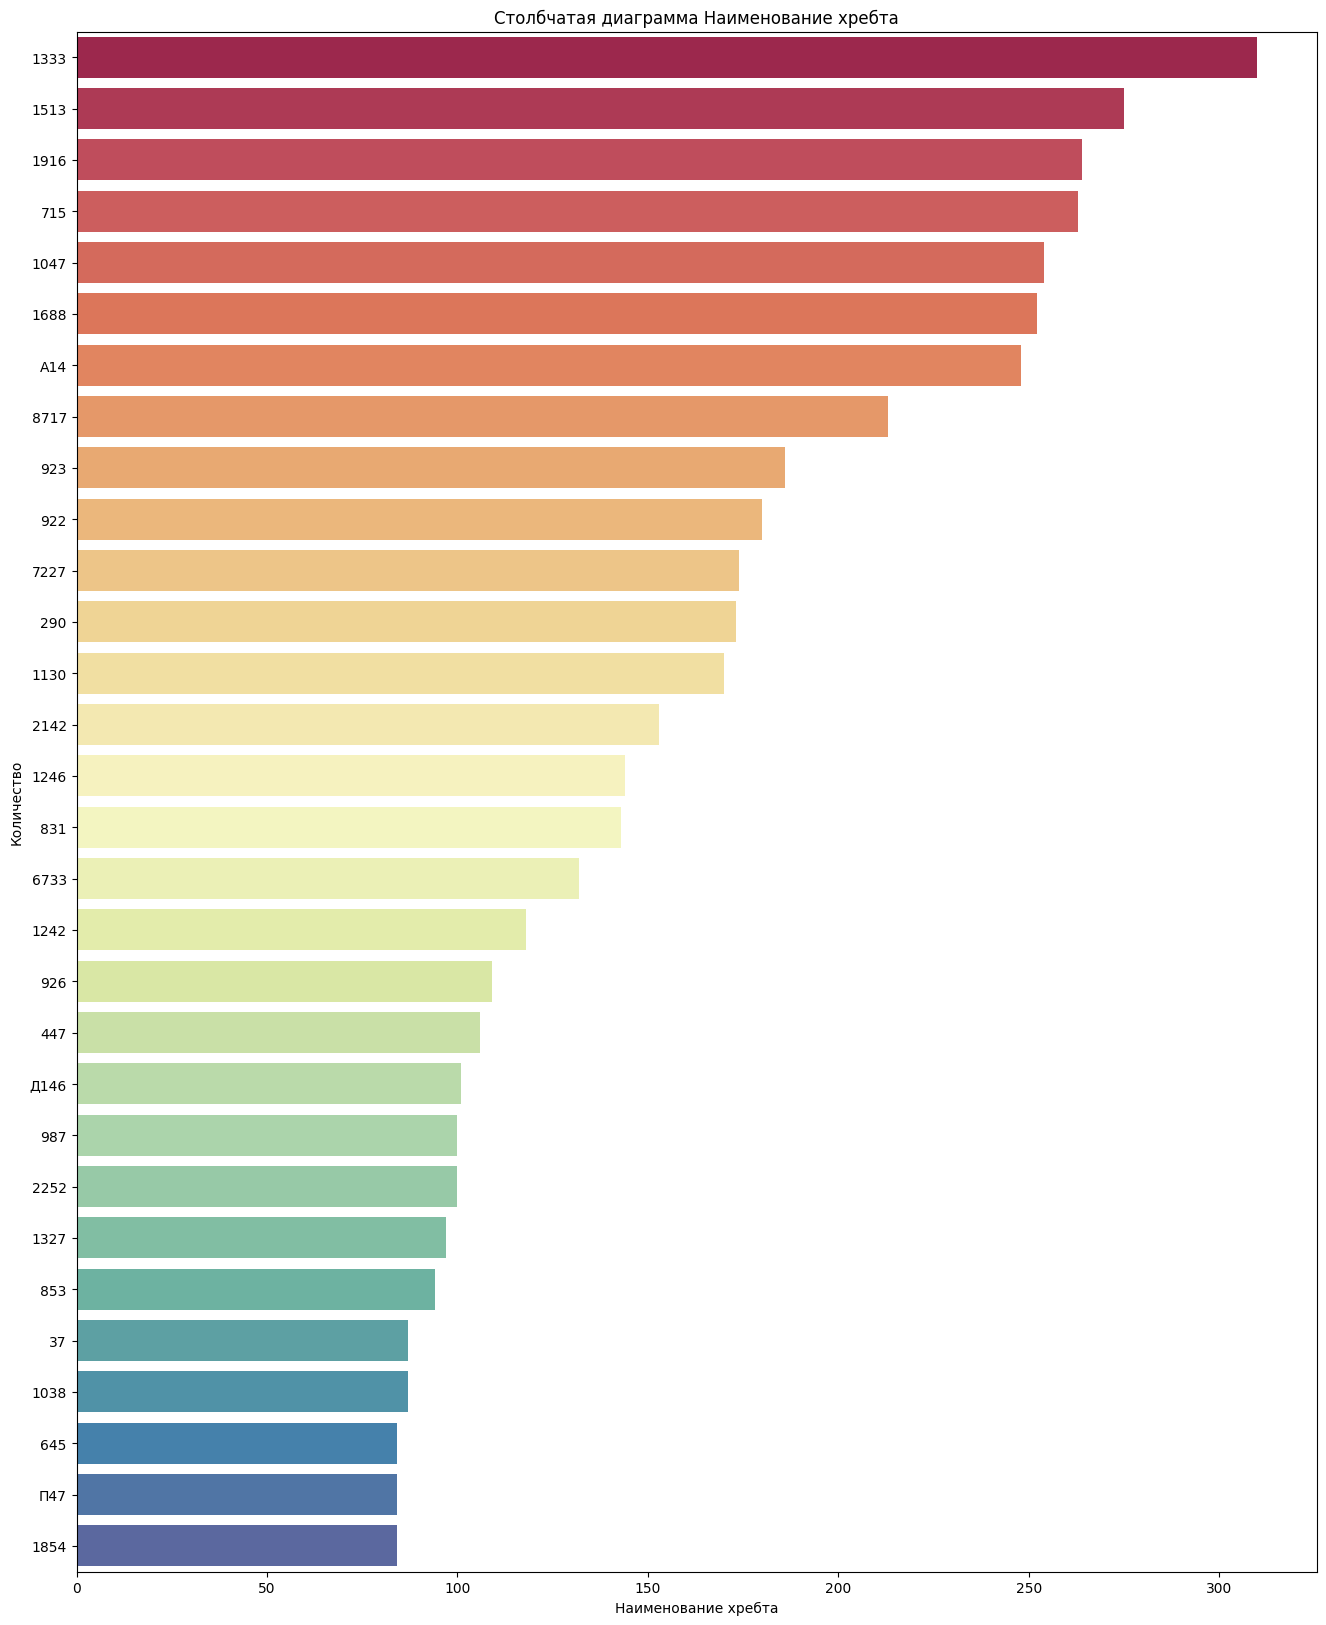

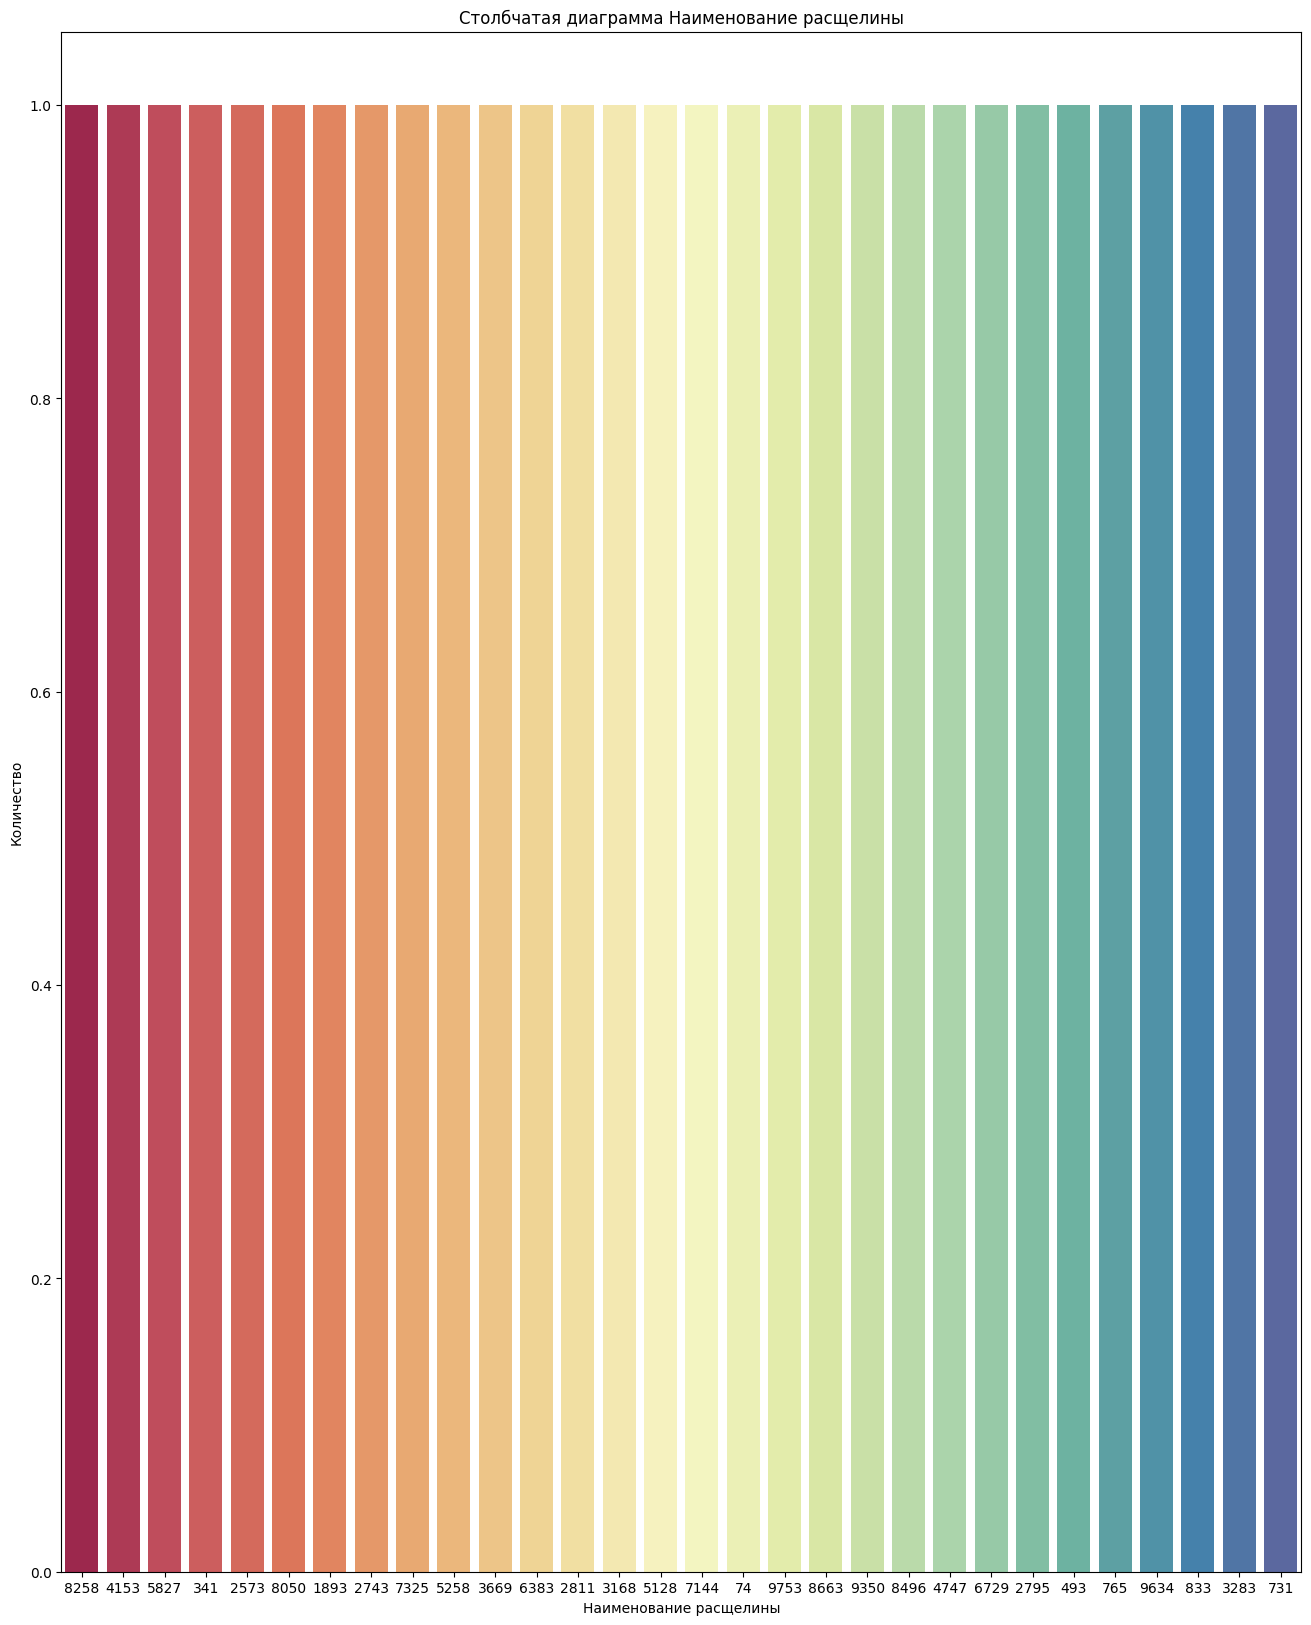

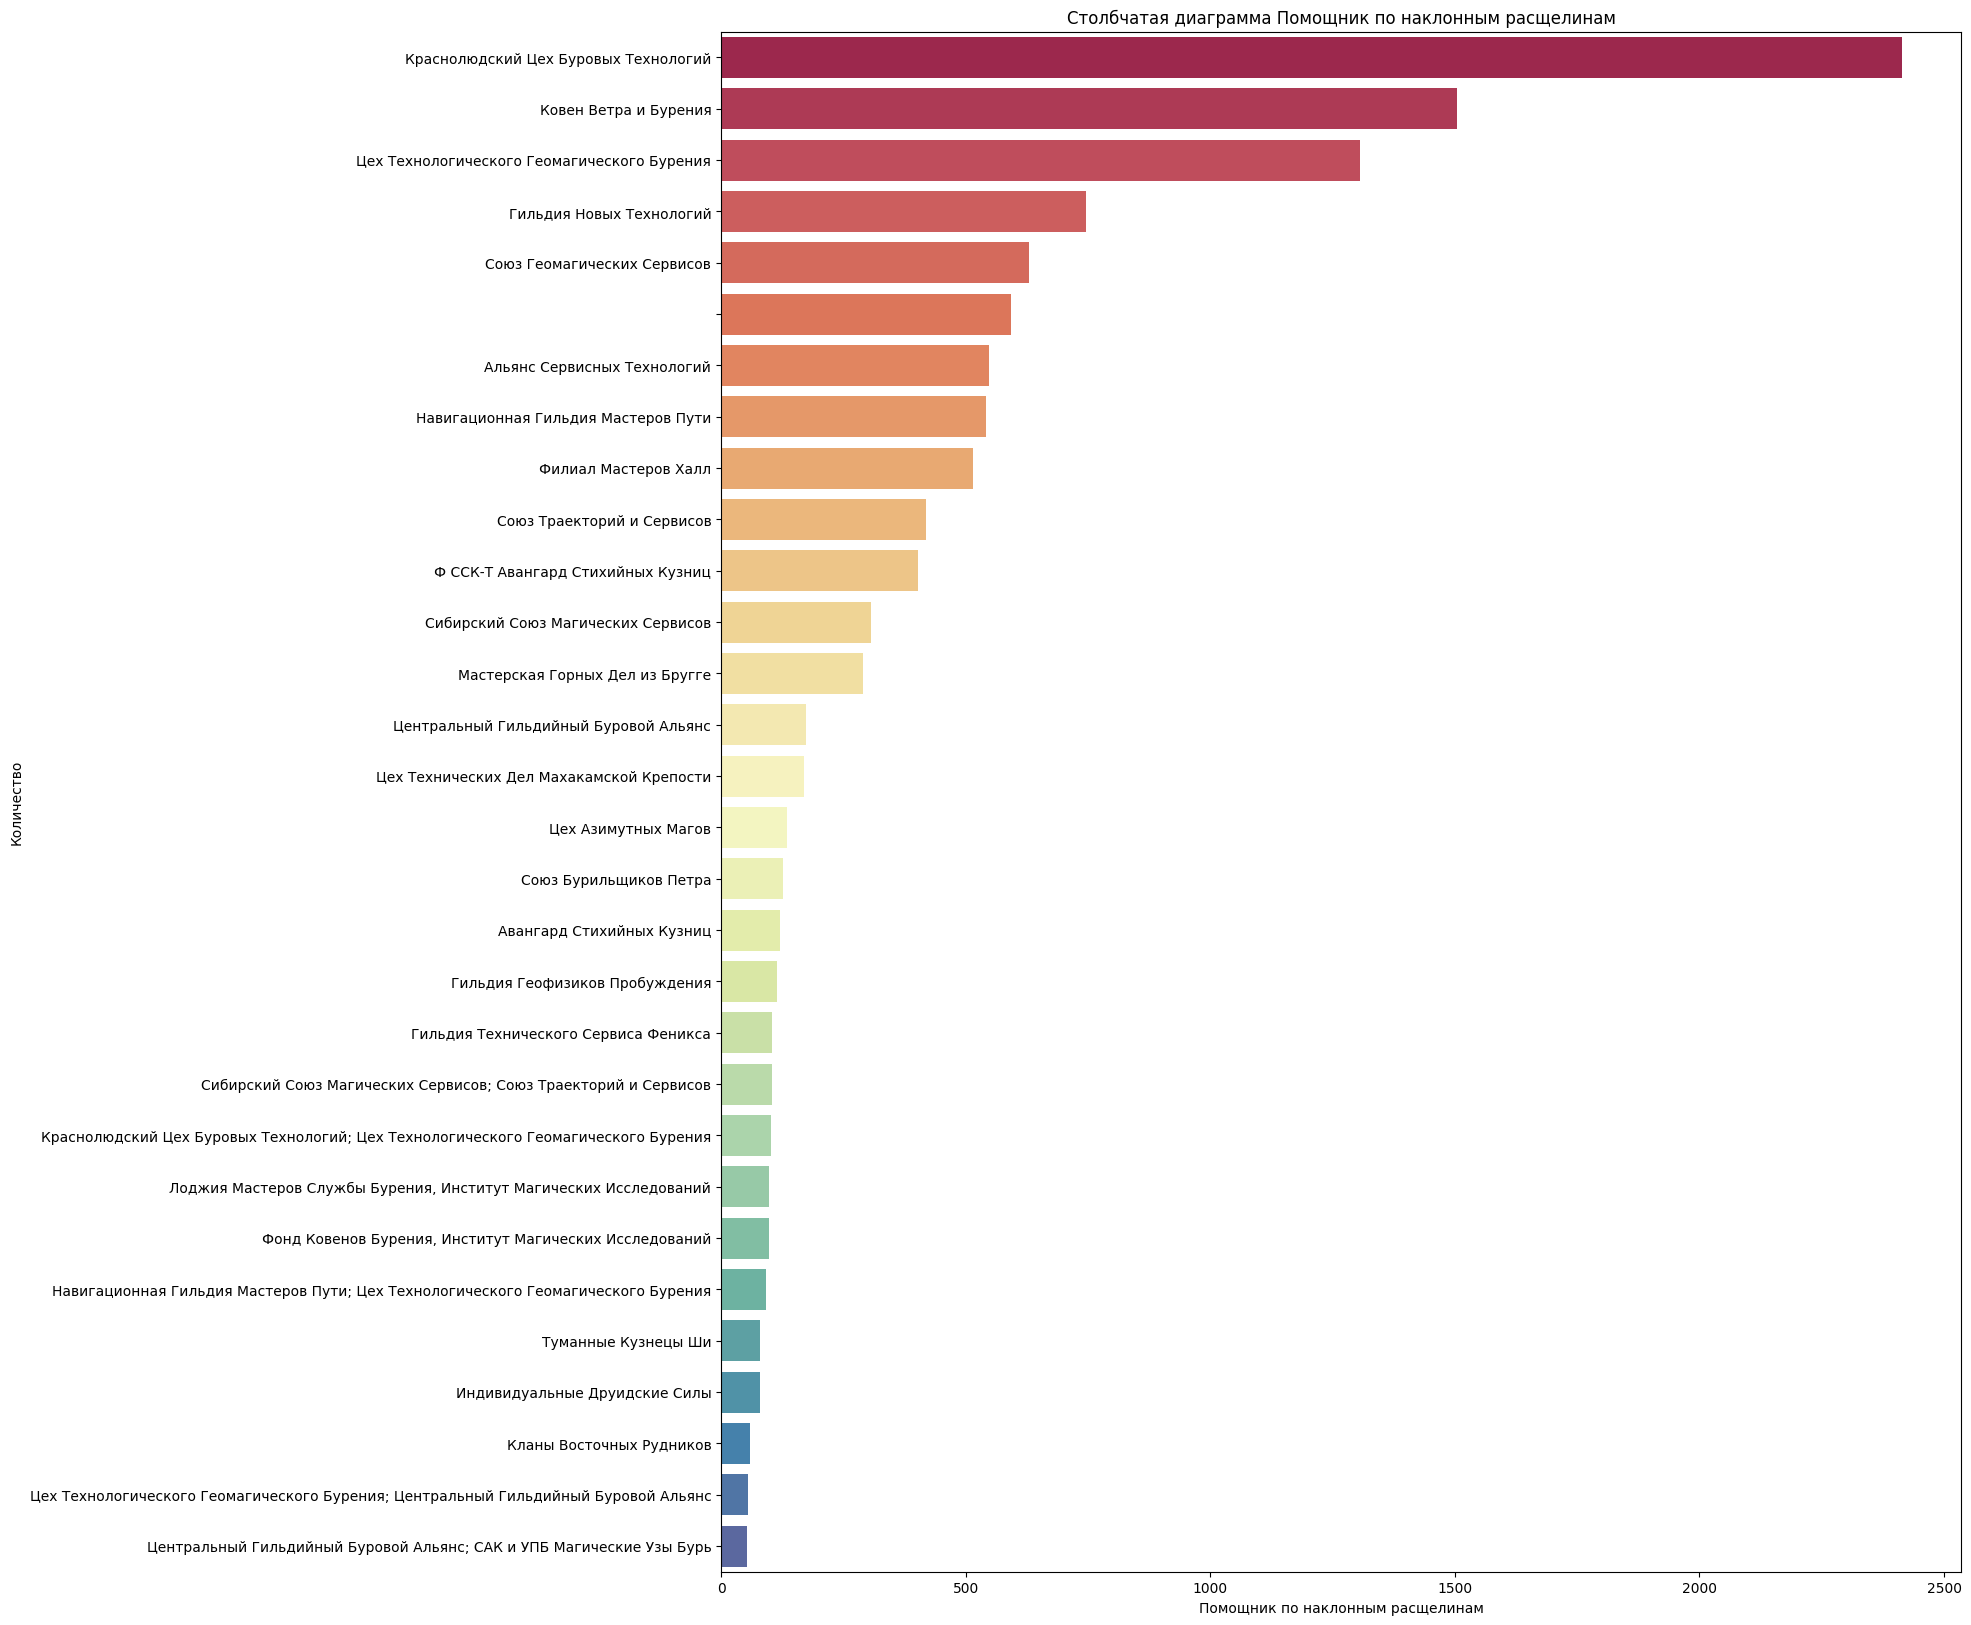

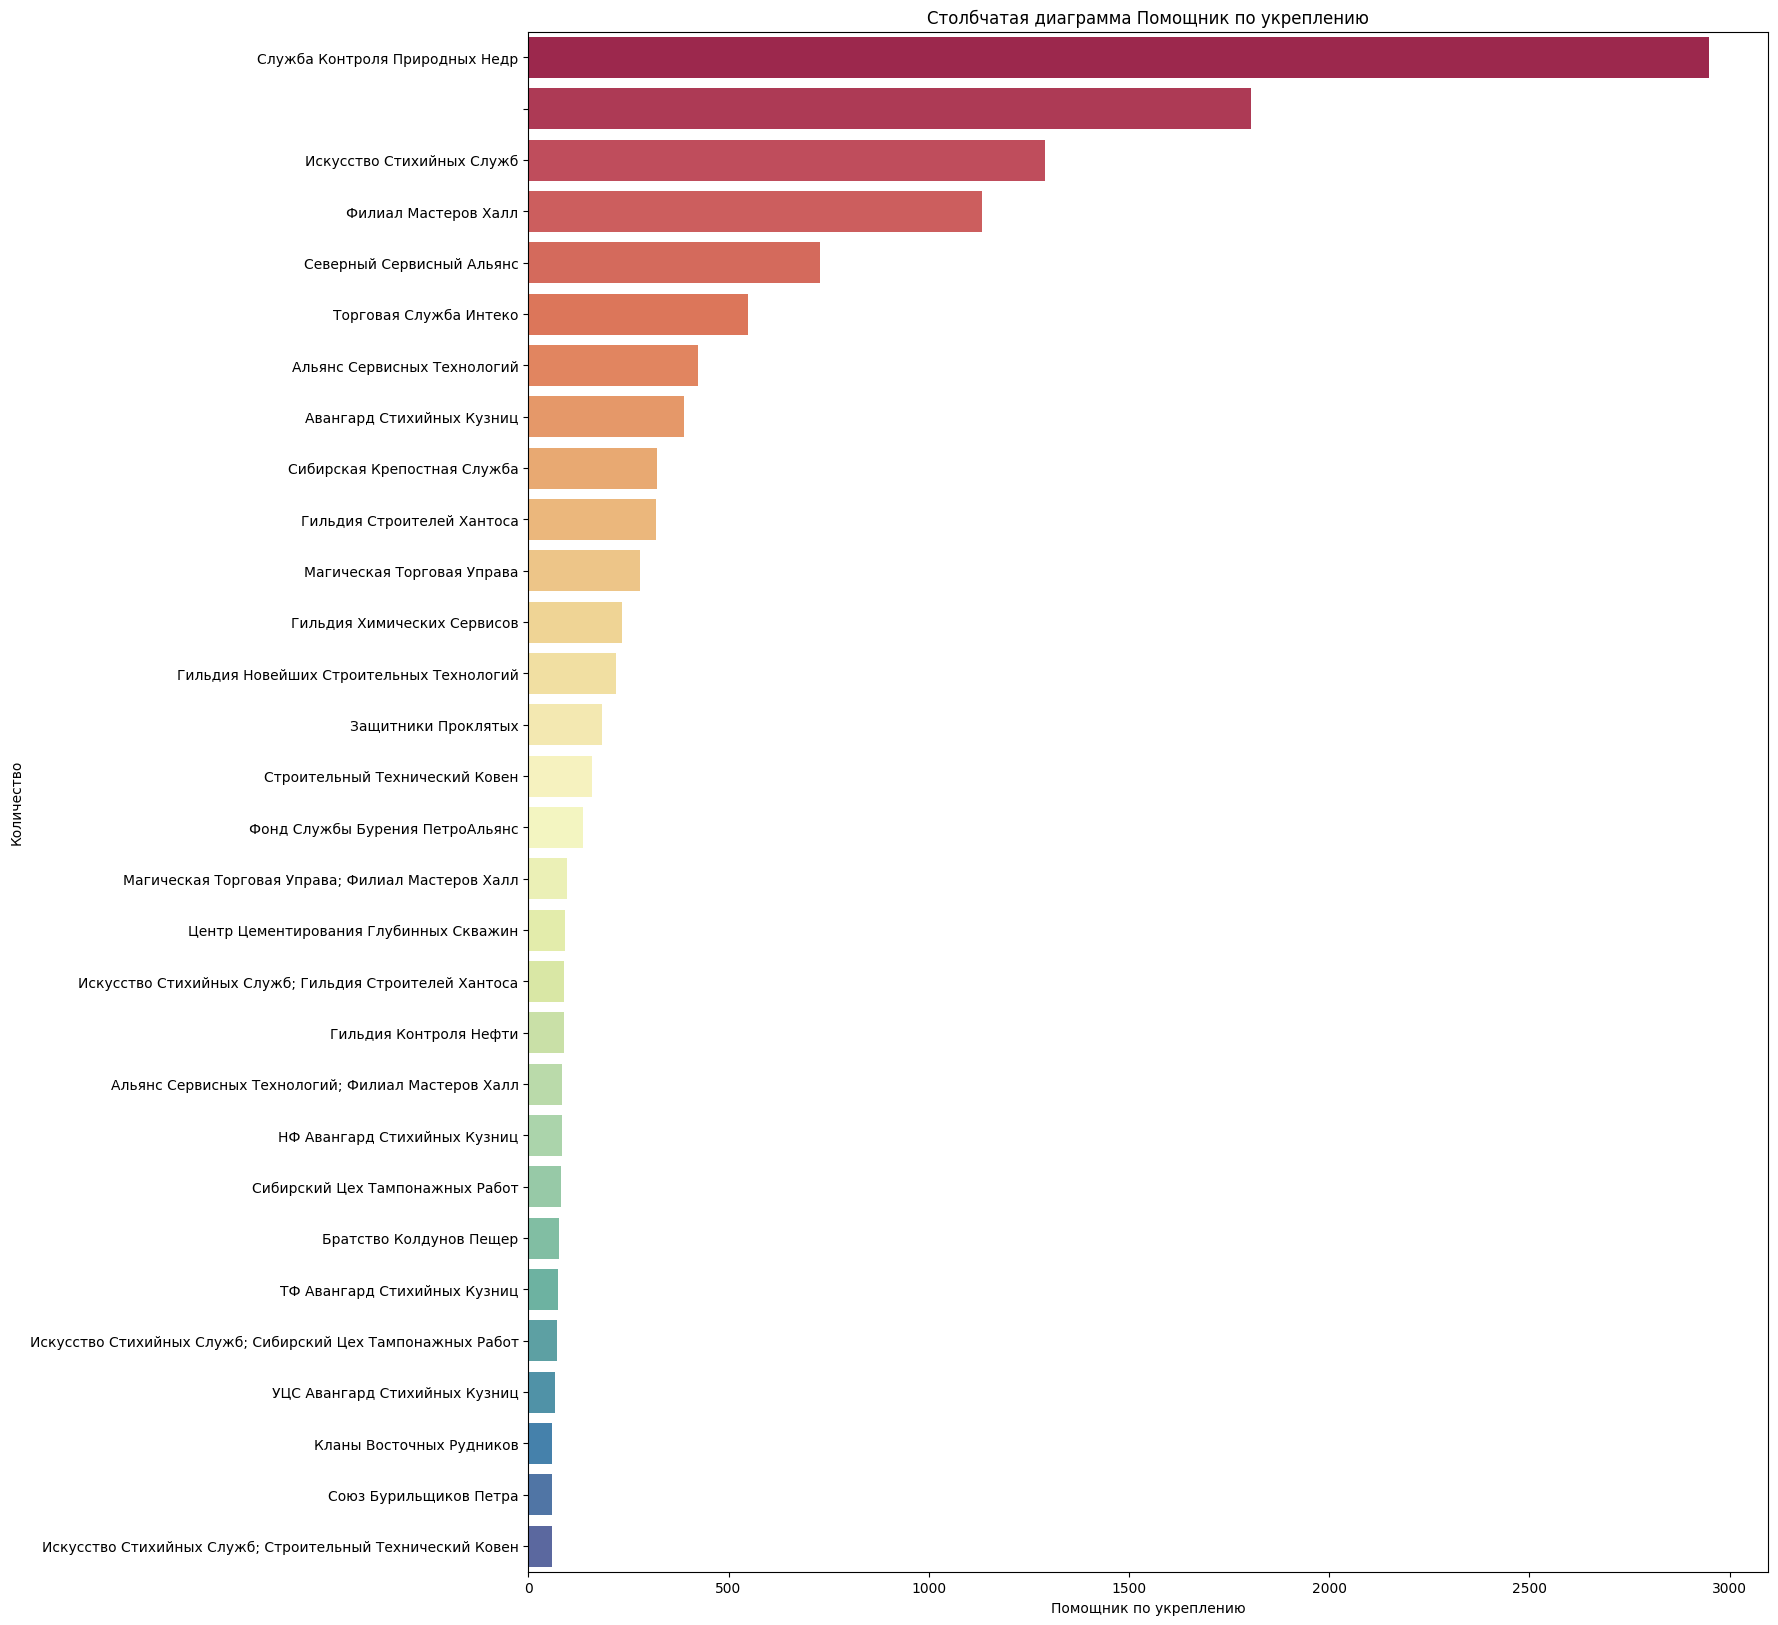

In [ ]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

extremal_count_cat(df, extremal_feat, "Spectral")

Начнем с рассмотрения признаков с экстремальным числом уникальных категорий. Категориальных признаков множество, поэтому проще разделить их на отдельные группы.

  1) Наименование хребта. 701 признак, т.е ровно столько горных кряжей было обследовано входе поисково-разведовательных работ. В ходе стадий дообучения и мониторинга модели могут появлятся новые горные системы и их хребты, ранее не изученные. Однако при дальнейших поисках ранее известные наименования хребтов менятся не должны, так как каждый из них относится к конкретной горной системе в конкретной местности.

  2) Наименование расщелины. Каждая категория представляет собой уникальный номер расщелины в подземелье. Всего таких 4900. Это крайне много. Чаще всего одну конкретную расщелину исследовали 29 раз. В остальных случаях куда меньше. Многие из этих расщелин остались на верхних уровнях подземелья и давно были полностью исследованы. Каждая расщелина уникальная и находится в каком-либо хребте. Что значит, если мы и находим новую расщелину, то и номер у нее новый. Однако признак важен при дальнейшей эксплуатации и дообучении модели, ведь именно по уникальным расщелинам определяется срок поиска.

  3) Помощник по наклонным расщелинам. Этот признак содержит названия организаций, команд и объединений, которые осуществляли работы различного типа в целях иследования и поиска артефактов. Так в случае с наклонными расщелинами чаще всего принимал участие Краснолюдский центр Буровых технологий. Т.е работали краснолюды, а они как известно профессиональные горняки. Не лишним будет упомянуть про объединения. Есть записи, где одной задачей занималось несколько команд, либо действие контракта было приостановлено и в работу вступила уже другая команда. Они представлены отдельной категорией и записаны как перечень названий через запятую. Всё вышеописанное касается всех признаков про Помощников. При выполнении разных задач могут участвовать одни и те же бригады, а могут быть и команды с узкого профилем, выполняющие только один тип работ из имеющихся. В признаках помощников различаются только сами названия этих команд и наиболее успешные команды-лидеры, где наибольшее кол-во отраслевых работ выполнили именно они.

  Все эти признаки безусловно важные. Множество организаций находятся на службе у королевств Севера или управляется магами или принадлежит краснолюдам. Когда поиски артефактов будут продолжены, многие принимавшие участие ранее команды за звонкую монету присоединятся к исследованию. Могут добавиться новые команды, наиболее успешные ранее могут оказаться не у дел, а какие-то перстанут существовать. Однако маги живут достаточно долго и их кампании скорее всего будут действительны. Жизнь краснолюдов коротка по сравнению с чародеями, но как у настоящих ремесленников и труженников дела пращуров наслдуют их дети. Так кранолюдские команды продолжат существовать и дальше, несмотря на смену составов.   

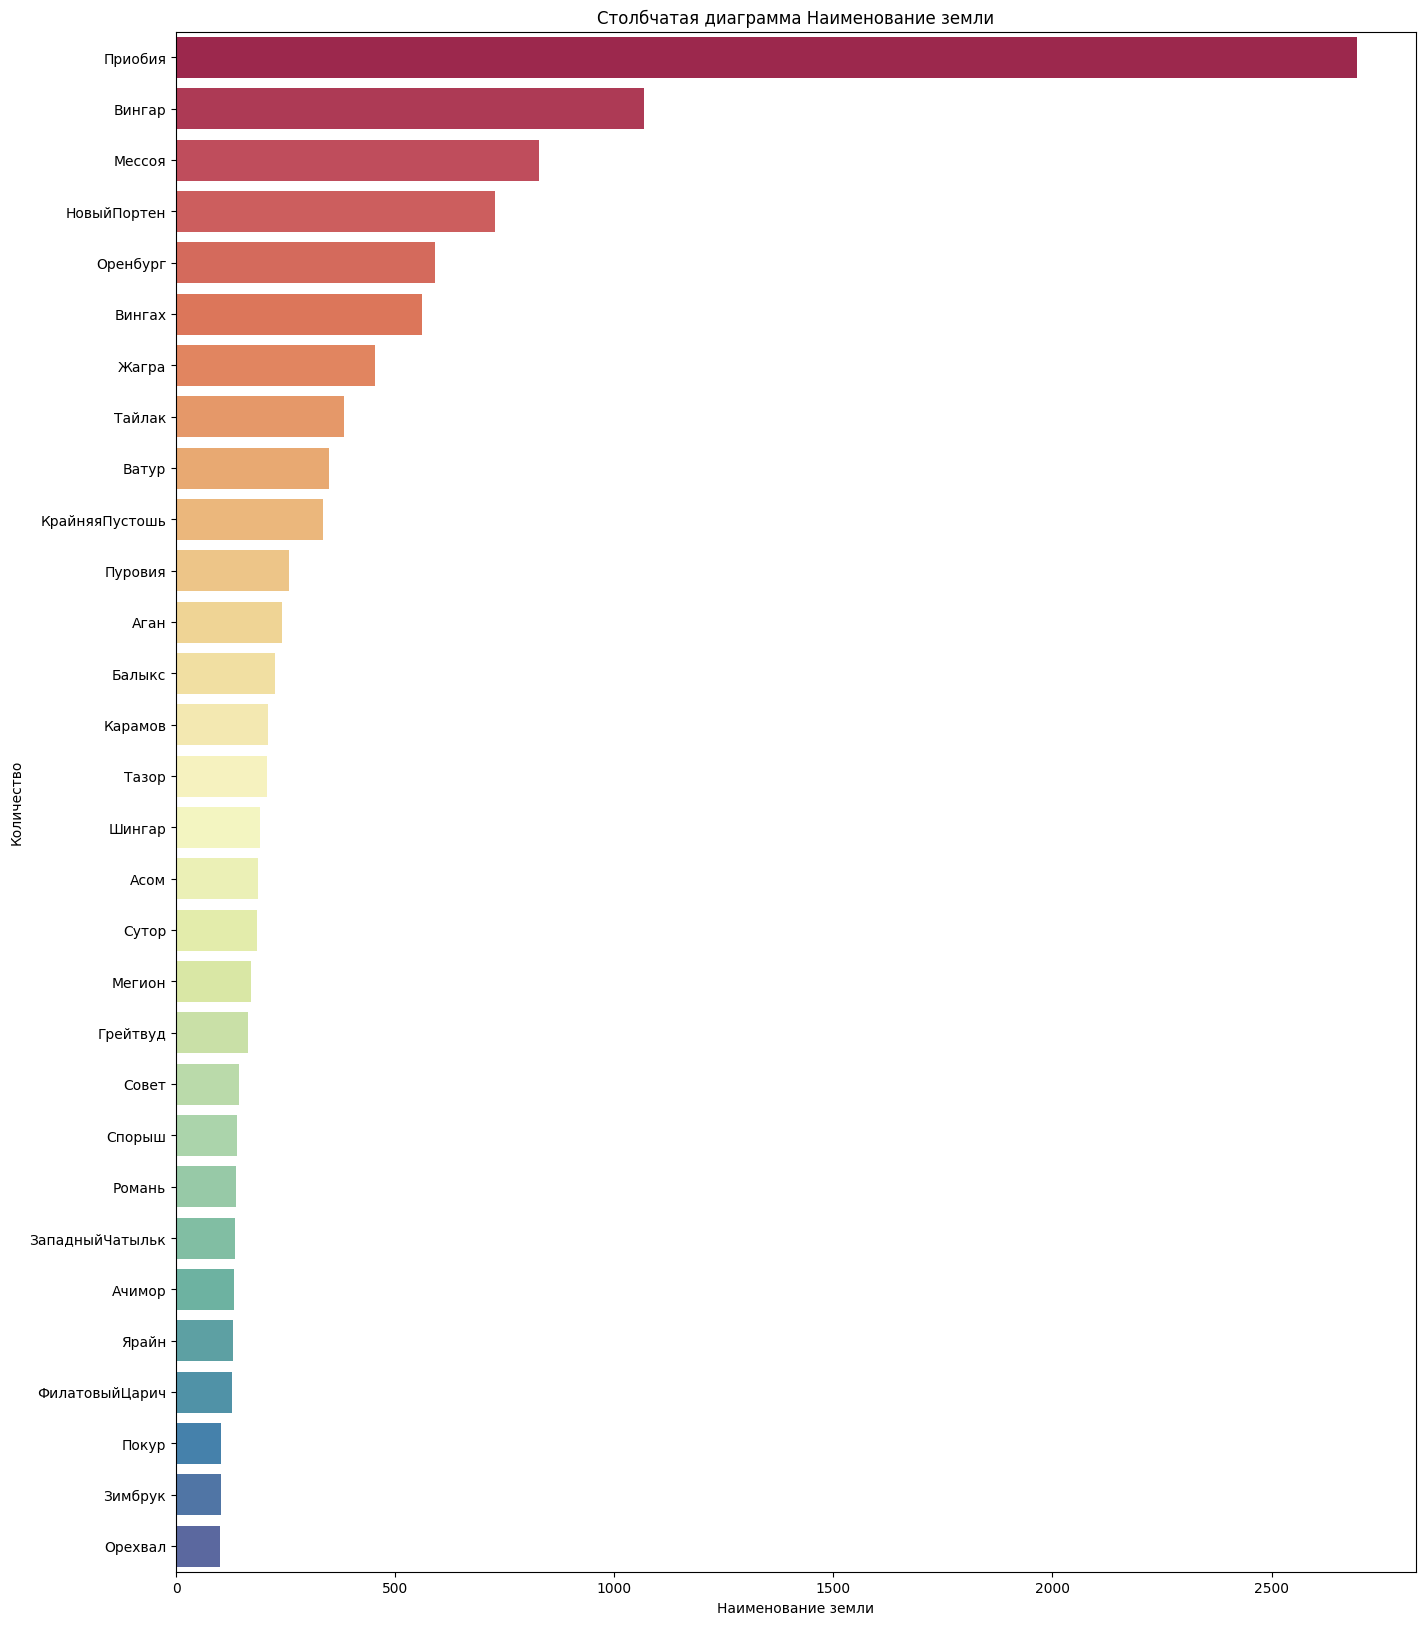

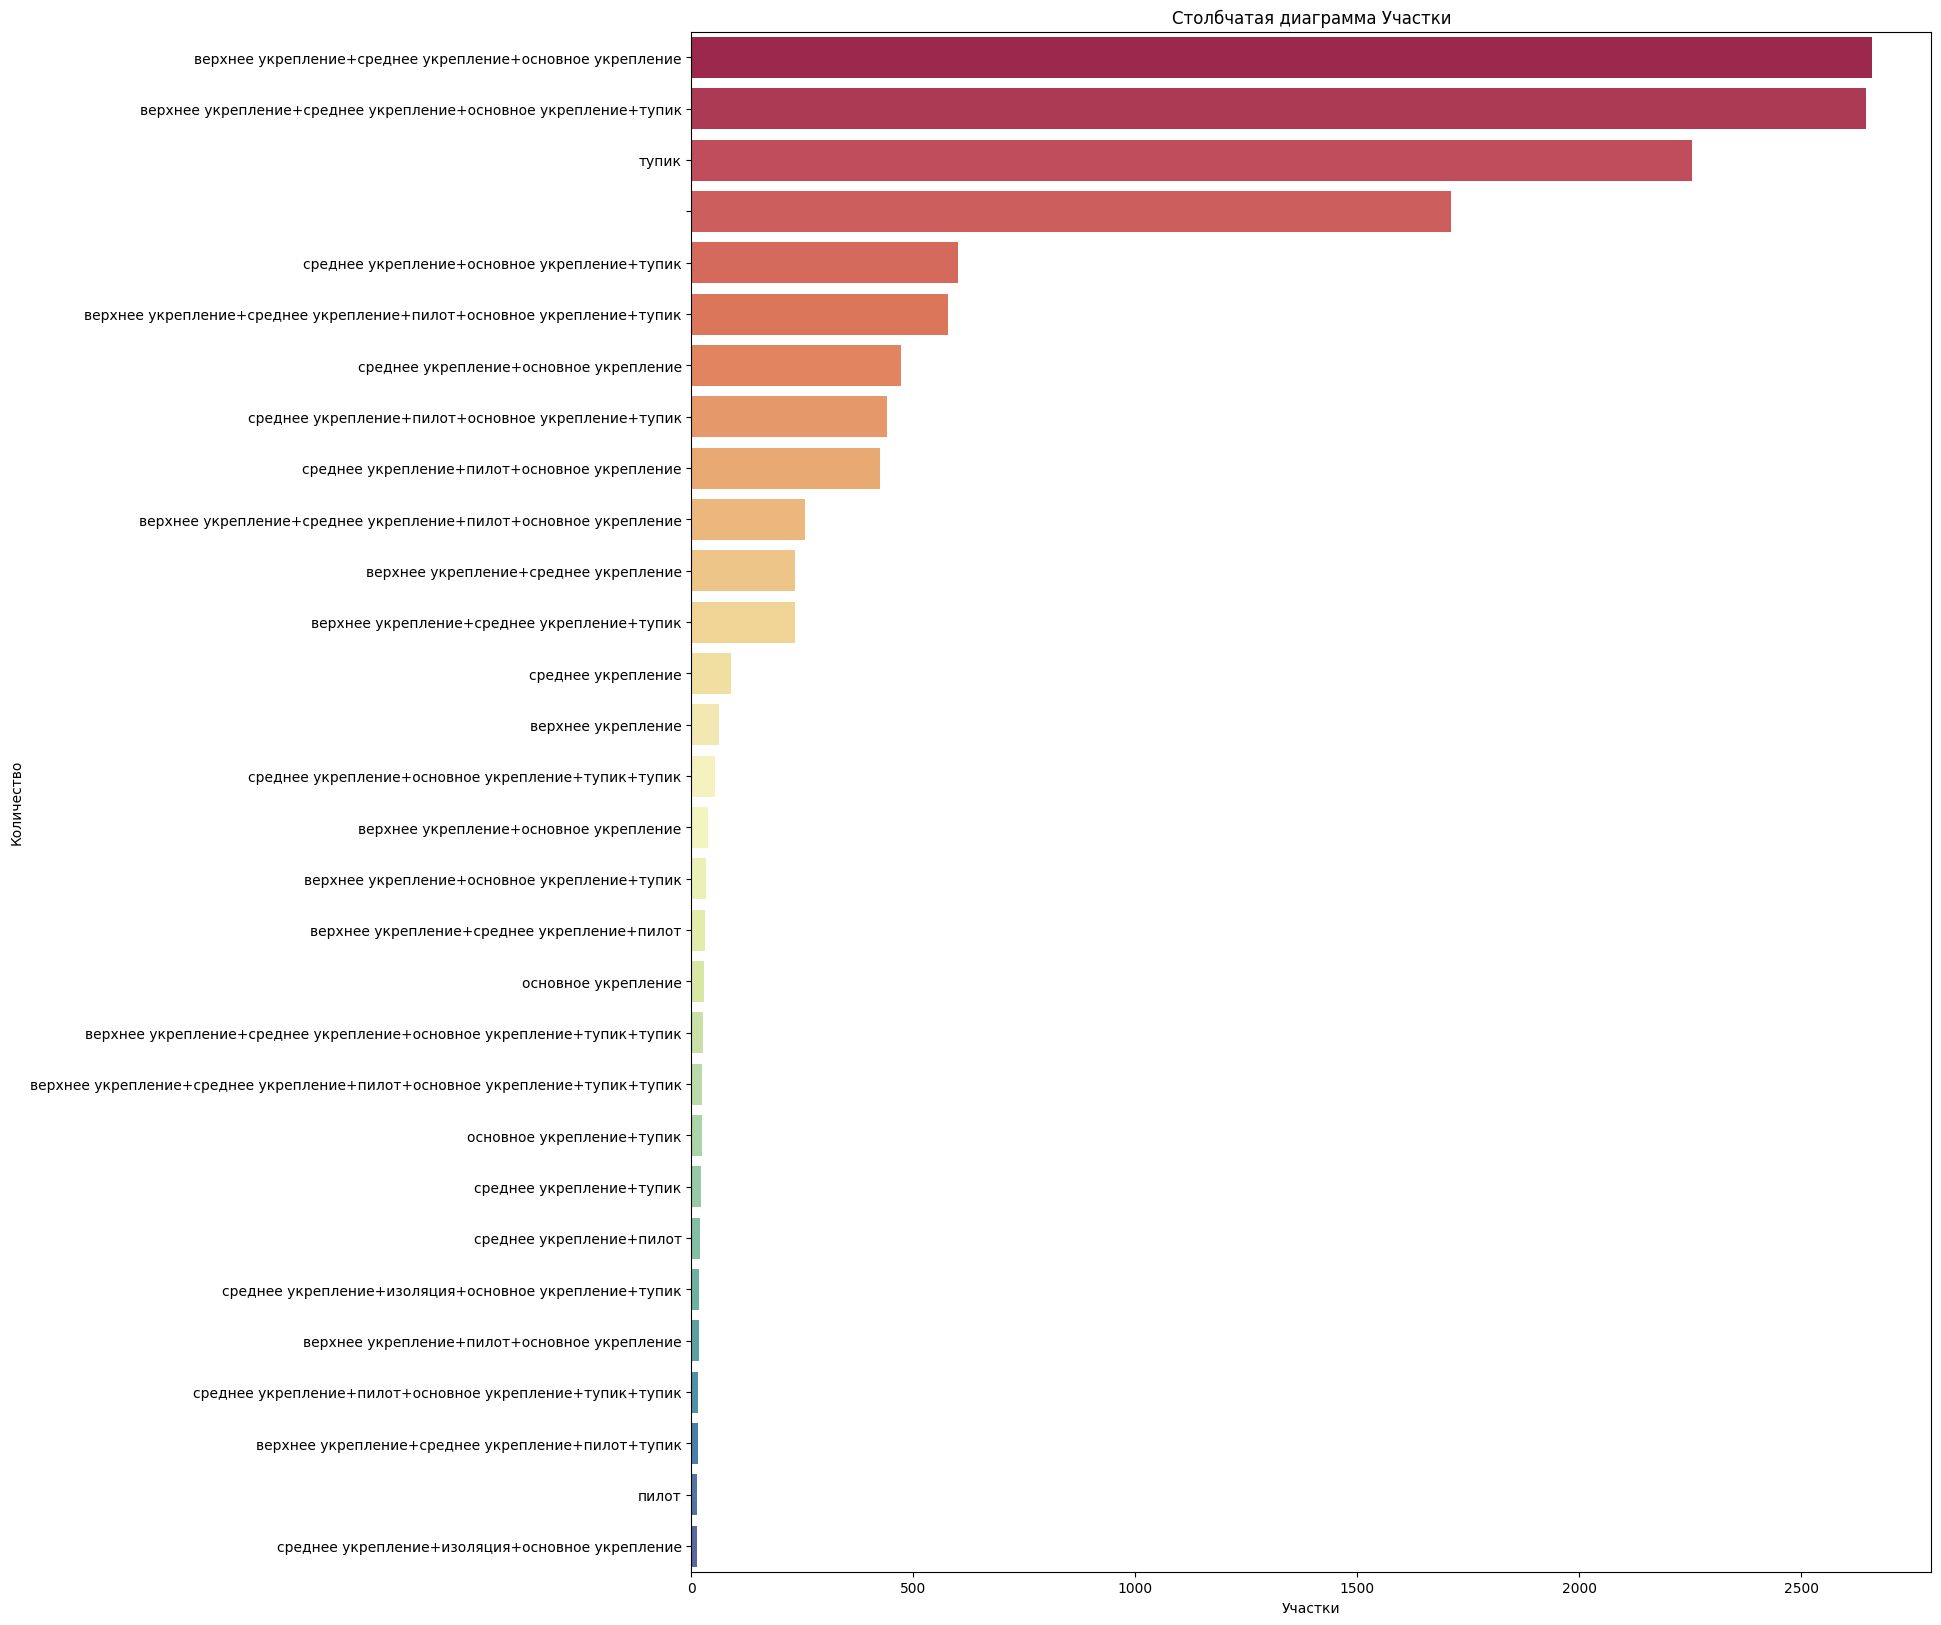

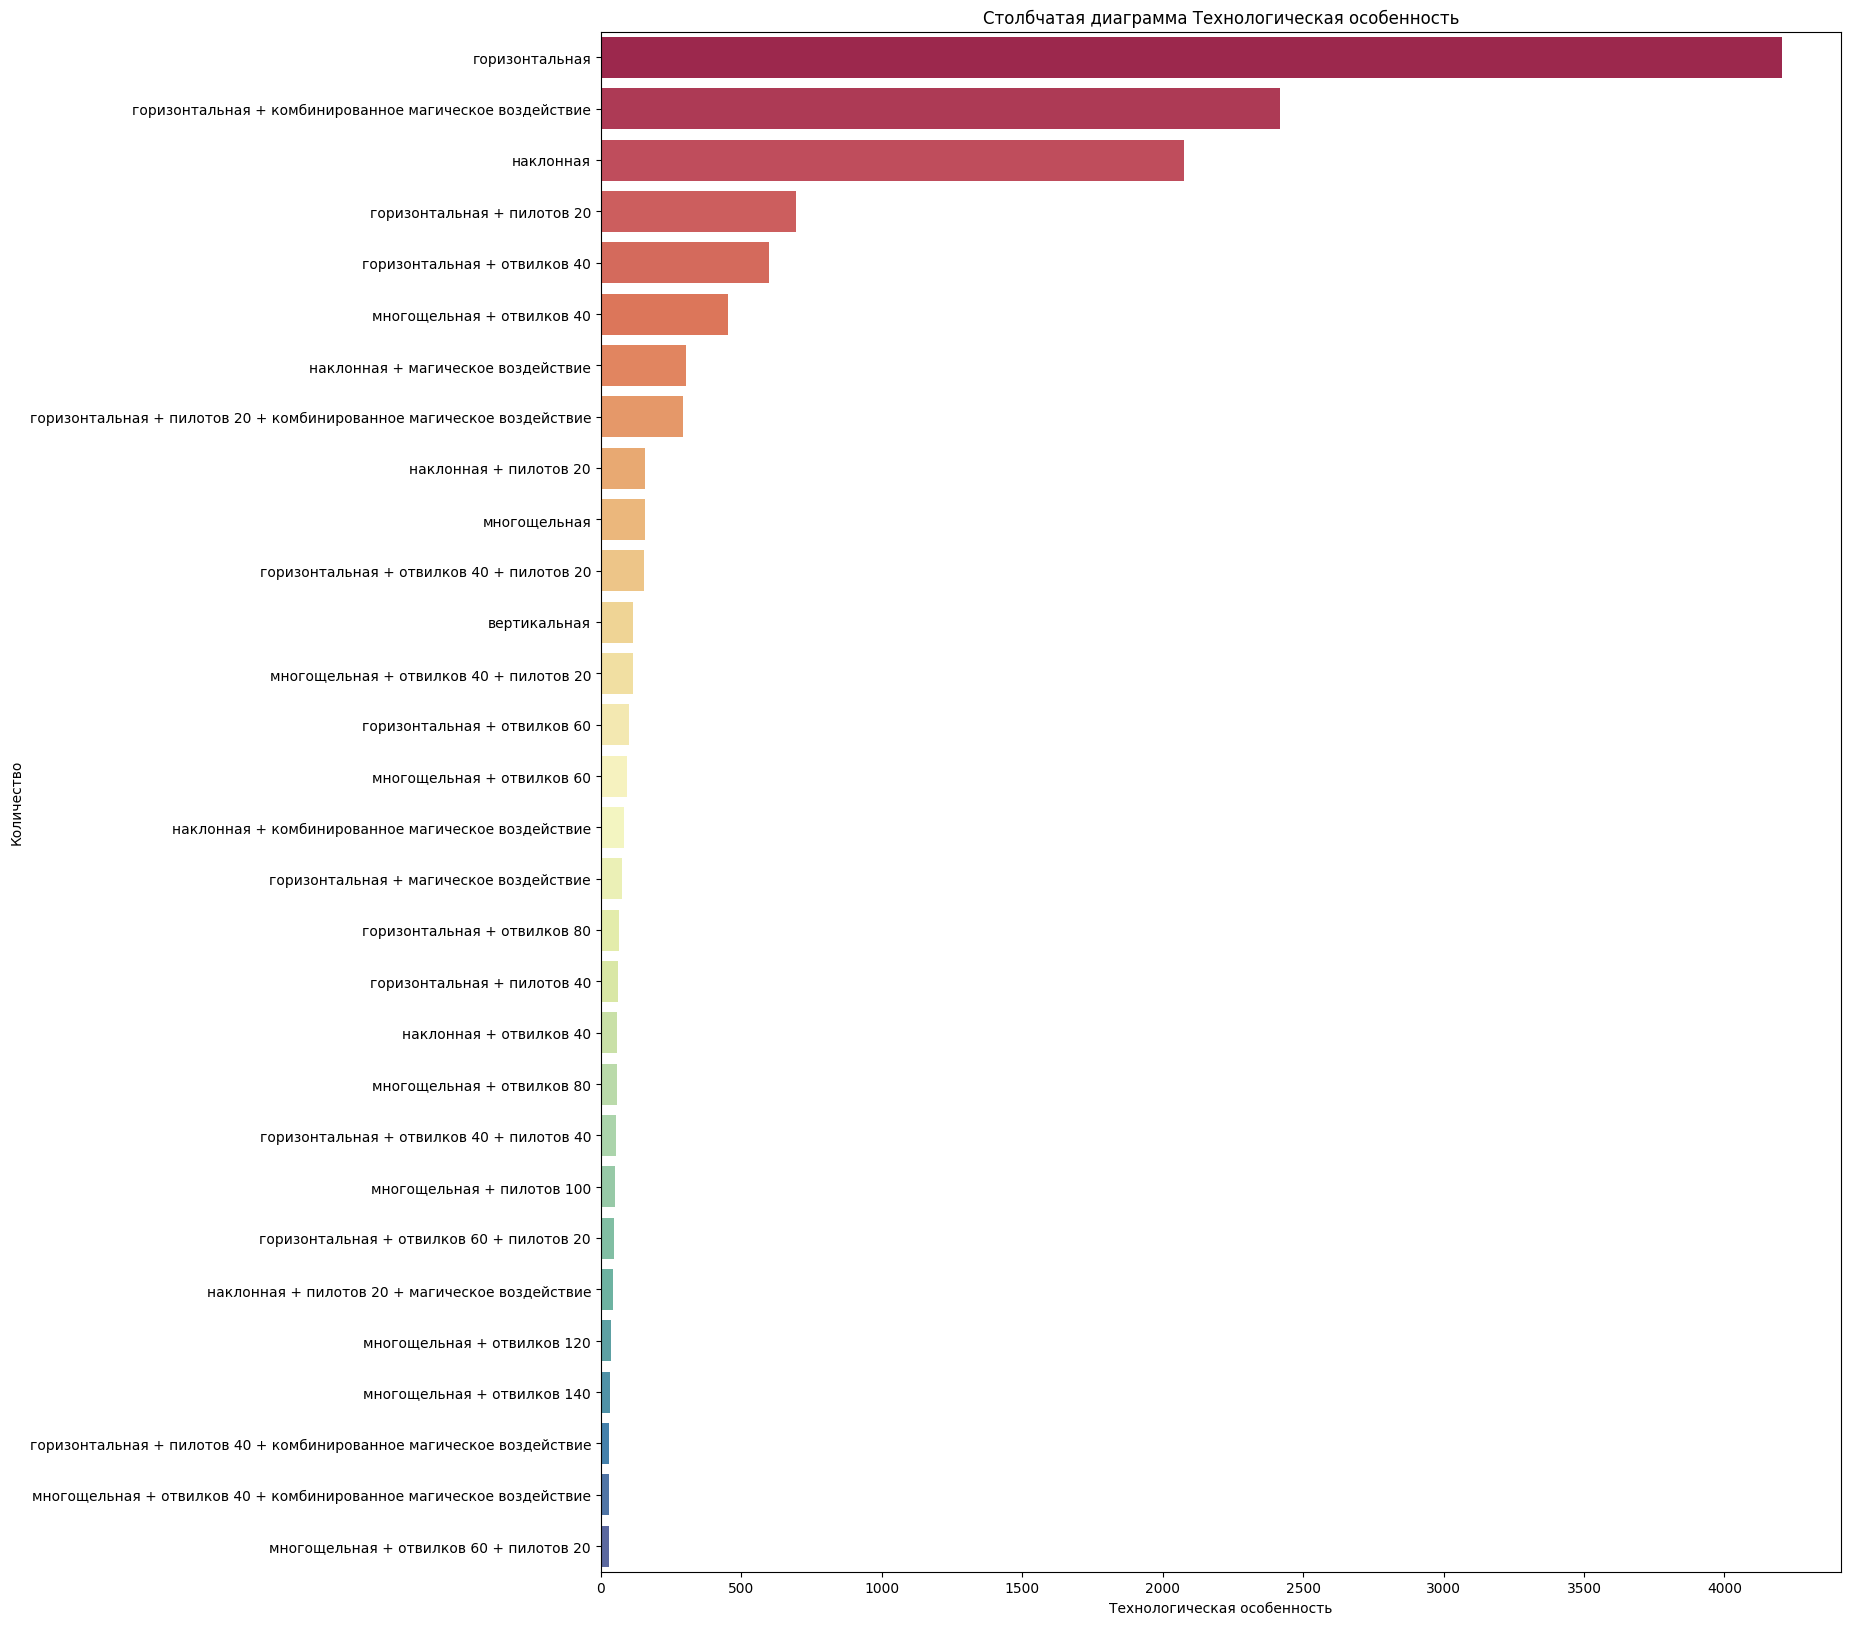

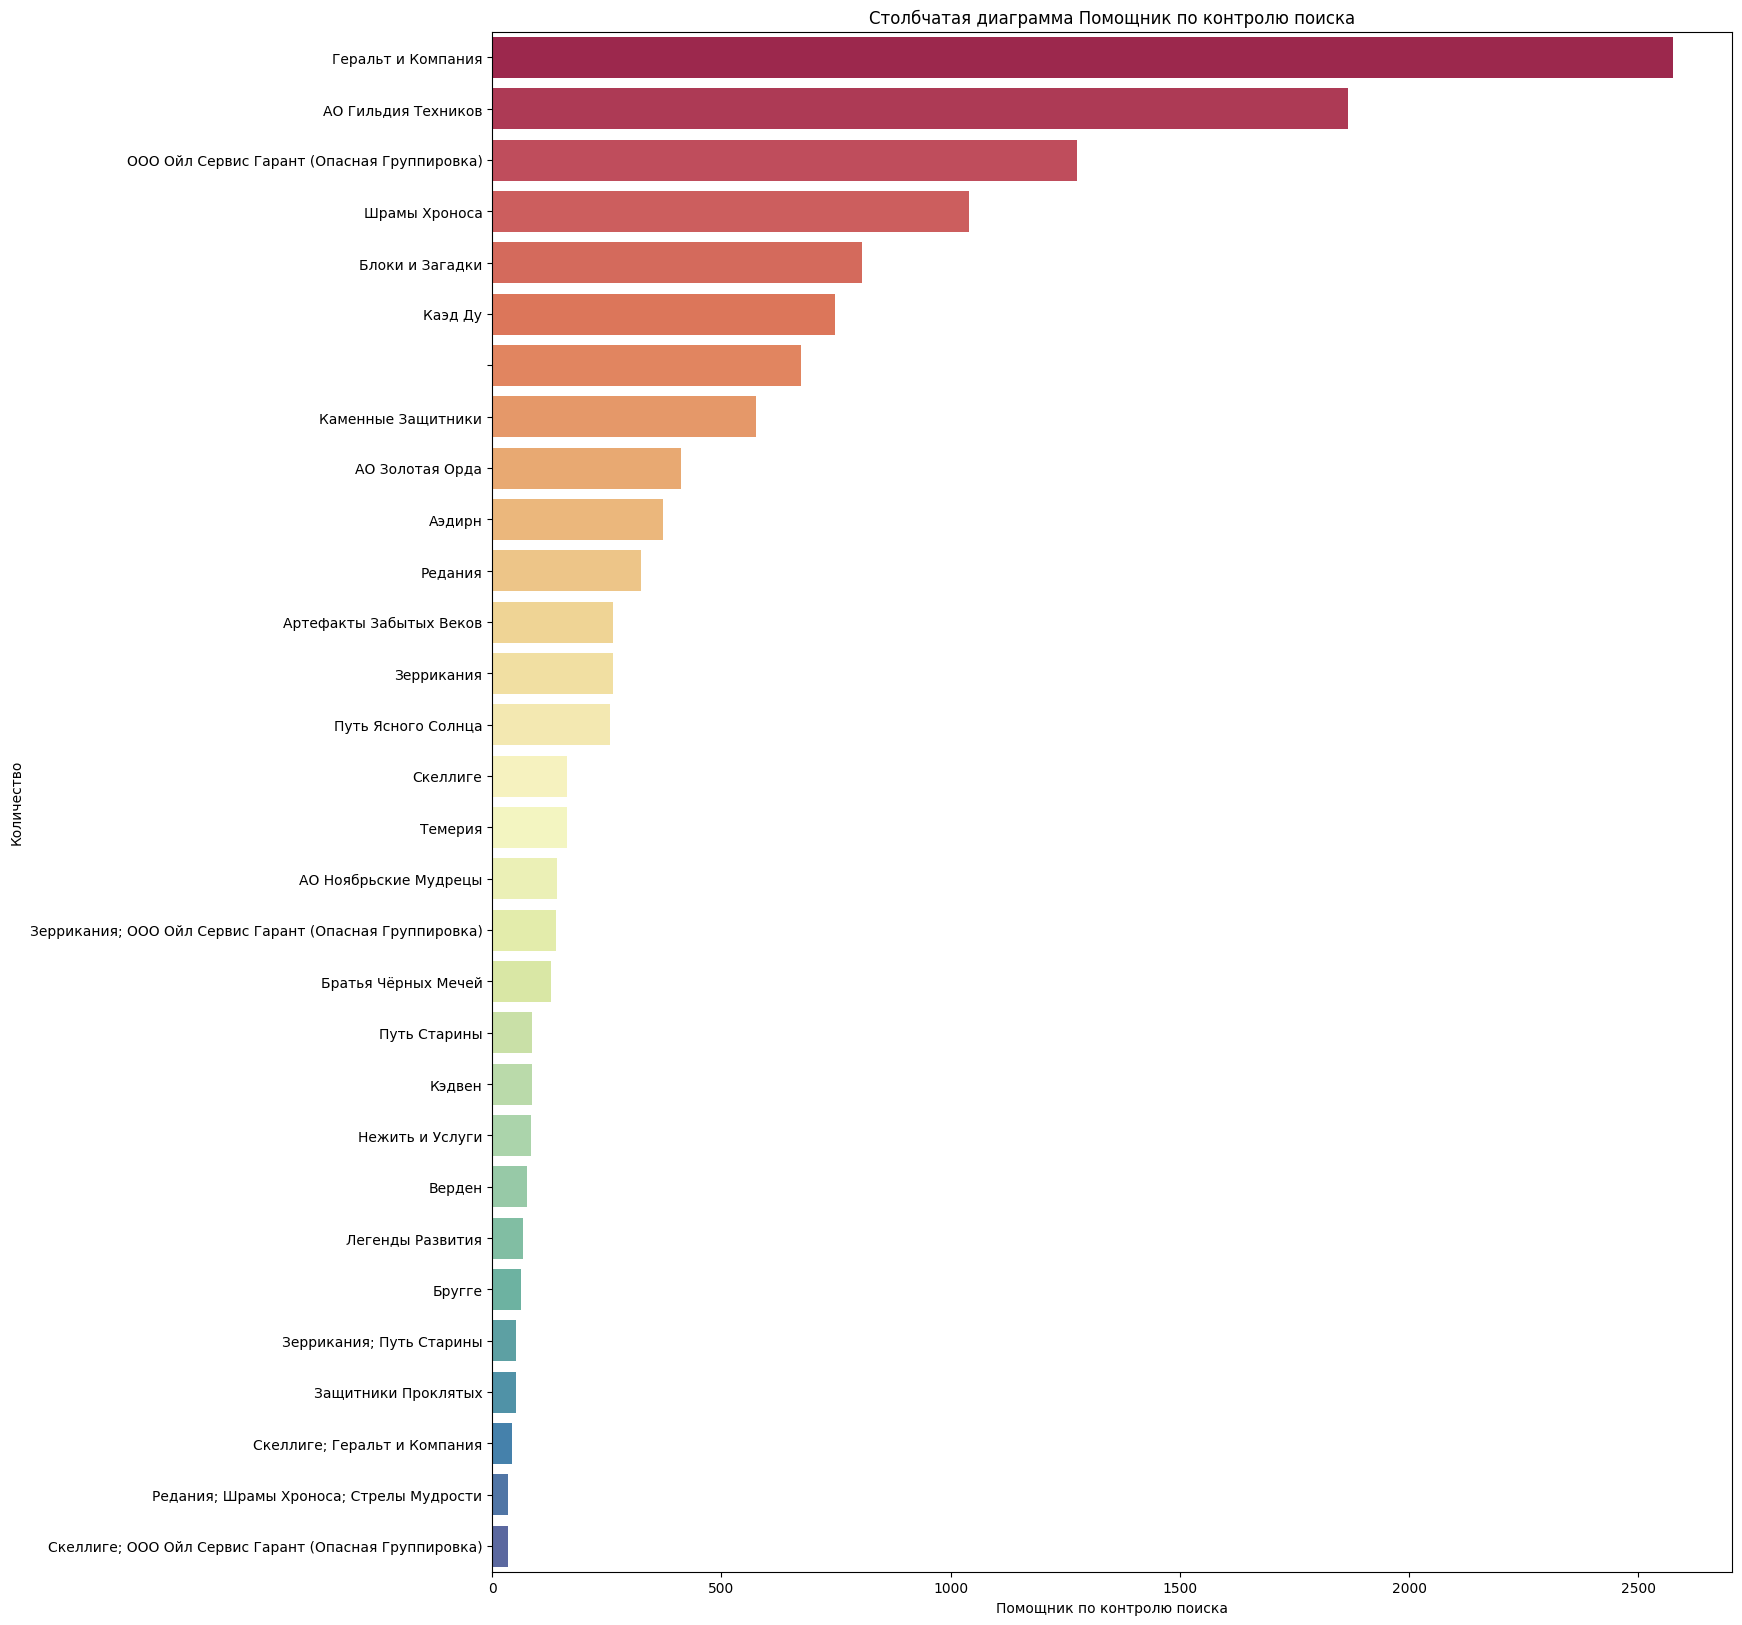

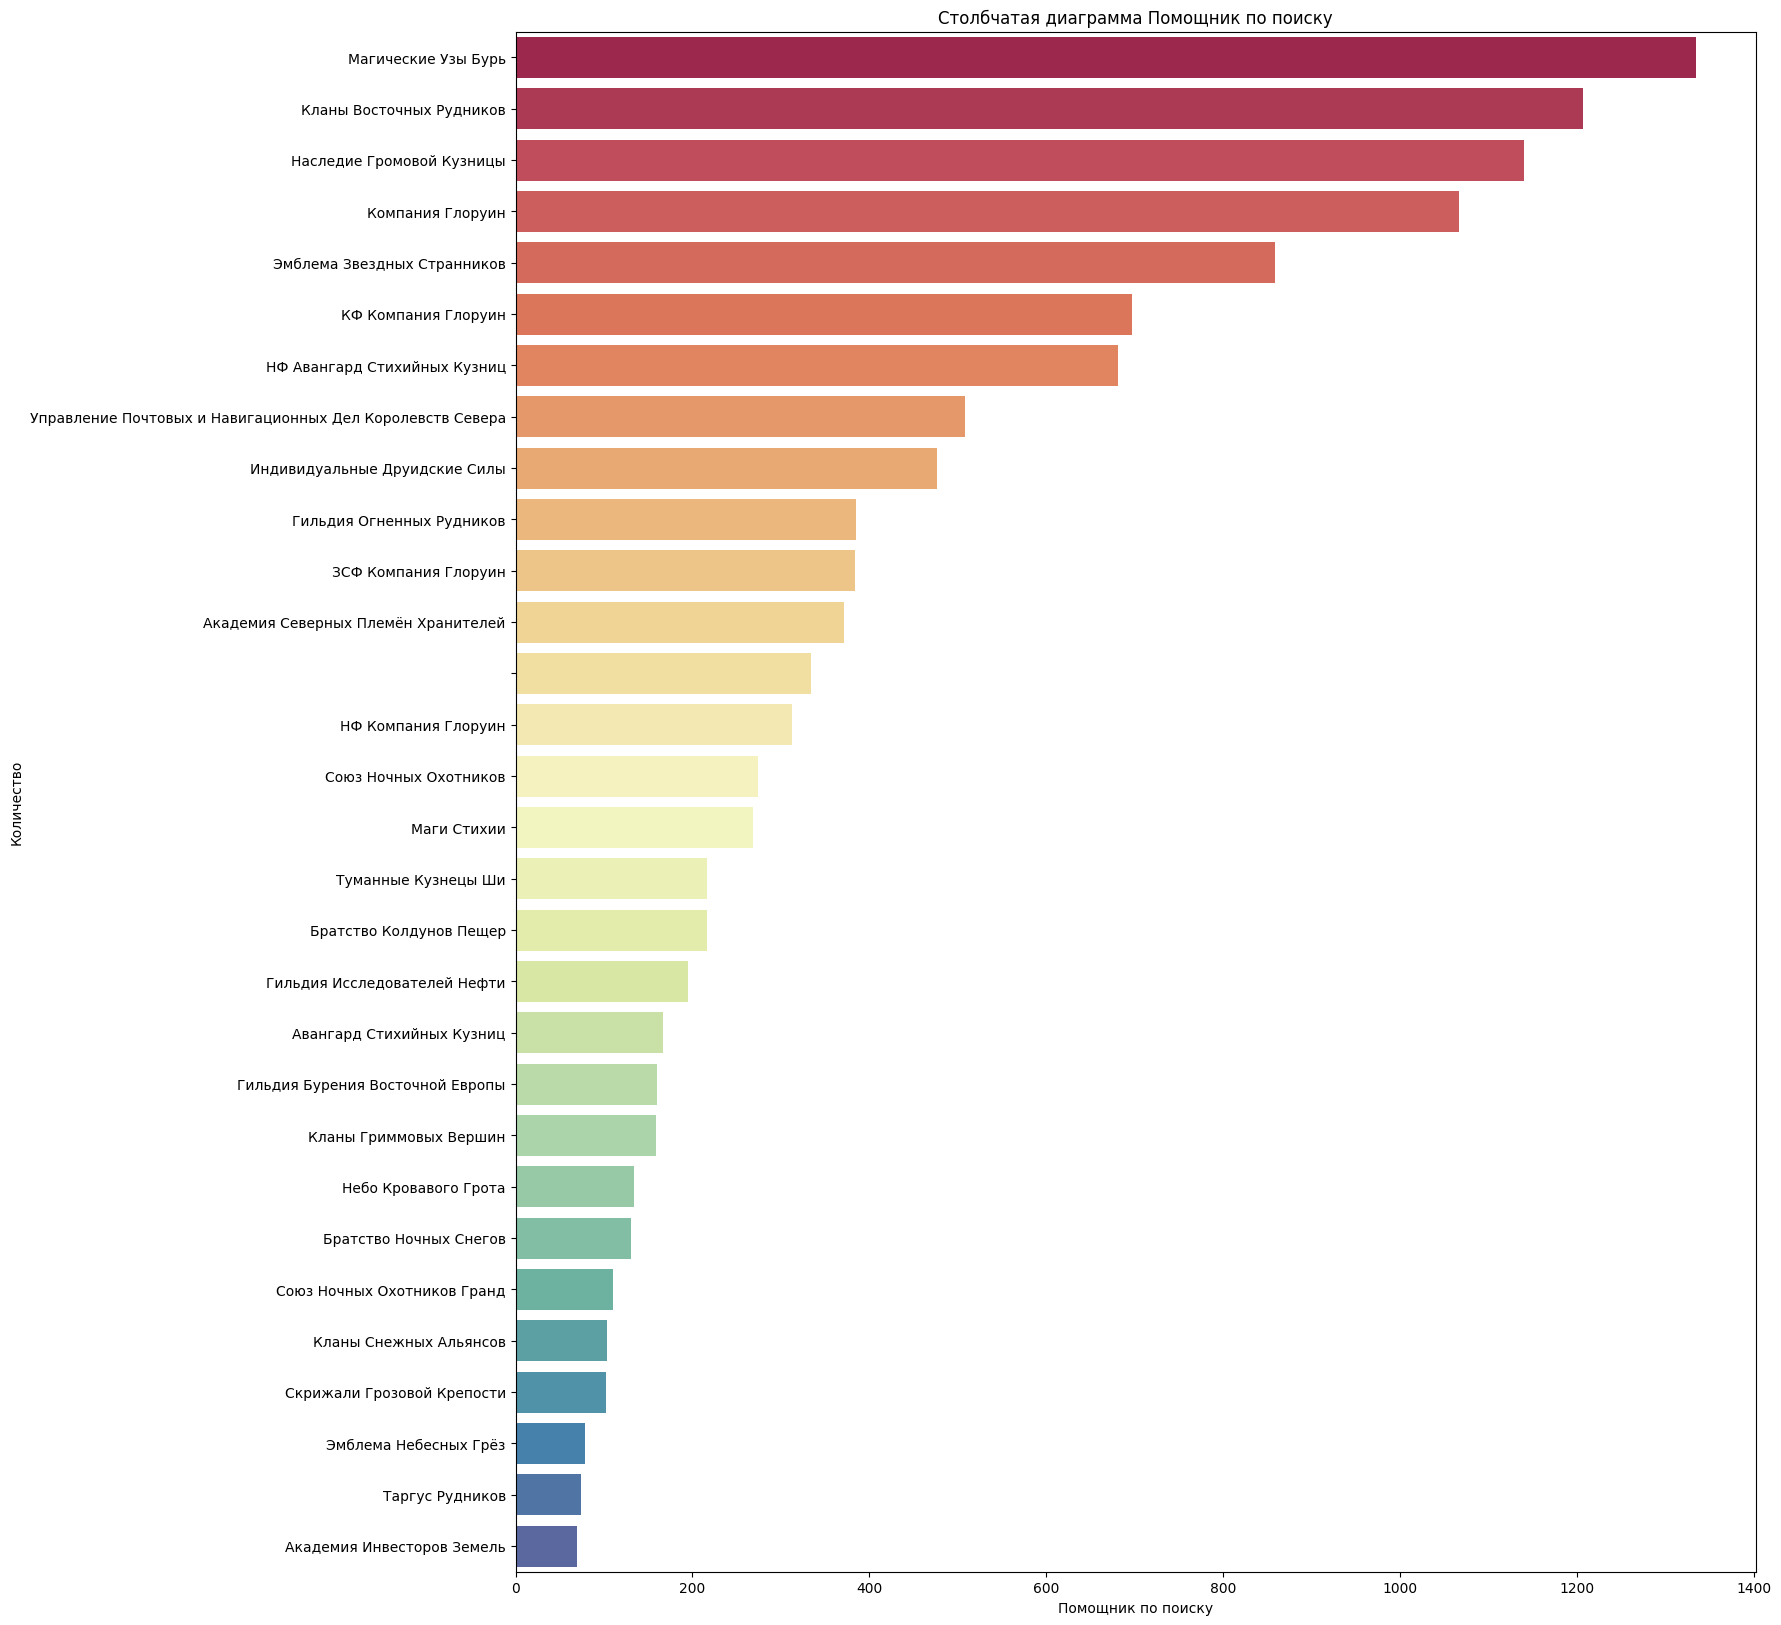

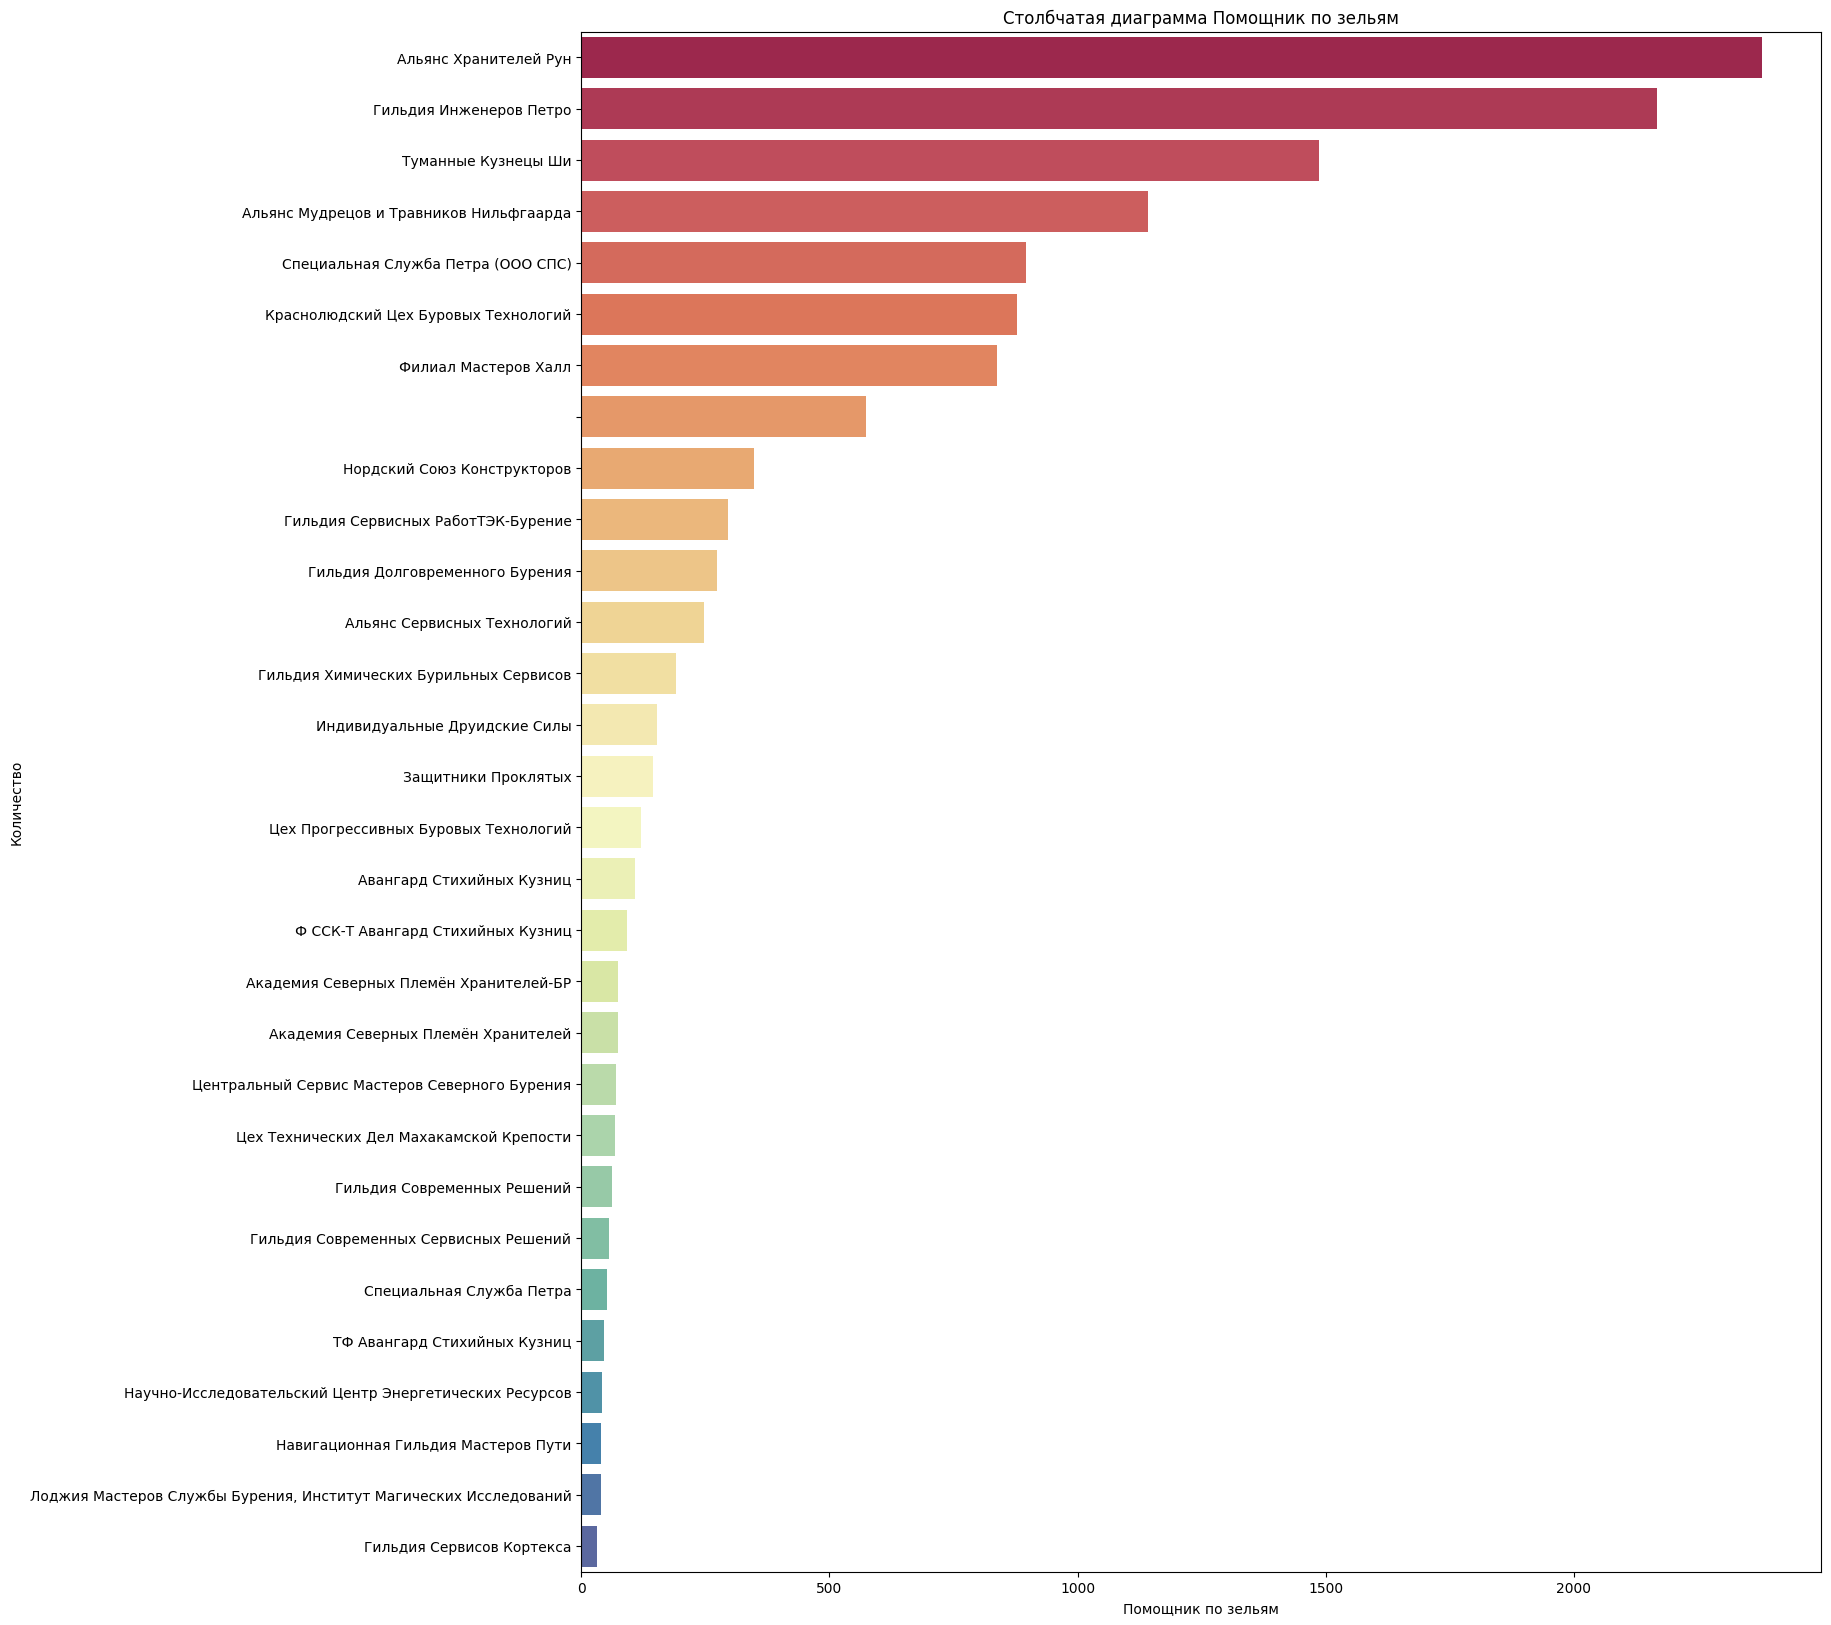

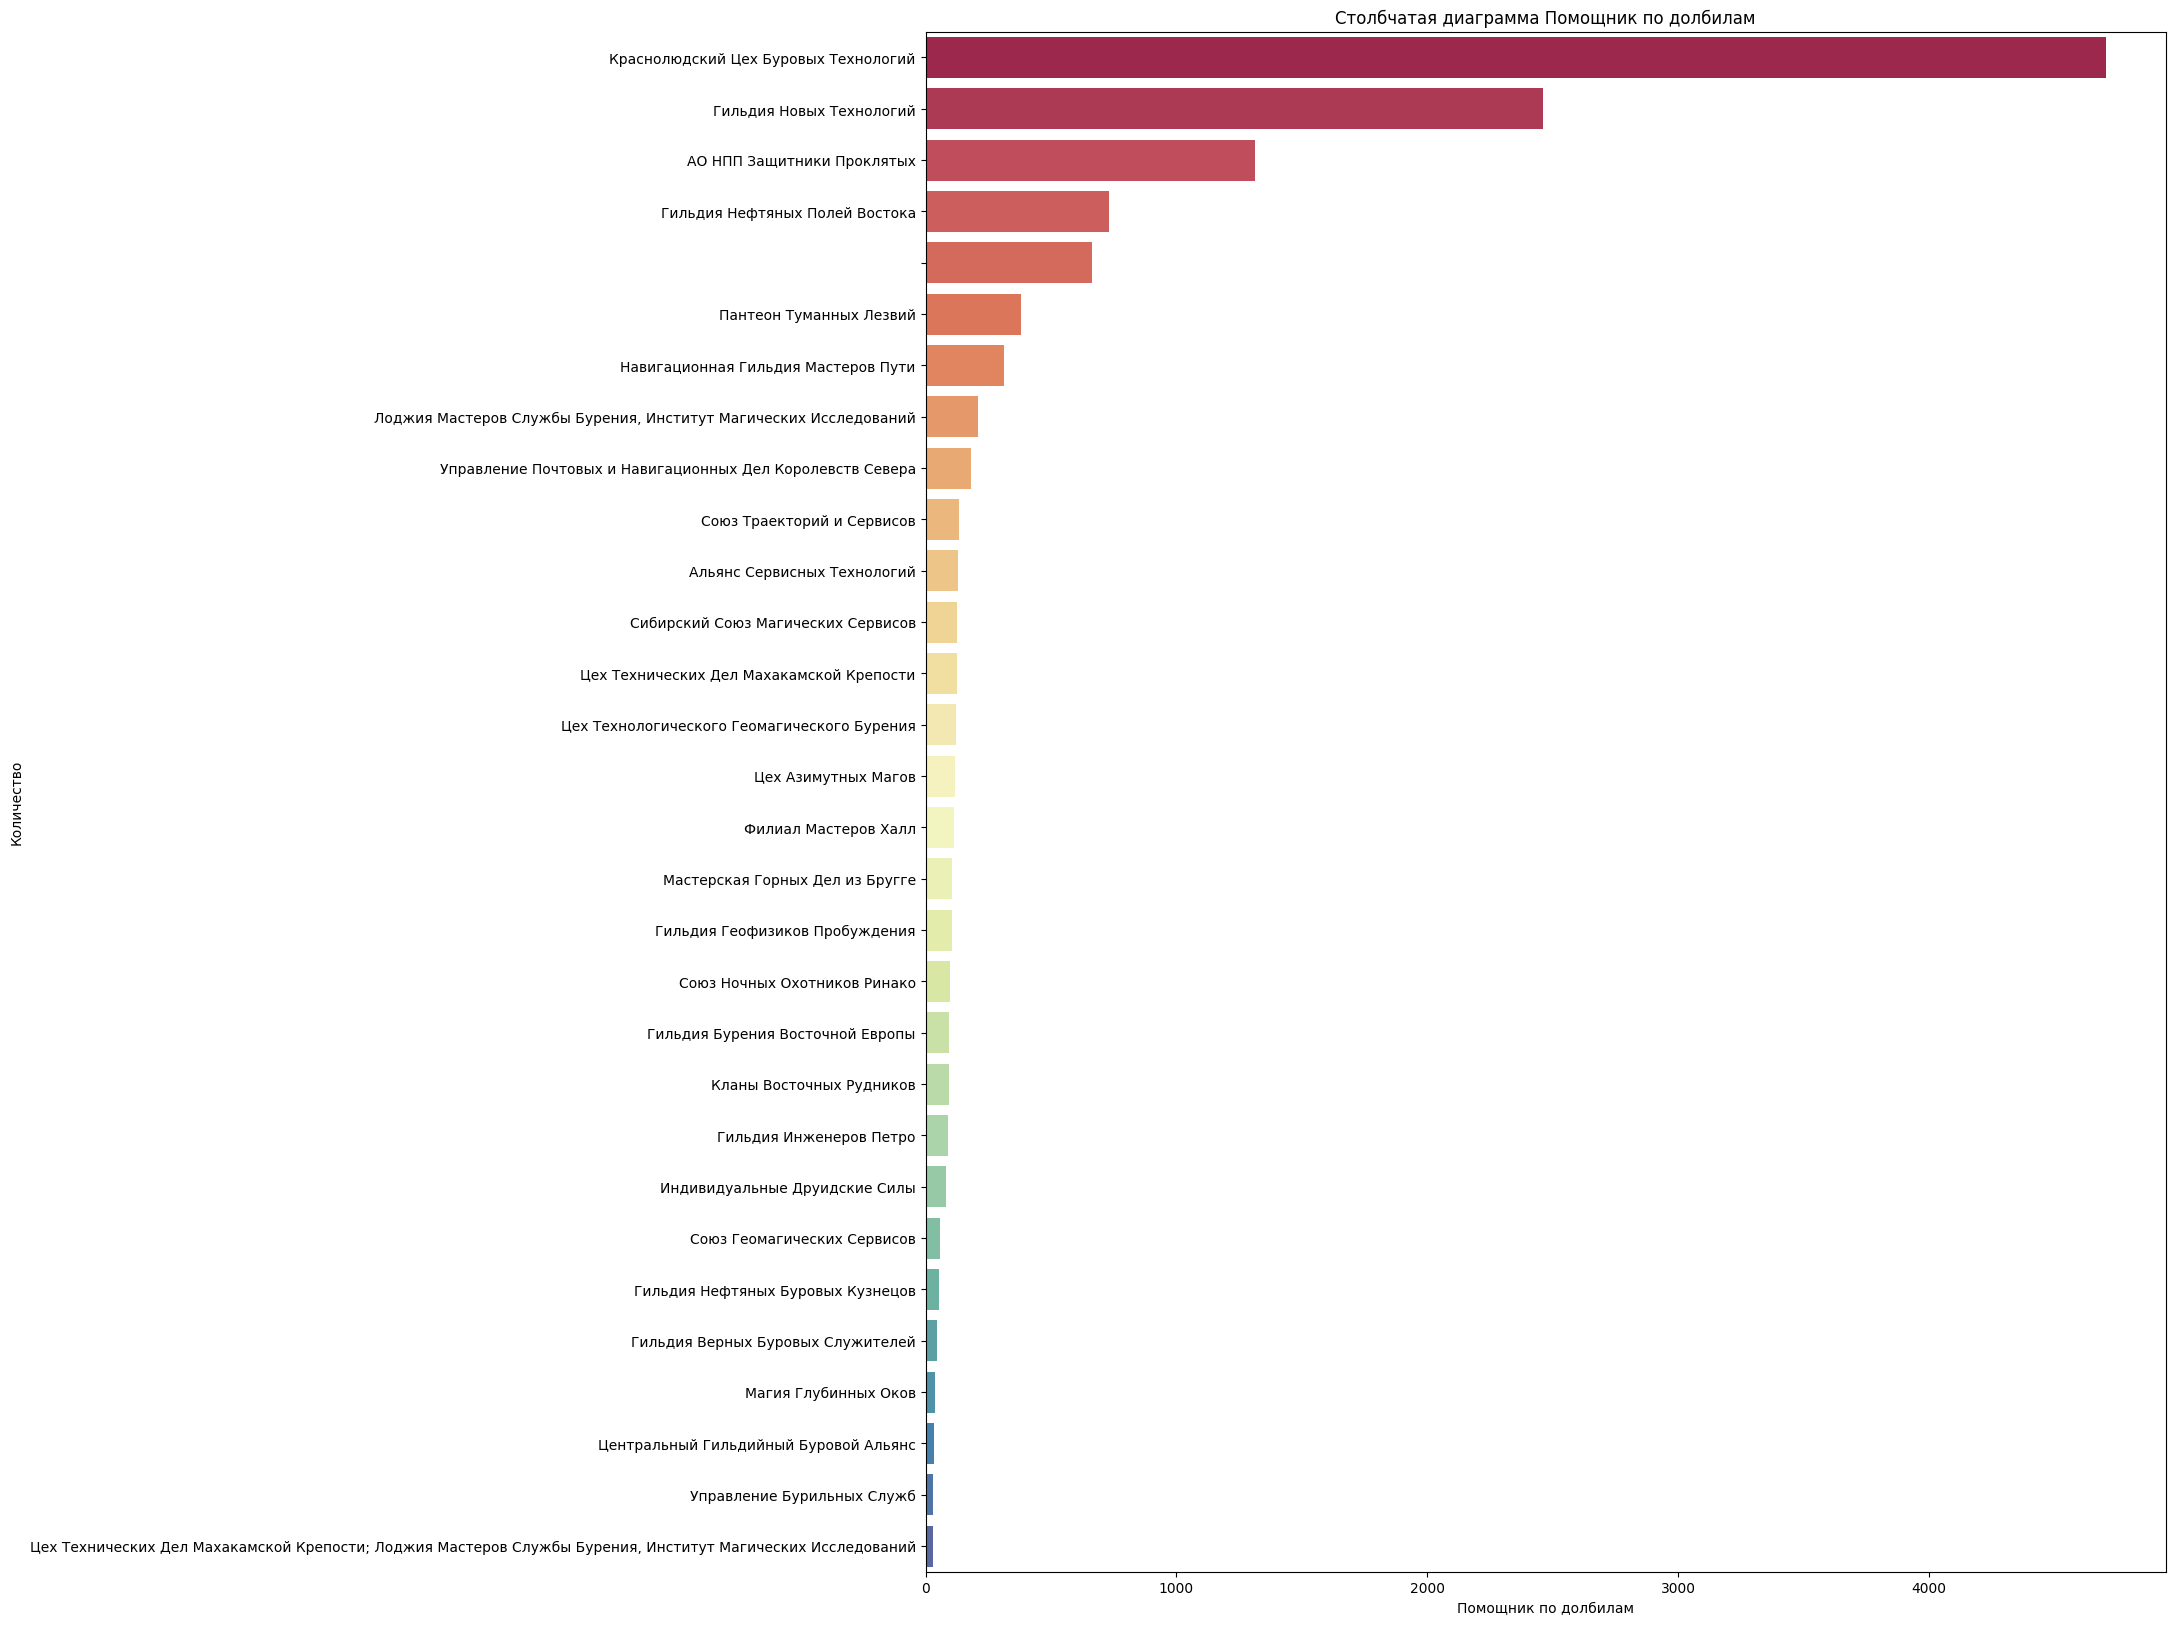

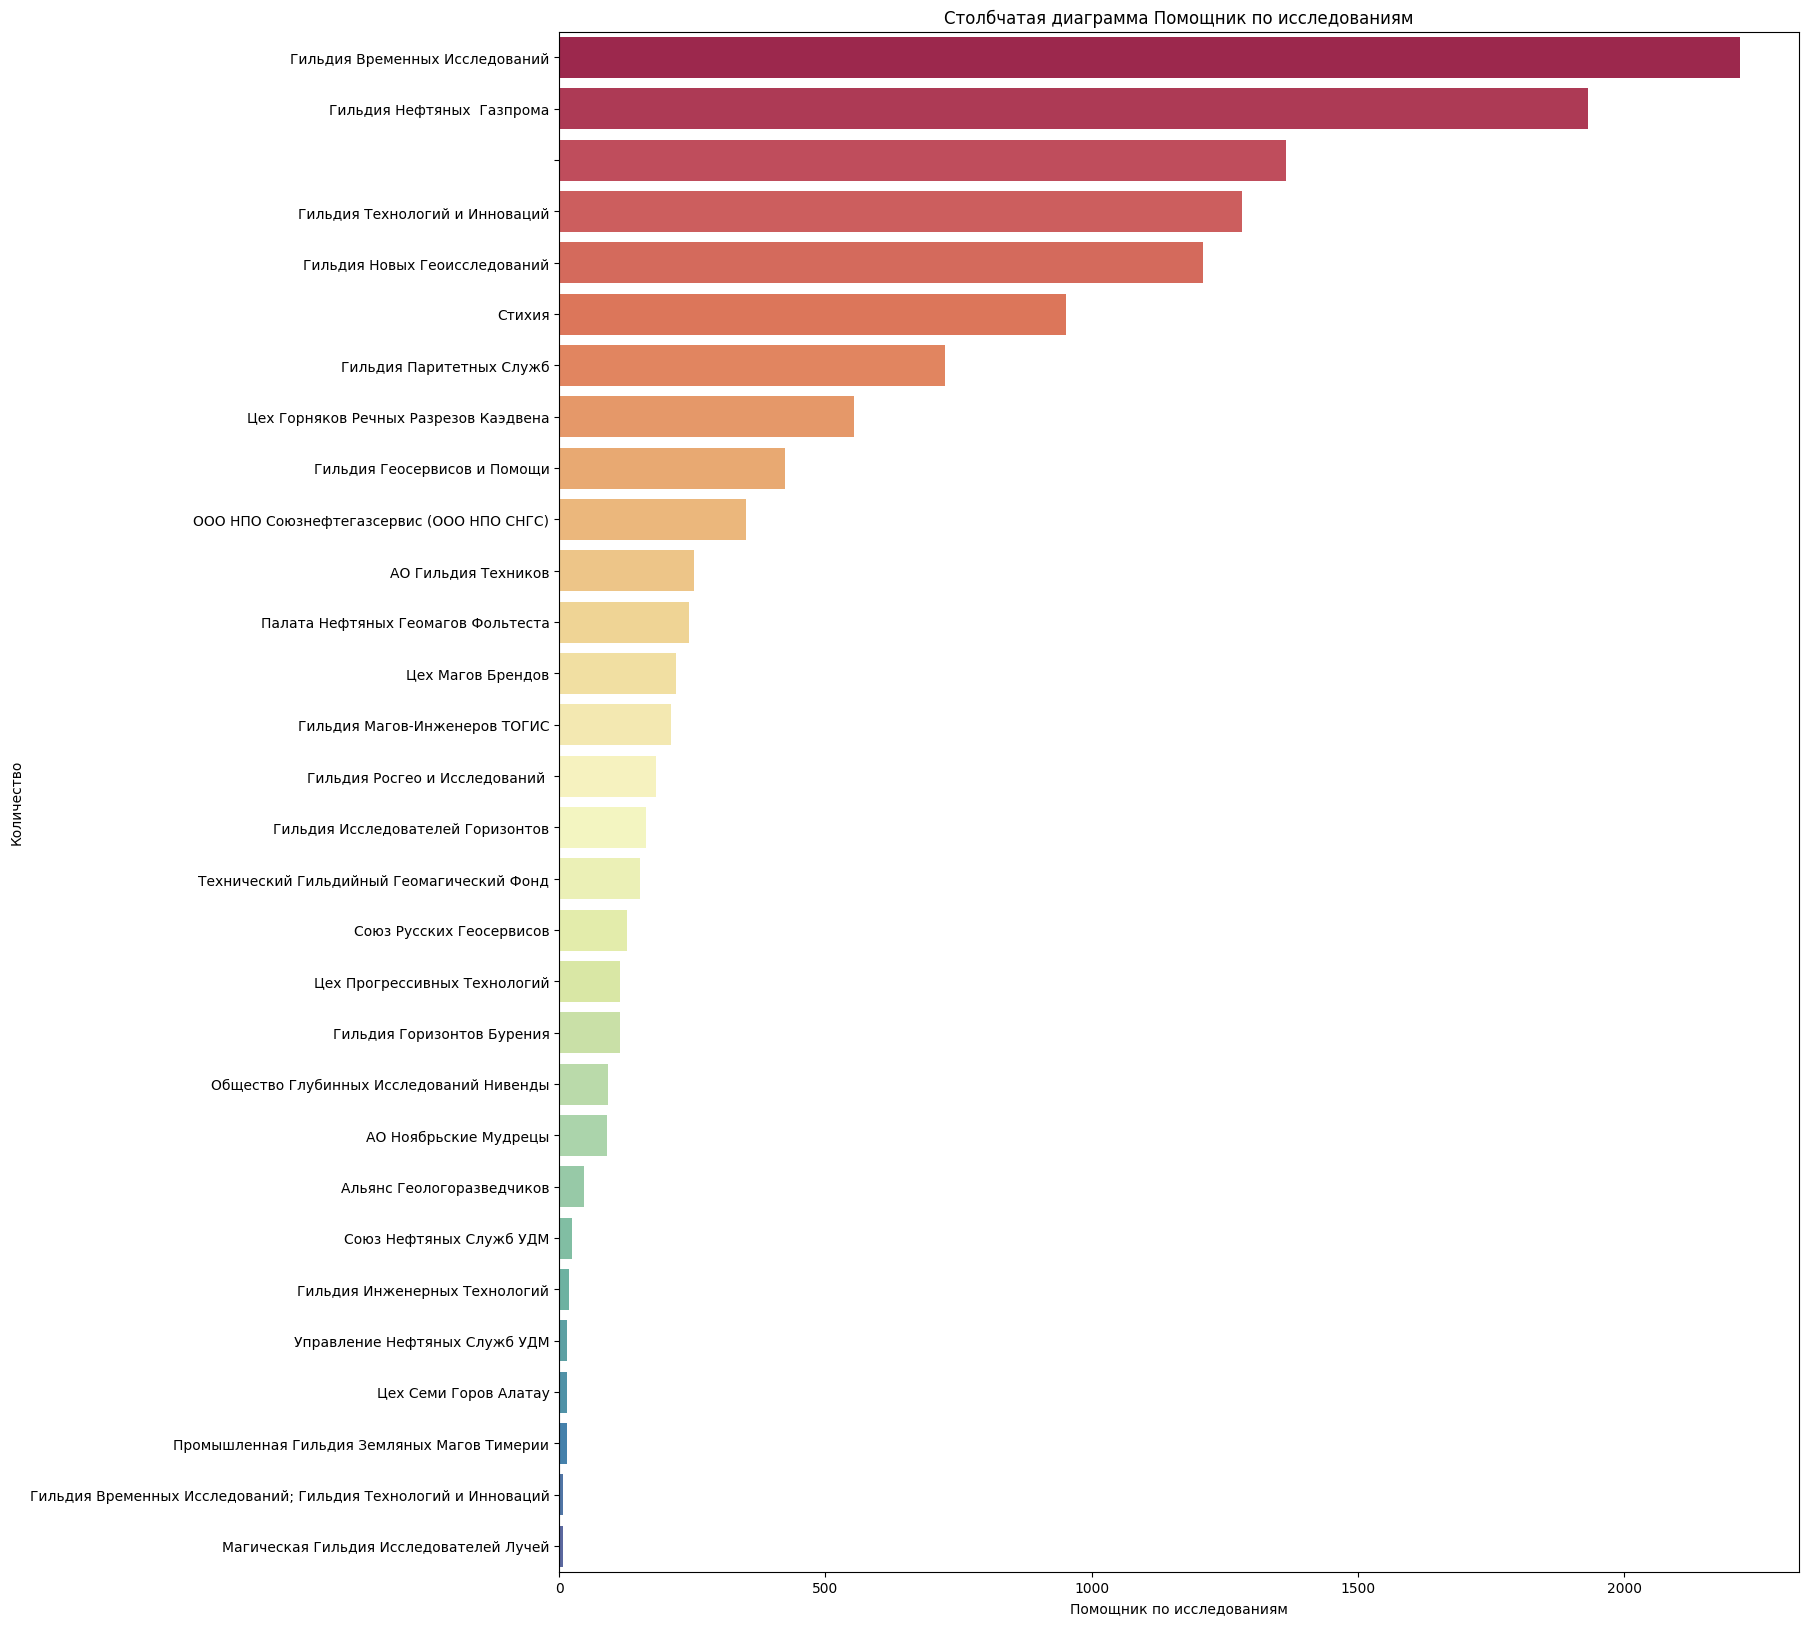

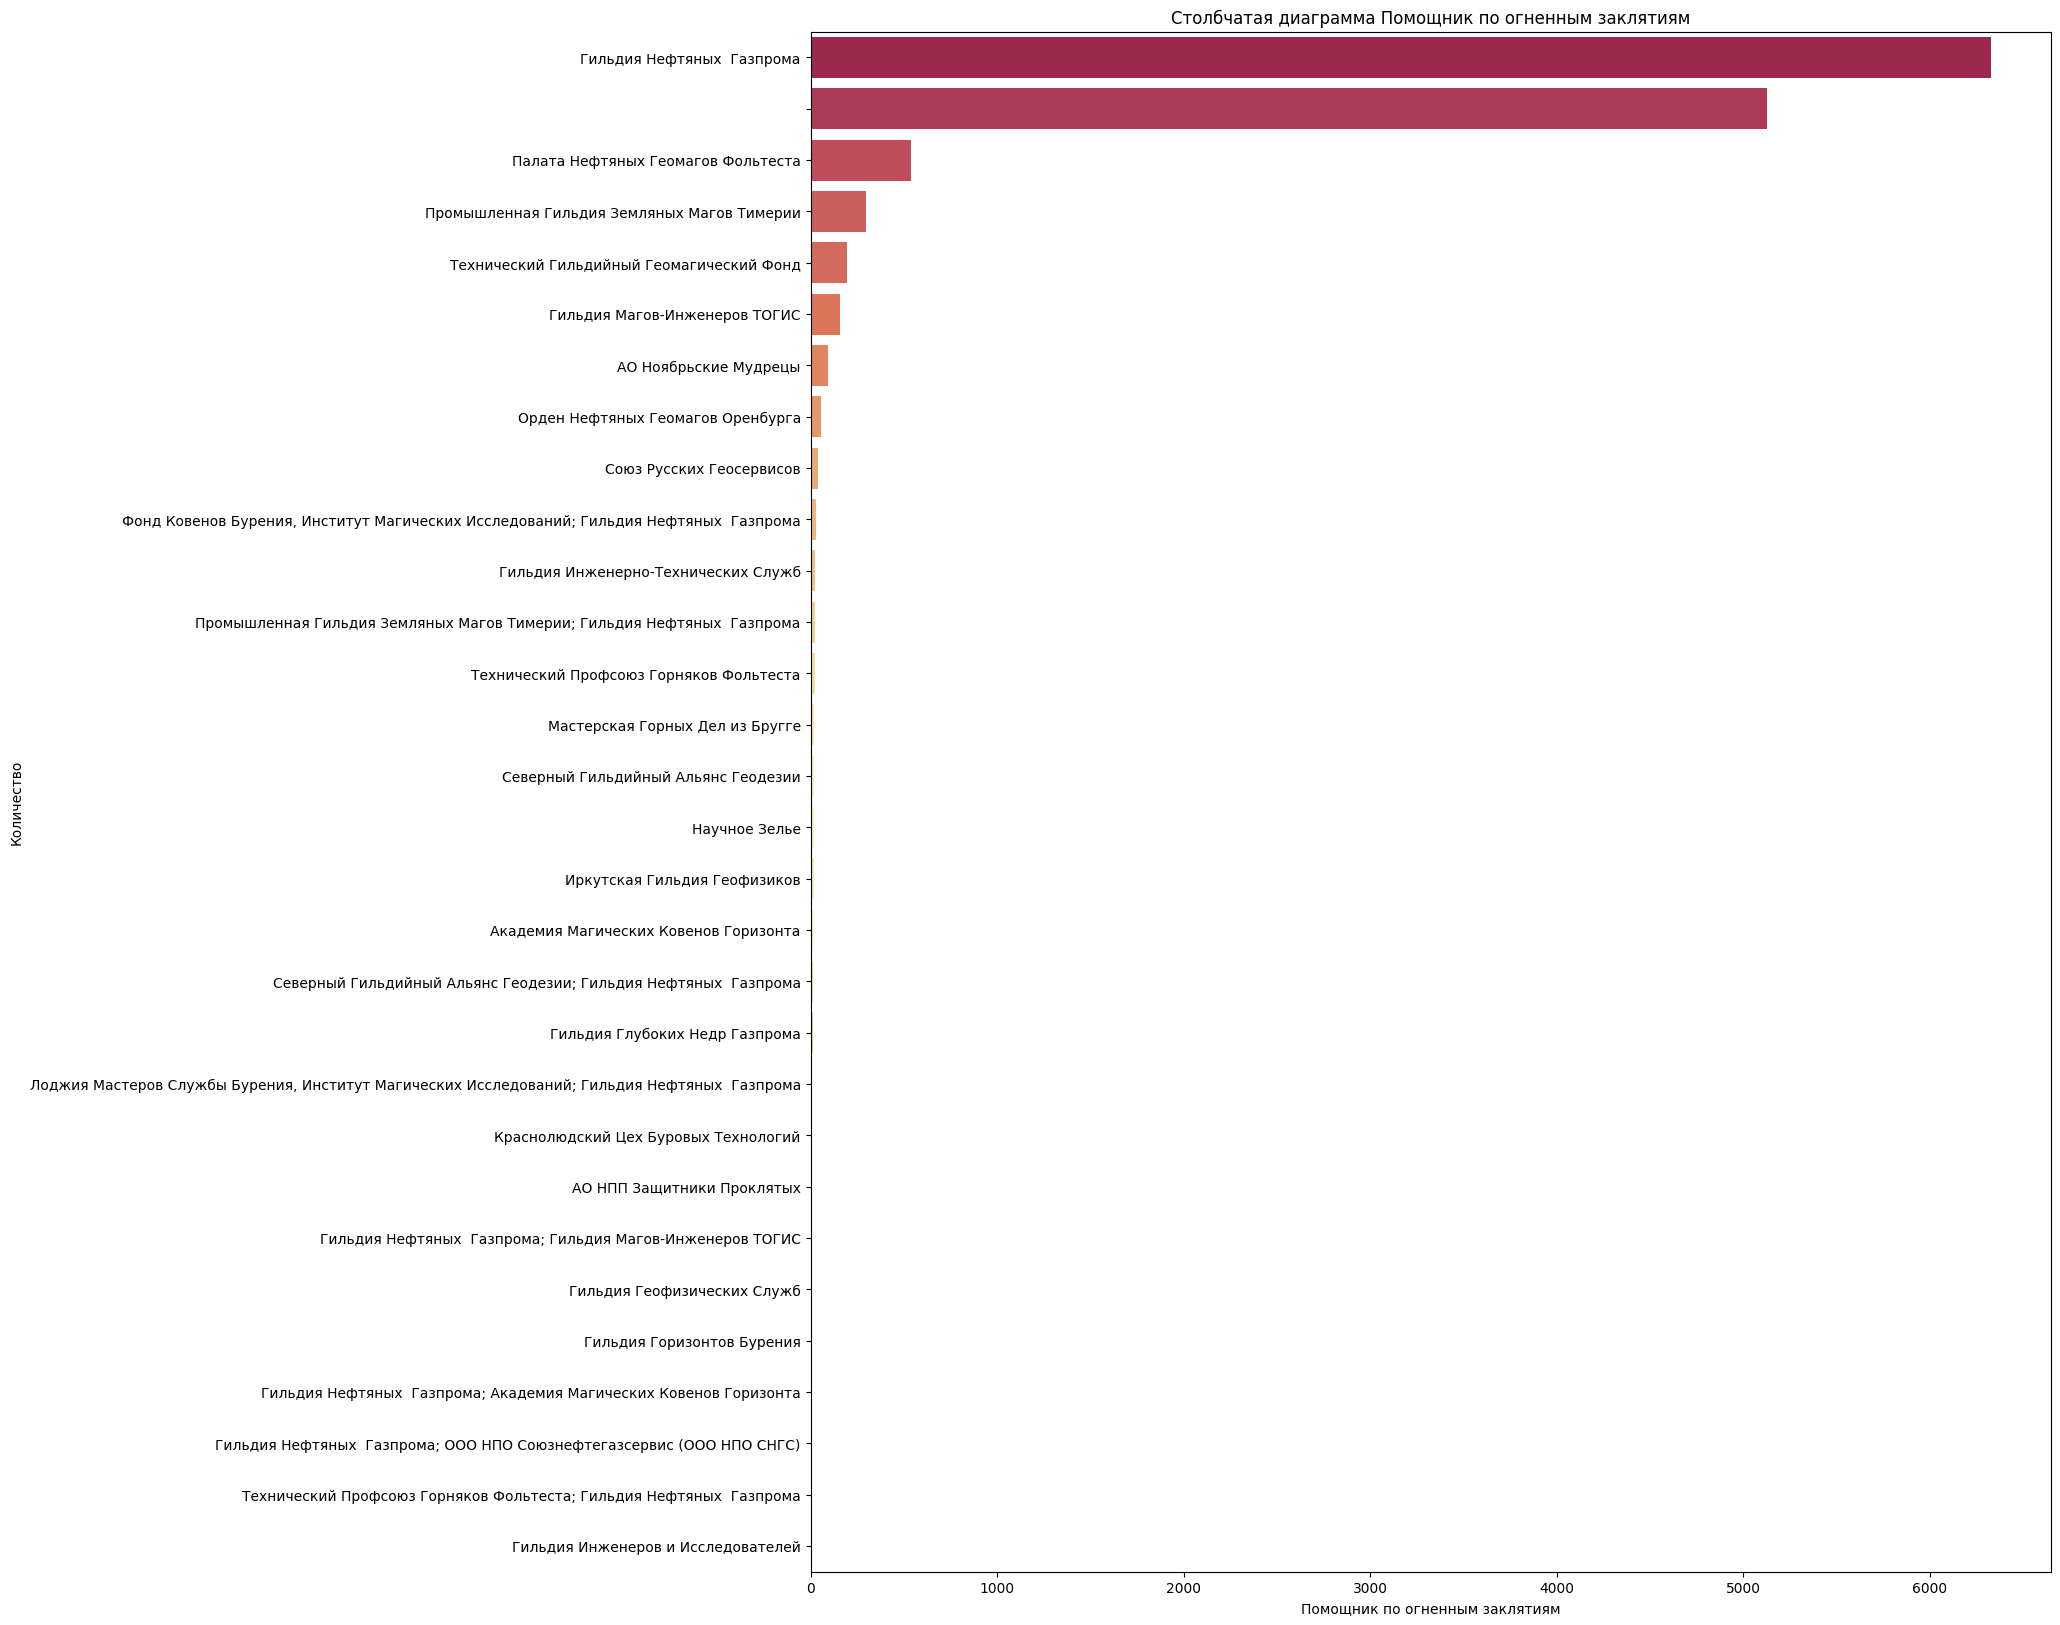

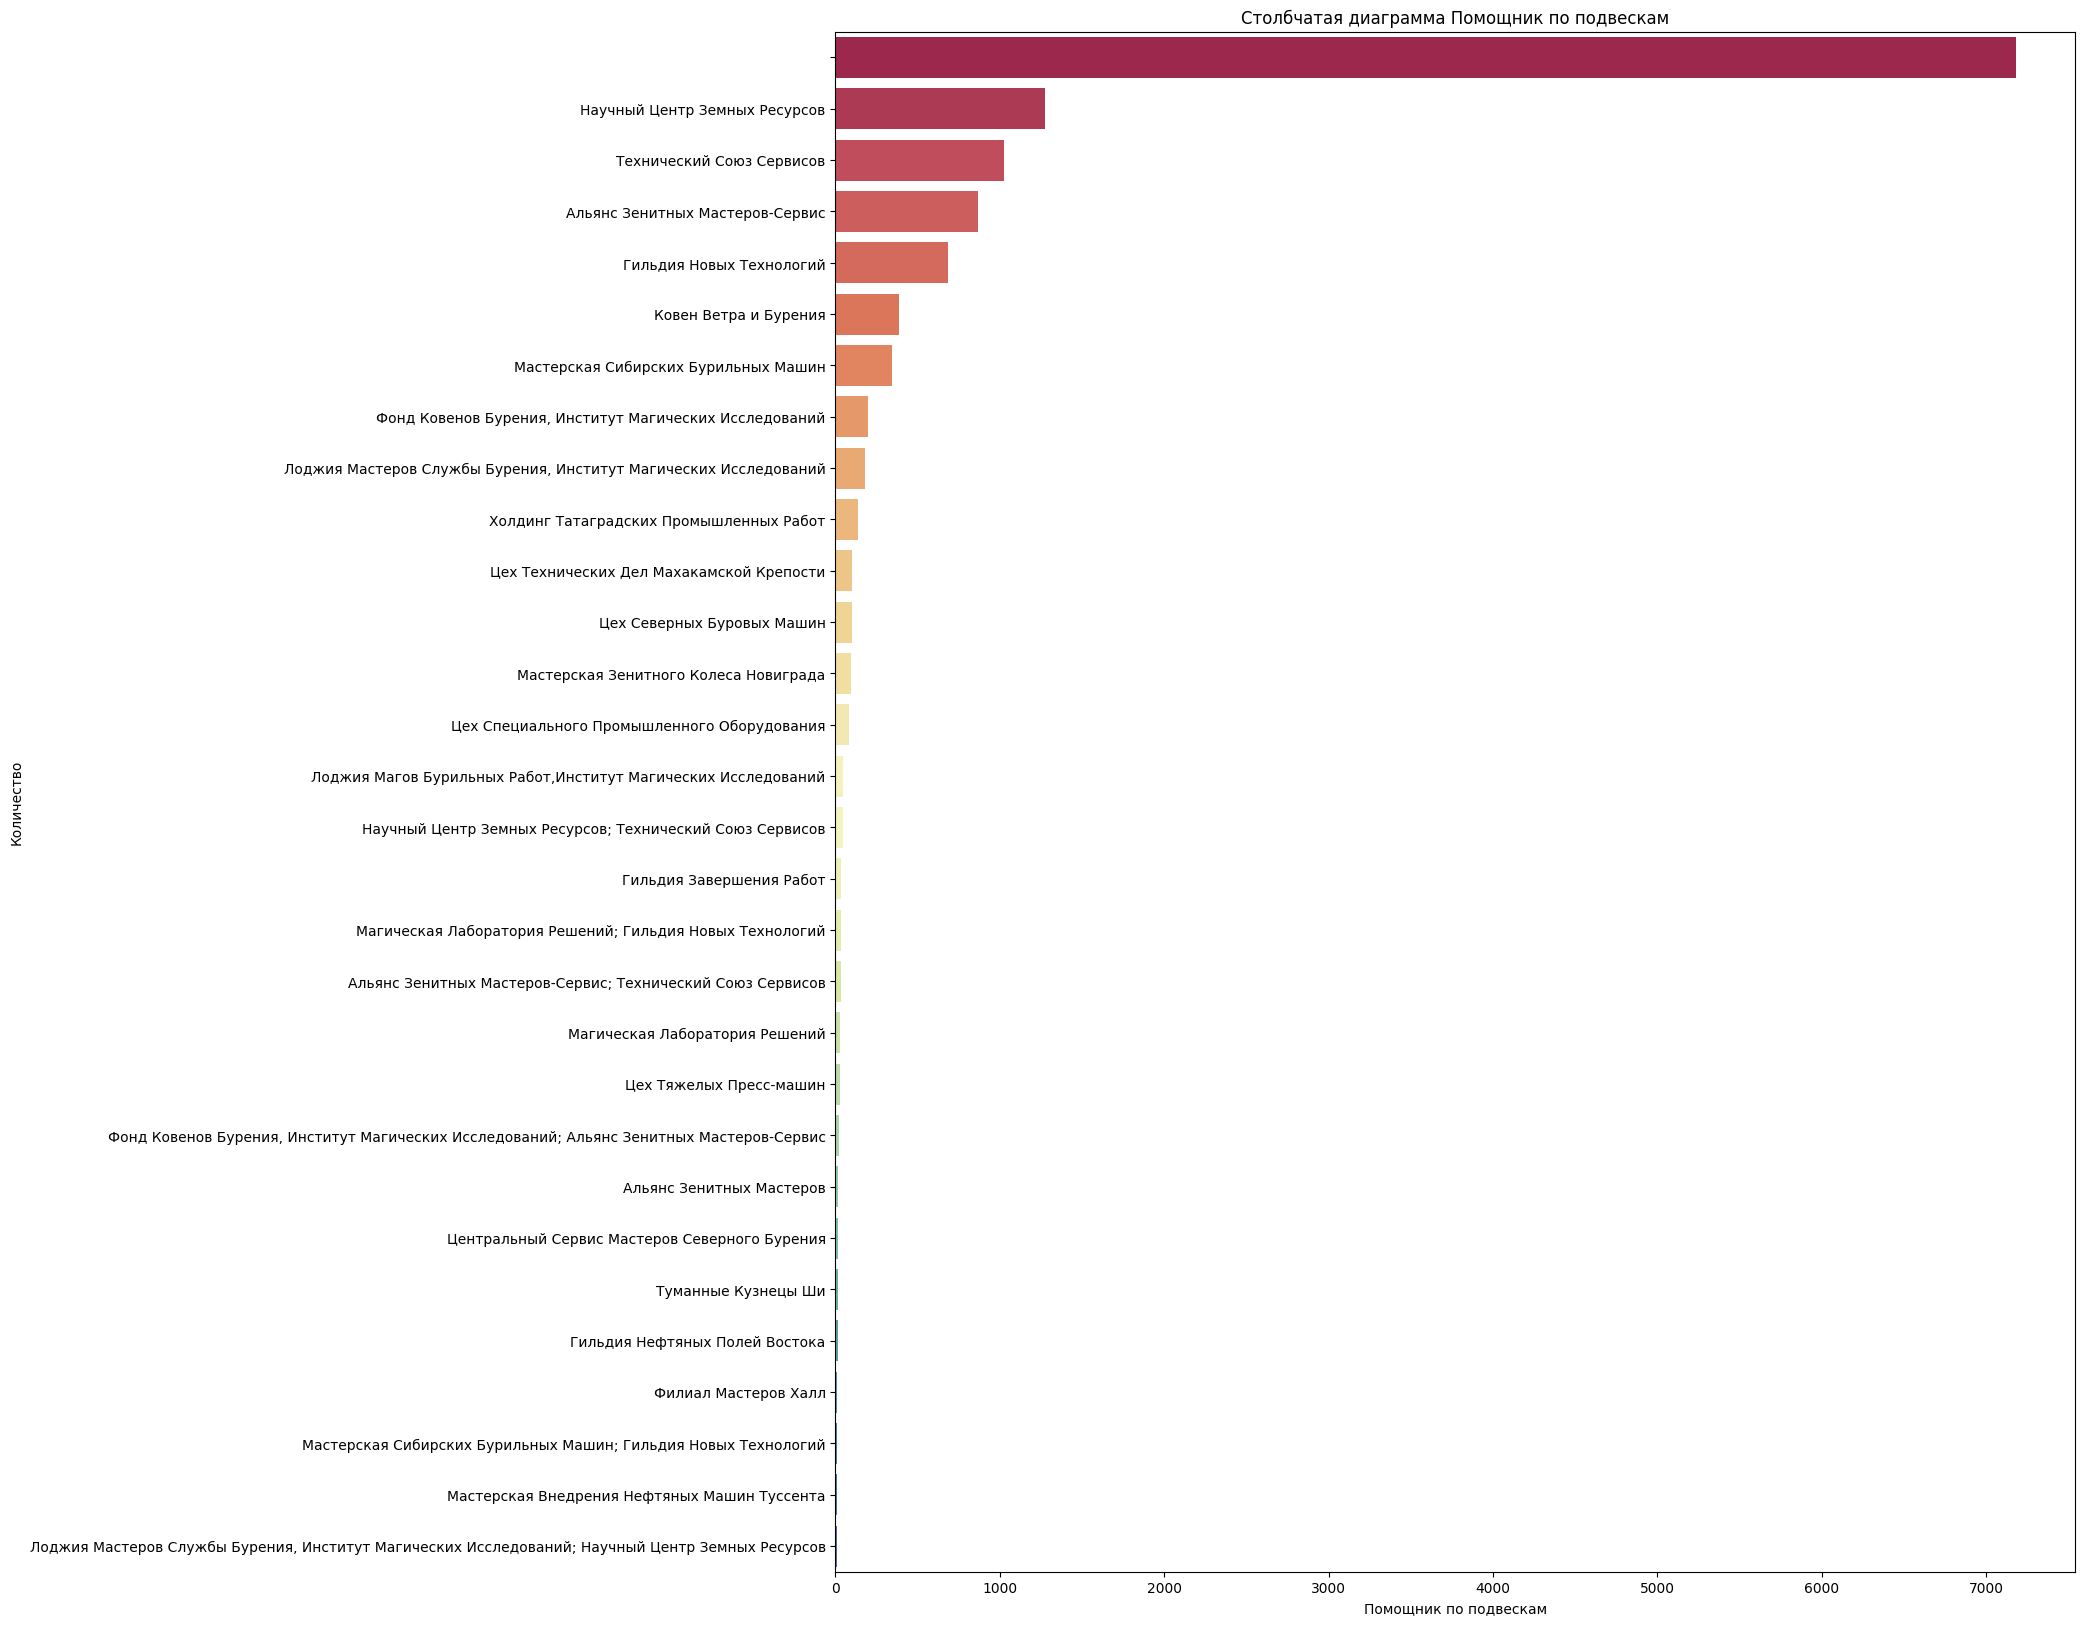

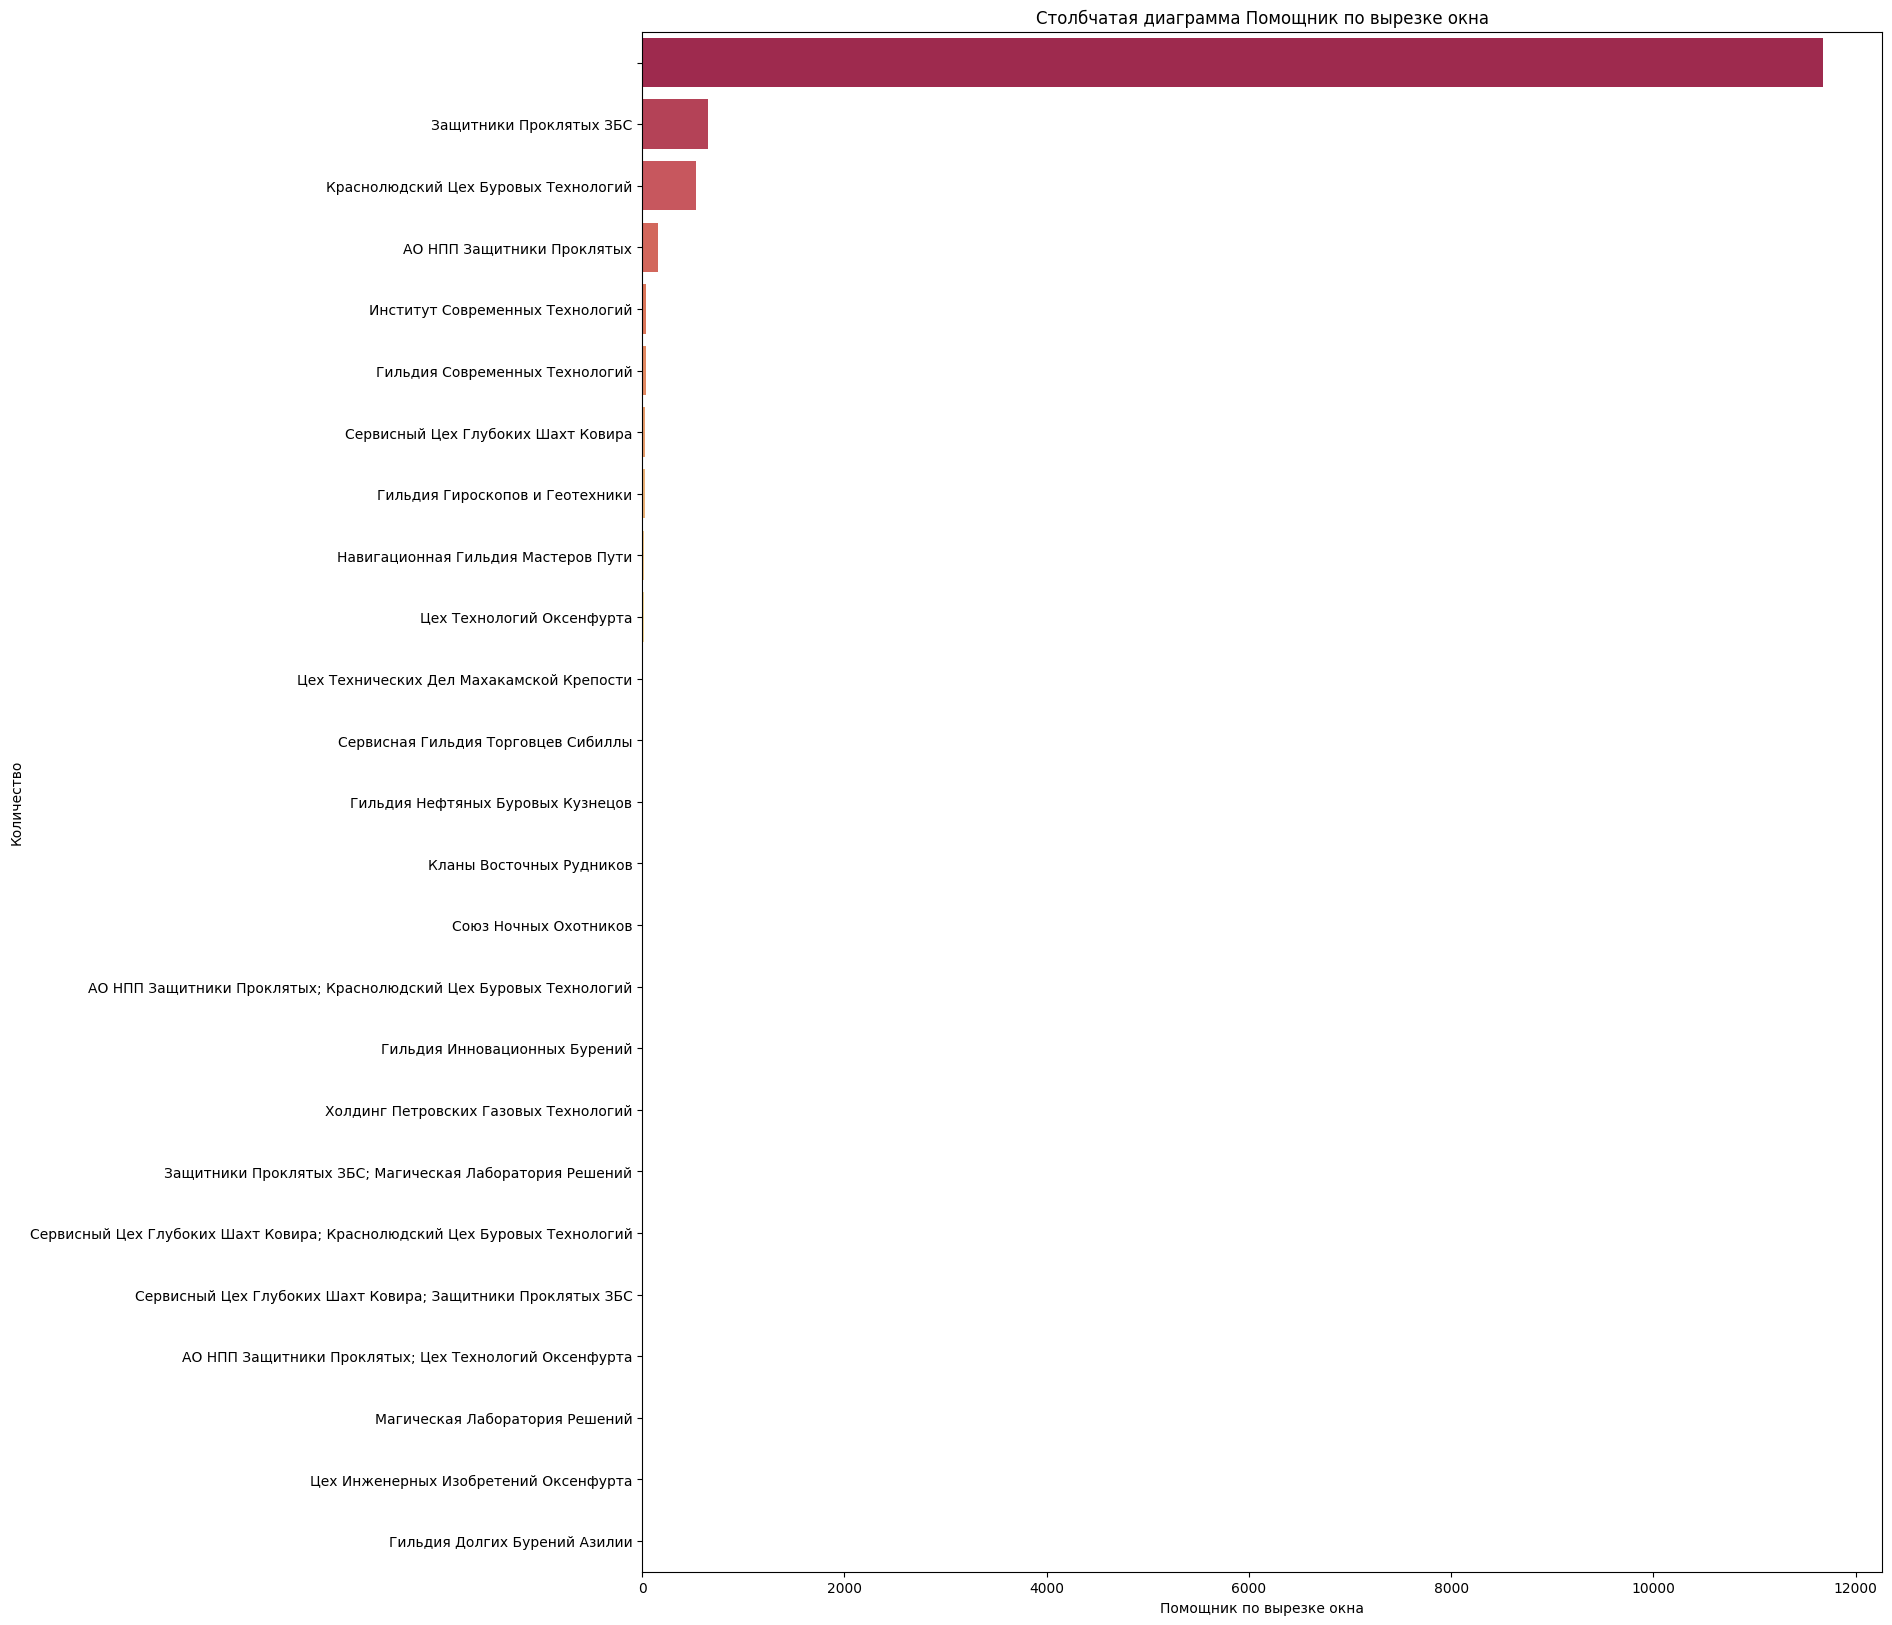

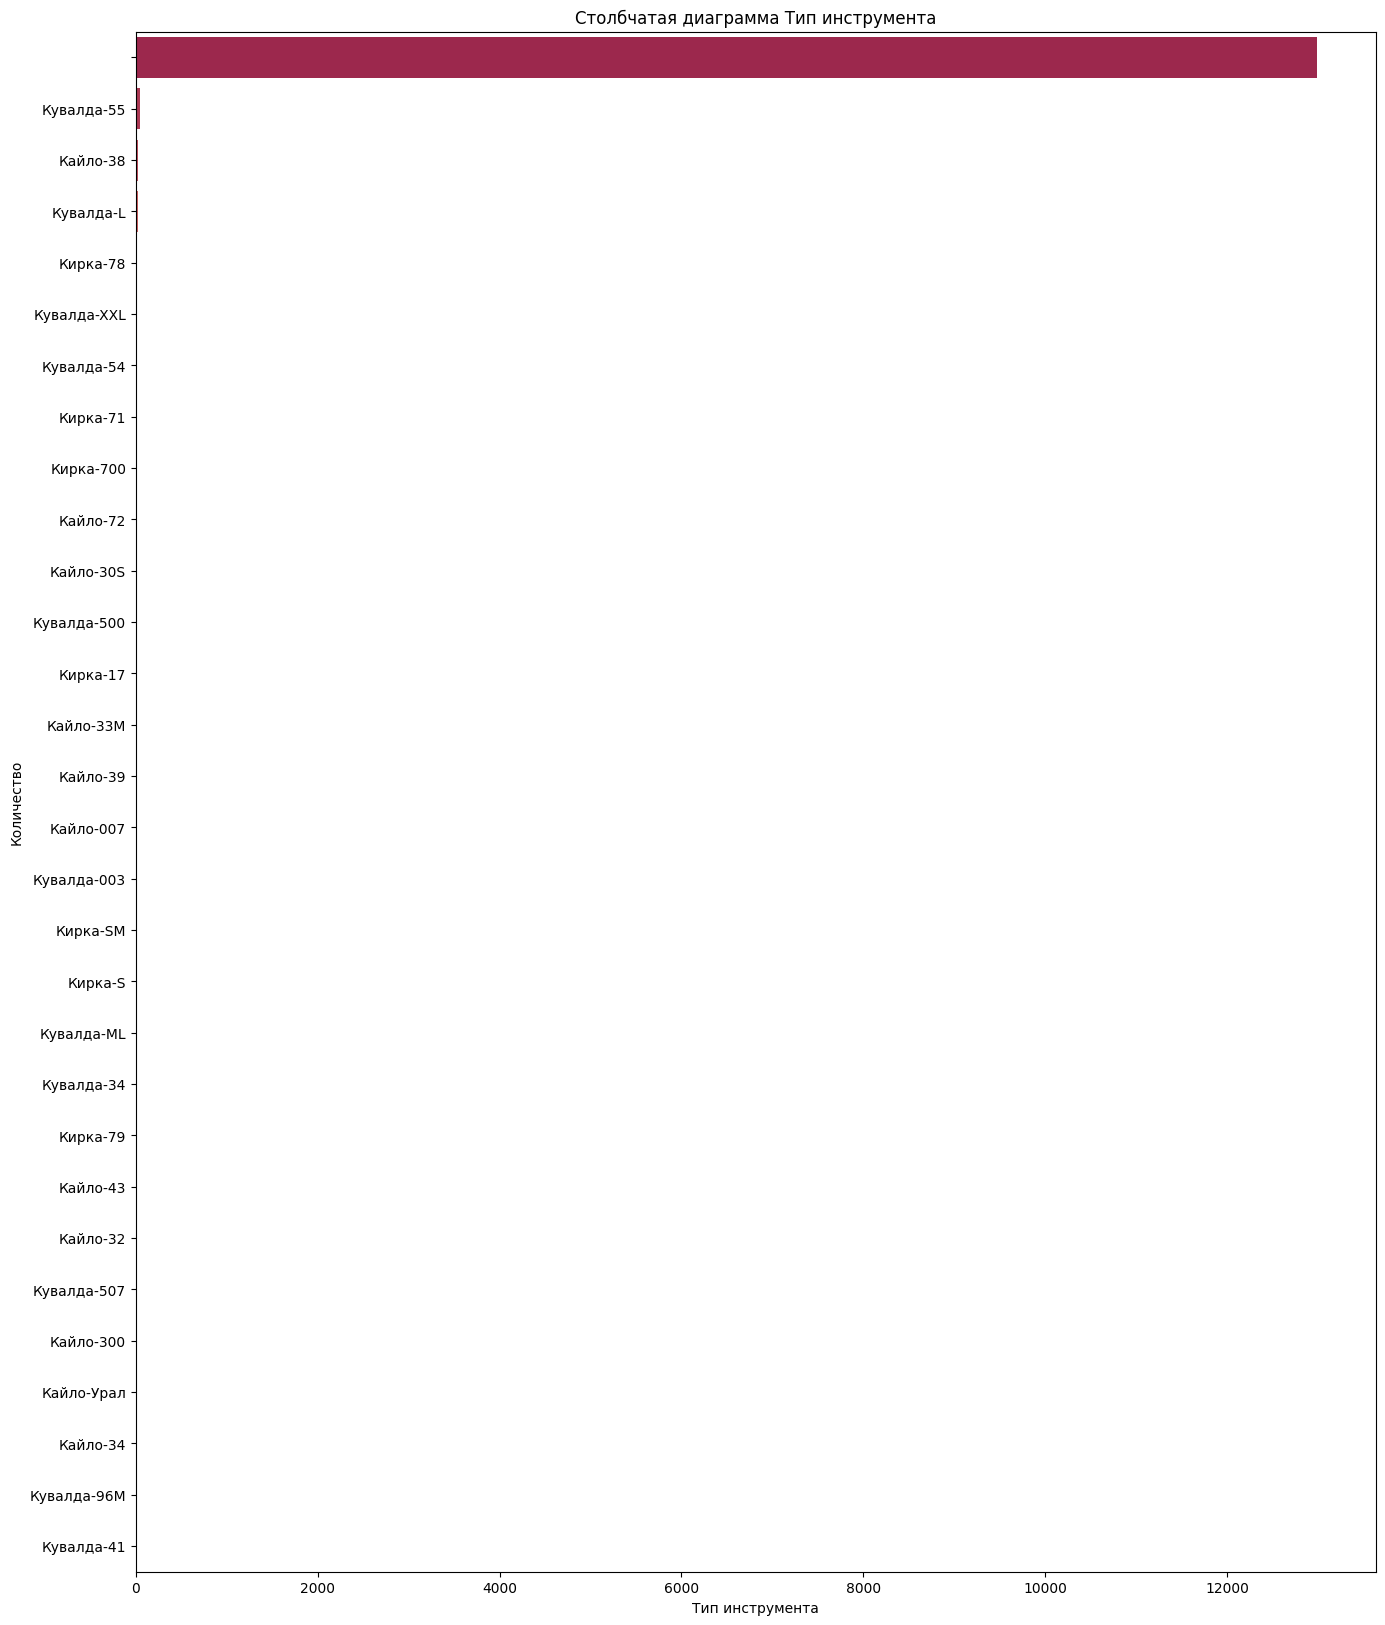

In [ ]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

extremal_count_cat(df, high_feat_cat, "Spectral")

Признаки с общим числом категорий менее 150

 1) Наименование земли. Признак состоит из названий местности, населенныйх пунктов и регионов, в которых усуществлялись посиковые операции. В первой десятке самых популярных земель было проведено около 60% всех исследований. Самы популярные это Приобия, Вингар, Мессоя и Новый Портен. В далекой Приобии было сделано больше всего записей. Несмотря на то, что Приобия подозрительно похоже на Приобье, сама земля находится в крупнейшем королевстве Севера Каэдвен. Территория Каэдвена прилегает к большому горному хребту, за которым обитают только драконы. Из-за внушительных размеров этой горной системы неудивительно, что большинство поисков было проведено именно в Приобье. Сам признак наименование земли несомненно важен, в большинстве регионов поиски могут быть продолжены, а собранные ранее сведения не могут гарантировать, что абсолютно каждый регион был исследован полностью.

 2) Участки. Этот признак состоит из кратких письменных характеристик ращелин. Основные характеристики: тупик, пилот, основное укрепление, среднее укрепление, верхнее укрепление. Каждая категория представляет собой комбинцию этих характеристик. В пятерке признаков с нибольшей встречаемостью находятся верехнее укрепление+среднее укрпление+основное укрепление, верхнее укрепление+среднее укрепление+основное укрепление+тупик, тупик, пробел, это категория никак не идентифицирована в датасете, среднее укрпление+основное укрепление+тупик.

 Отдельная ситуация по пробелам. Как отдельные категории они встречаются во многих признаках(в признаках по помощникам и участкам) и могут занимать около 10%, но например по признаку Помощник по вырезке окна, то пробелов 90%. Однако возможности заполнить эти пробелы у нас нет, нет истинных значений, а эти пробелы обычно имеют менее предсказуемый характер чем пропуски значений. Если рассмотреть признаки помощников, можно предположить, что пробелы стоят, когда узкоспециализированные команды не привлекались в некоторых случаях. Можно оставить всё как есть, либо заменить пробелы на заглушки, так модели проще будет их идентифицировать.

 3) Технологическая особенность. Признак представляет собой описательную характеристику расщелины на всей ее протяженности с учетом ответветвлений и пилотных скважин. Либо характеристика у расщелины одна, например горизонтальная, либо это пересечения характеристик, например категория горизонтальная + пилотов 40. Чаще всего встречаются категории: горизонтальная, горизонтальная + комбинированное магическое воздействие, наклонная, наклонная + пилотов 20. Комбинаций много, а кол-во отвилков или пилотов в категории обычно изменяется на шаг равный 20. Это логично, иначе таких категорий было кратно больше. Признак для модели важен, это одна из основных характеристик расщелин.

 4) Тип инструмента. В абсолютном большинстве случаев(95%) тип инструмента не указан, мы не знаем и не можем предположить был ли инструмент использован или нет. Из-за дисбаланса классов признак не информативен.

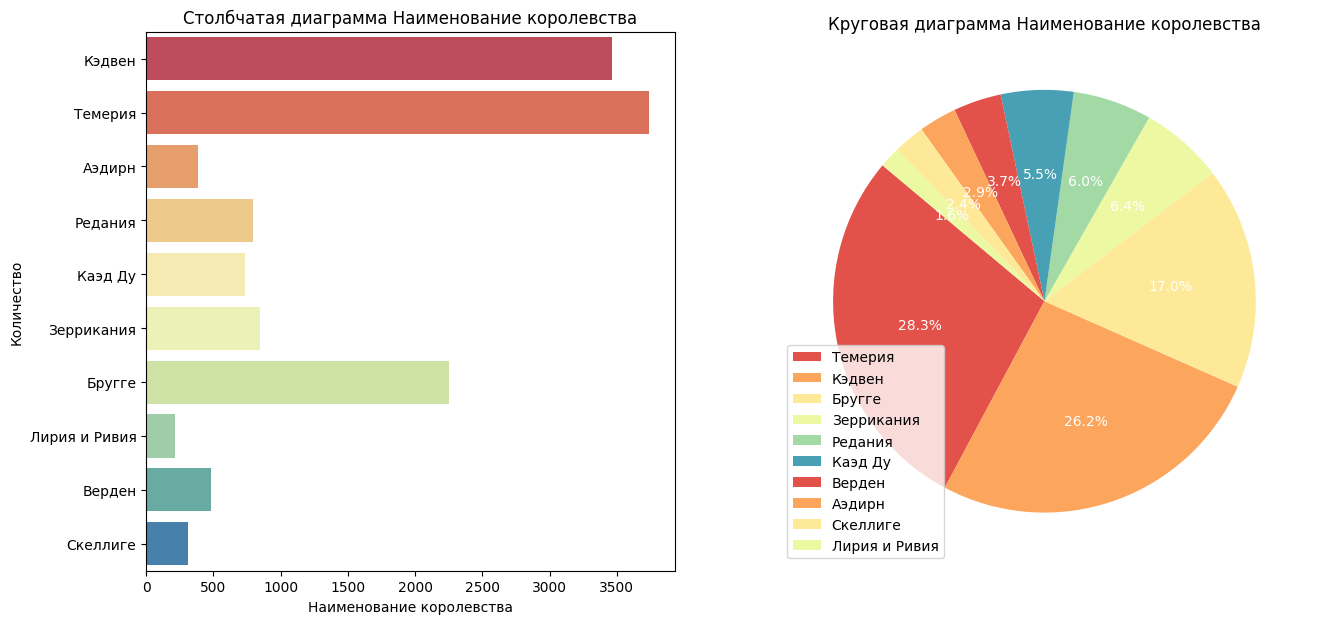

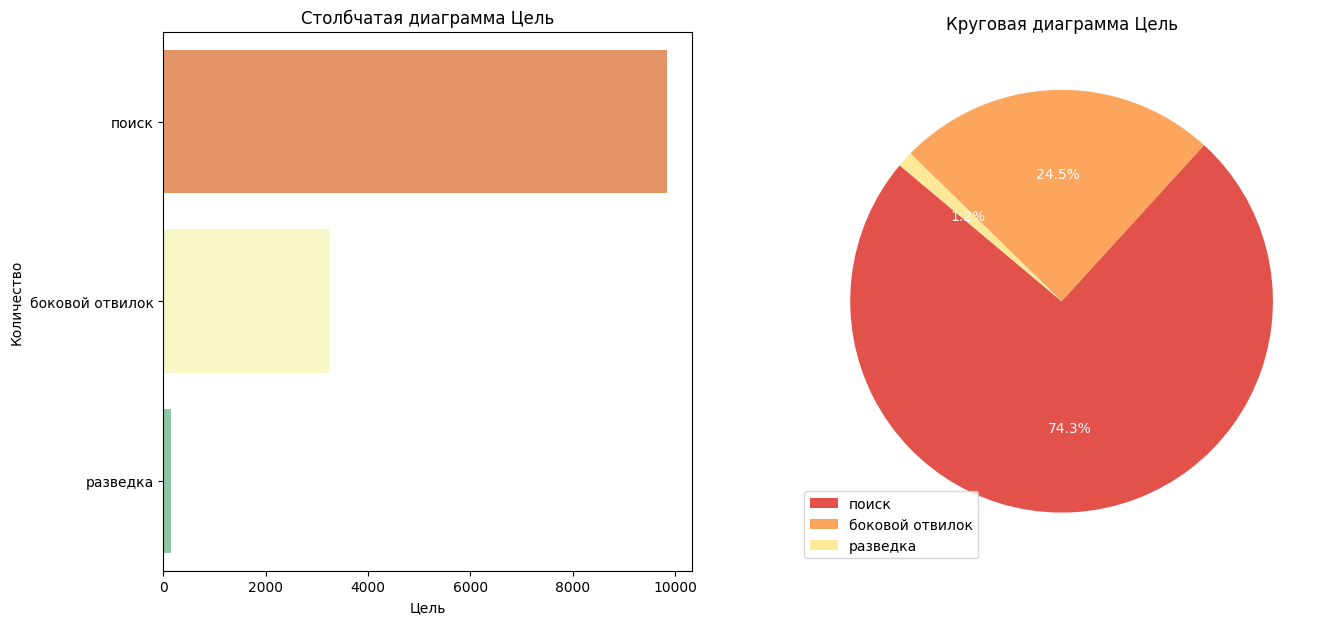

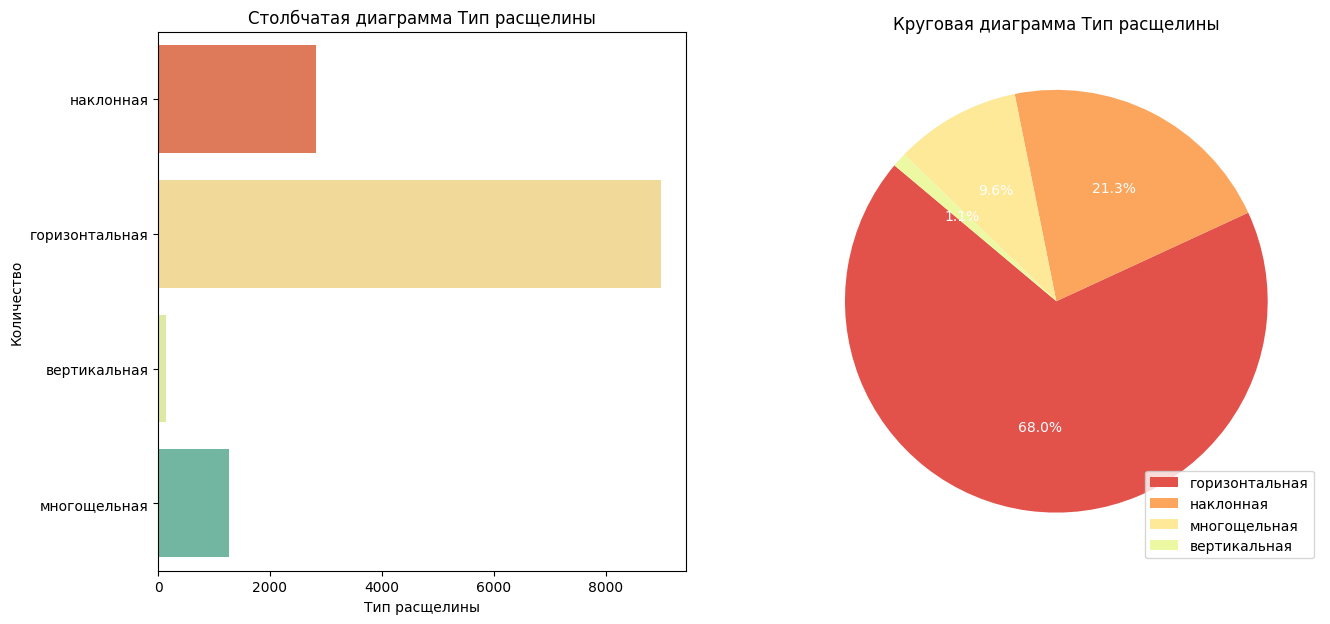

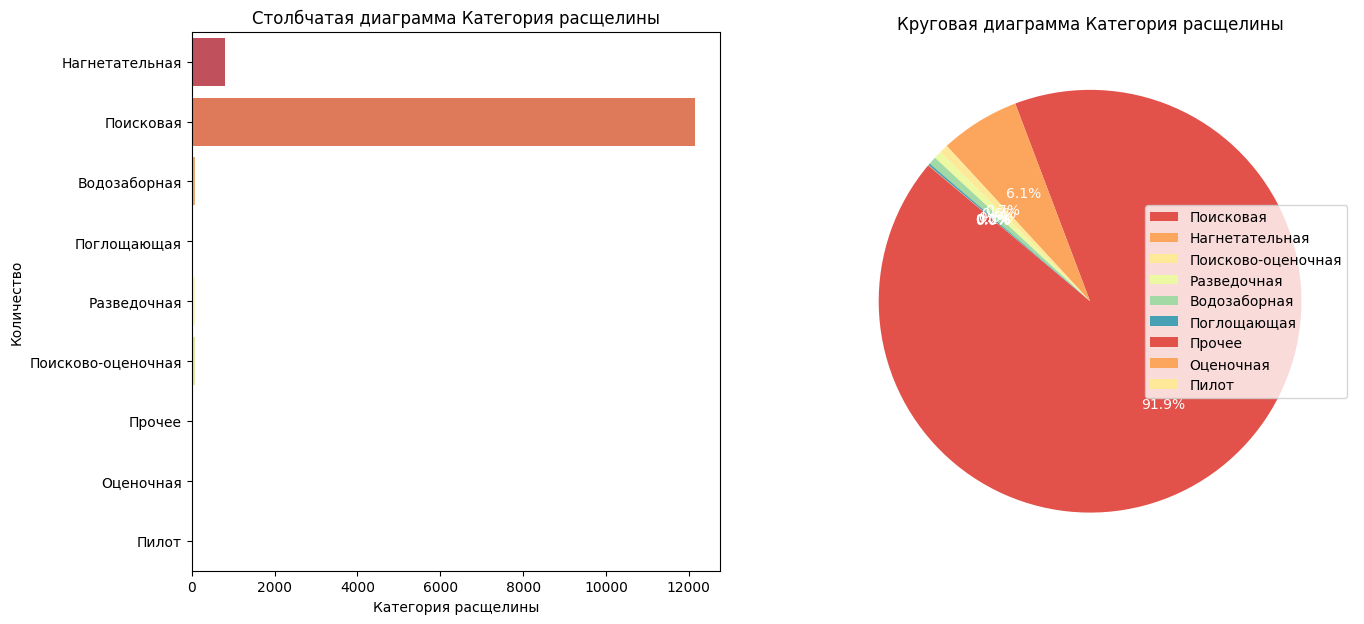

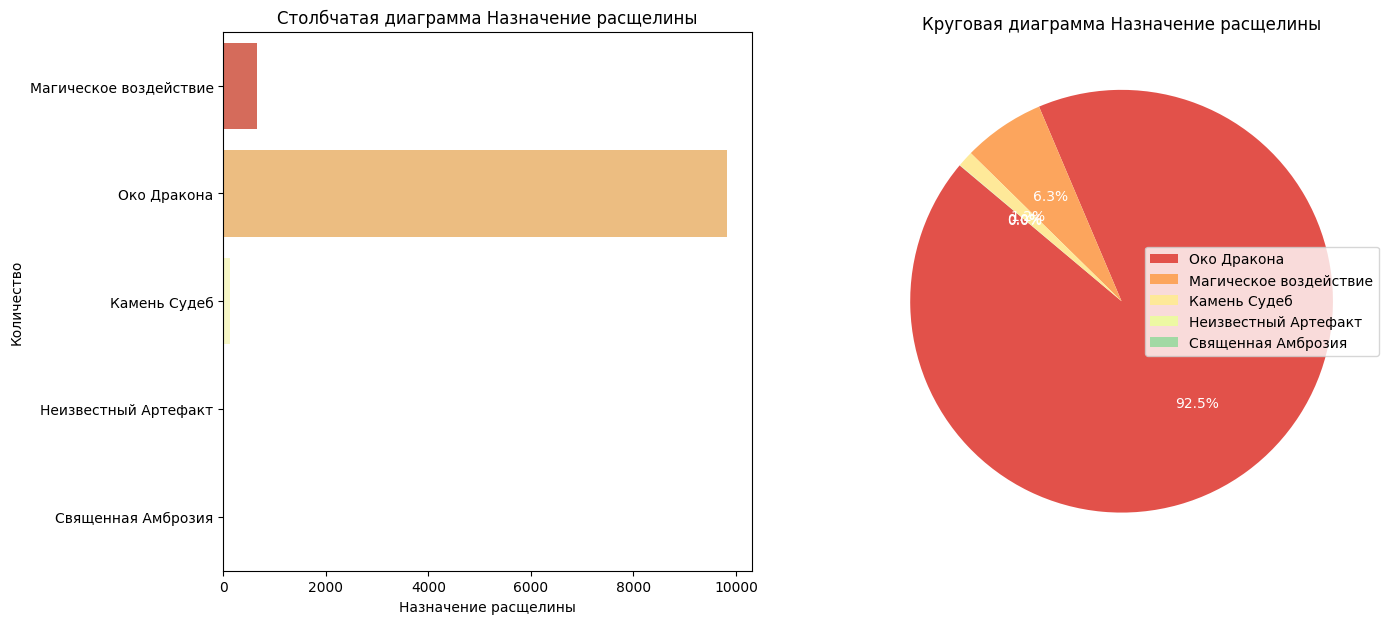

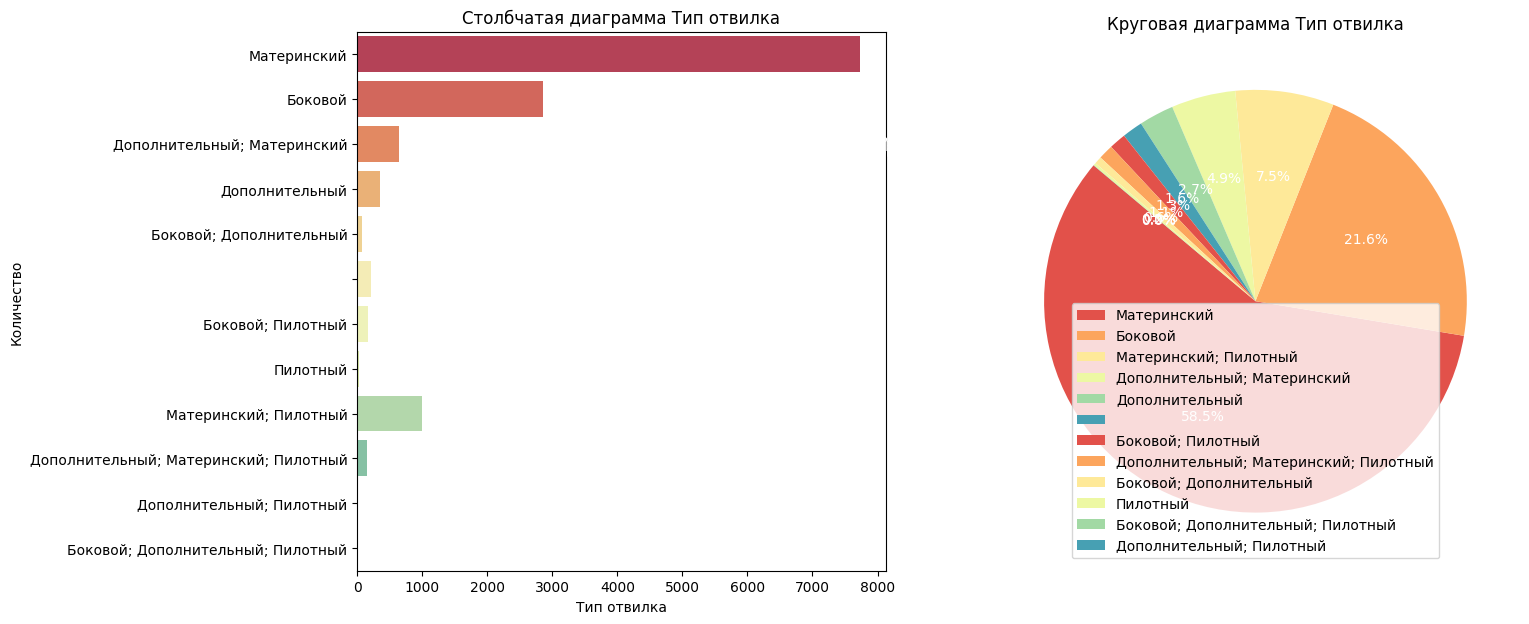

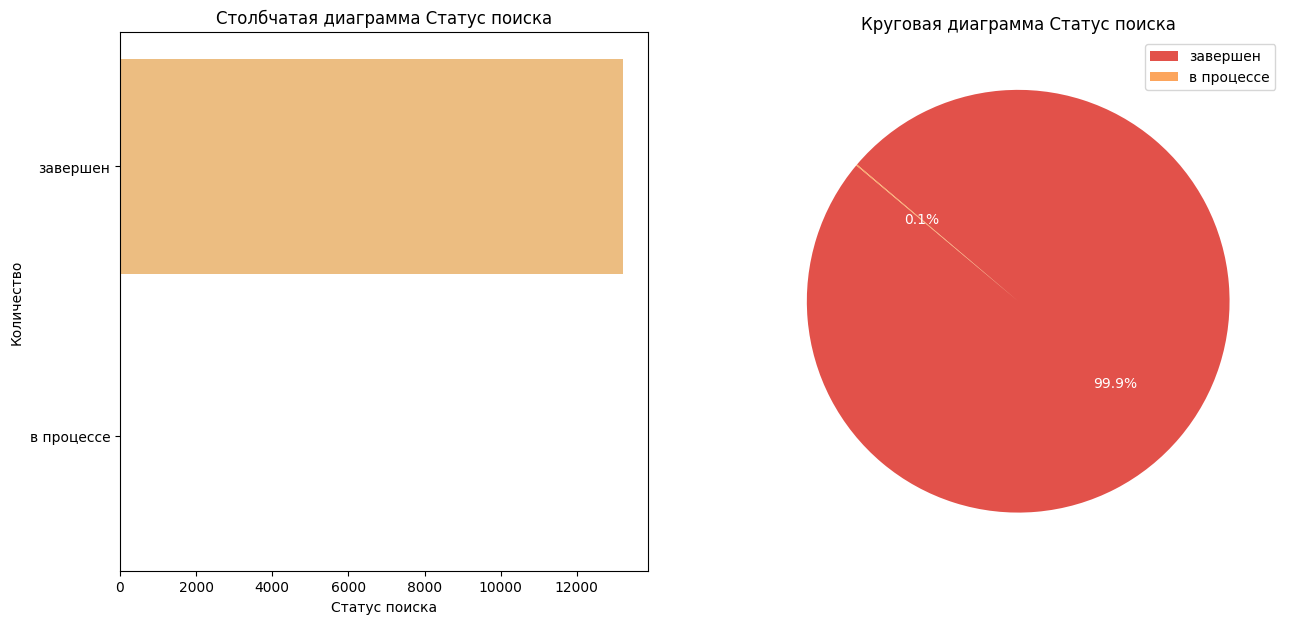

In [ ]:
research_vis_cat(df, low_feat_cat, "Spectral")


 Анализ категориальных признаков.

 1) Наименования королевства. Признак состоит из категорий-названий государств Севера. Чаще всего поисковые работы проводились в Темерии, Каэдвене и Бругге, на них приходится 71% записей. 28 % записей из Темерии, на ее территории находятся горы Махакам, в которых обитают краснолюды, большинство краснолюдских вспомогательных команд именно оттуда.  На Каэдвен приходится 26%, часть его территории прилегает большой горной системе, за которой обитают только драконы. На Реданию приходится всего 6%, несмотря на то, что оно находится в тройке крупнейших. Возможно, из-за отношения Радовида Свирепого к магам число поисковых операций столь мало. Также мало записей про Скеллиге всего 2.5%, на рахипелаге множество горных систем. Возможно из-за противостояния ярлов и выборов верховного ярла надолго задержаьться на Скеллиге. Однако рассчитываю на положительную динамику в будущем.

2) Цель. Признак состоит из трех категорий поиск, боковой отвилок и разведка. На поиск приходится 74.3% всех записей. Боковой отвилок 24.5% исследований, с некоторой долей вроятности помимо основной расщелины, в которой и предполагался поиск, были обнаружены ответвления, достаточной глубины, чтобы быть записанными в отдельную категорию. На разведку приходится всего 1.2% всех данных.

3) Тип расщелины. Это первичный тип, означающий возможную струтктуру самого подземелья. Больше всего горизонтальных расщелин их доля 68% от общего числа. Следом идут наклонные их доля 21%. Доля многощельных равна 9.6%. Меньше всего вертикальных 1%.

4) Категория расщелины. В сущности это техническое назначение расщелины, по нему можно понять для чего она была использована в ходе исследования. Явный дисбаланс классов, доля поисковой категории составила 91%, следом идет категориия нагнетательная  всего 6.1%. Доля остальных категорий составила менее 1 %.

5)


 Статус поиска не ценный признак для прогнозирования. При получении новых данных, все статус поиска скорее всего будет иметь иметь только категорию в процессе, а не завершен. Из этого следует, что данный признак в ни вт обучающую ни в тестовую выборку включать не нужно

# Исследовательский анализ количественных признаков

In [ ]:
df['search_duration'] = (df['Дата окончания поиска'] - df['Дата начала поиска']).dt.days
data_num_cols = data_num_cols.append(pd.Index(['search_duration']))

In [ ]:
data_num_cols

Index(['Количество труб', 'Количество дополнительных отвилков',
       'Количество пилотных отвилков', 'Глубина по отвилку',
       'Глубина первого отвилка', 'Путь поиска в первом отвилке',
       'Общее время поиска', 'Общее время активного поиска',
       'Общее время простоев', 'Количество аварий', 'Количество брака',
       'Количество геологических осложнений', 'Количество осложнений',
       'Количество простоев по метеоусловиям', 'Количество простоев',
       'Количество ремонтов', 'Количество простоев без виновника',
       'Количество простоев по вине королевства',
       'Количество простоев в поиске',
       'Количество простоев в наклонном поиске',
       'Количество простоев по зельям',
       'Количество простоев в контроле поиска',
       'Количество простоев в конце расщелины',
       'Количество простоев по долбилам',
       'Количество простоев по вине исследователей',
       'Количество простоев по креплениям', 'Количество простоев (прочие)',
       'Общий путь поис

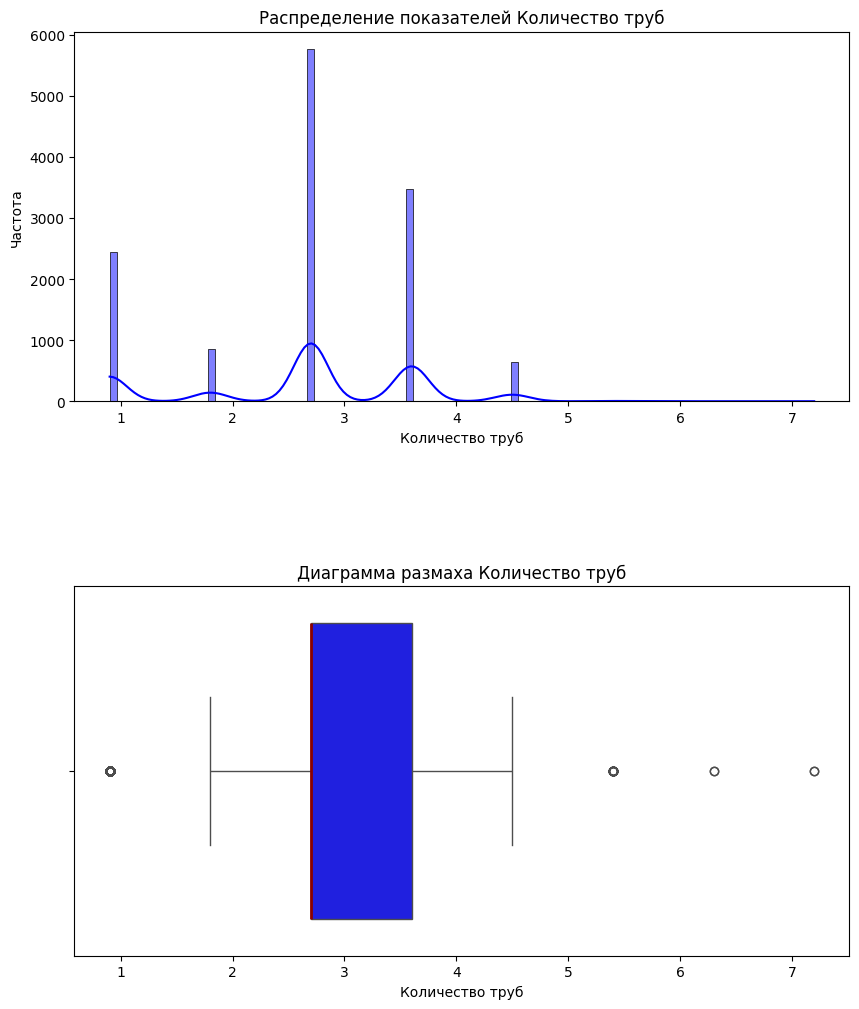

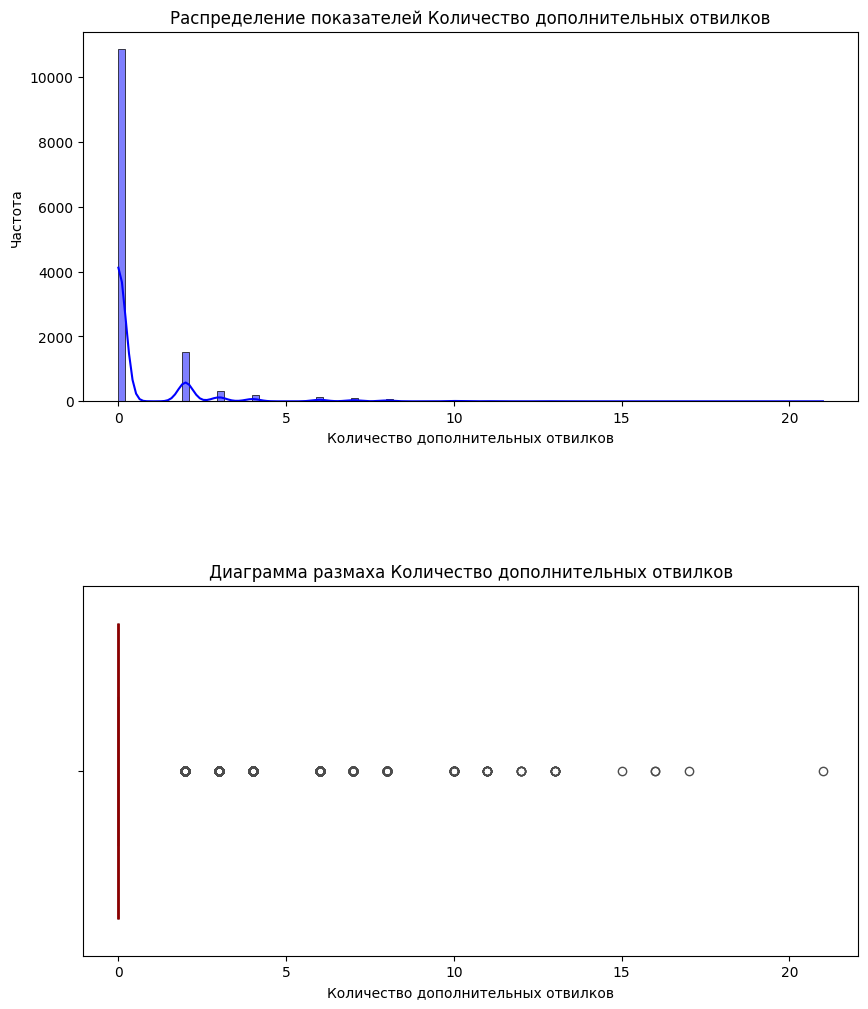

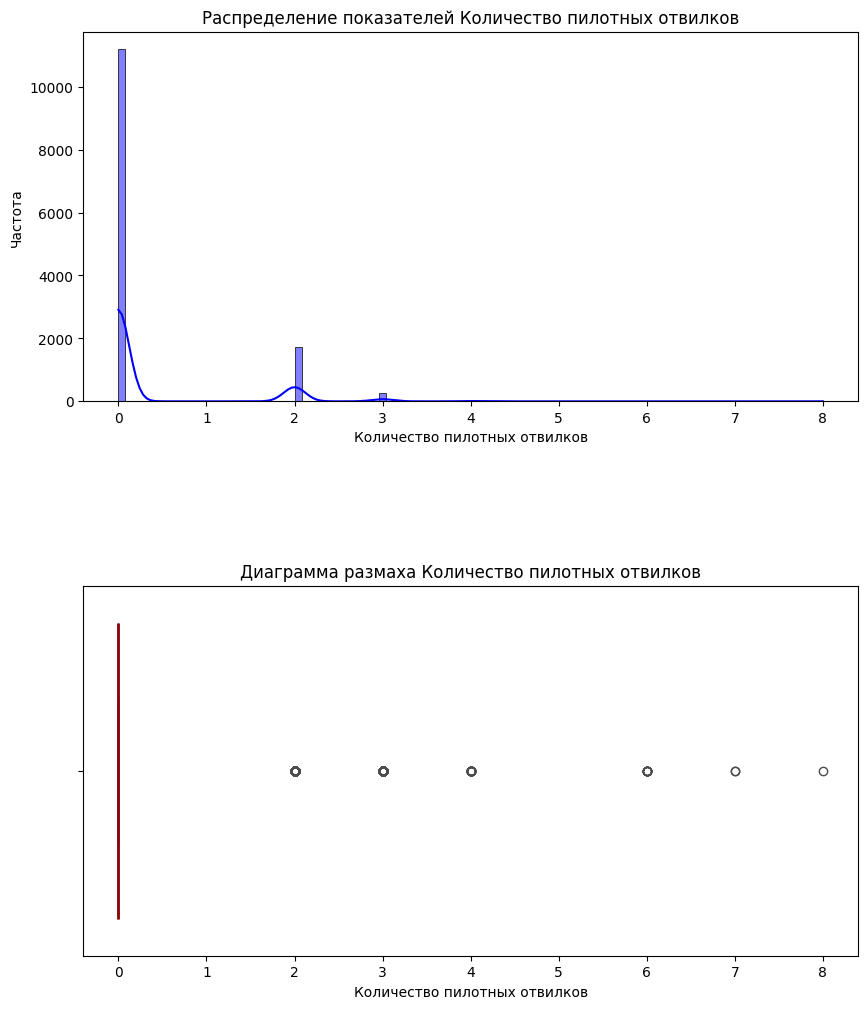

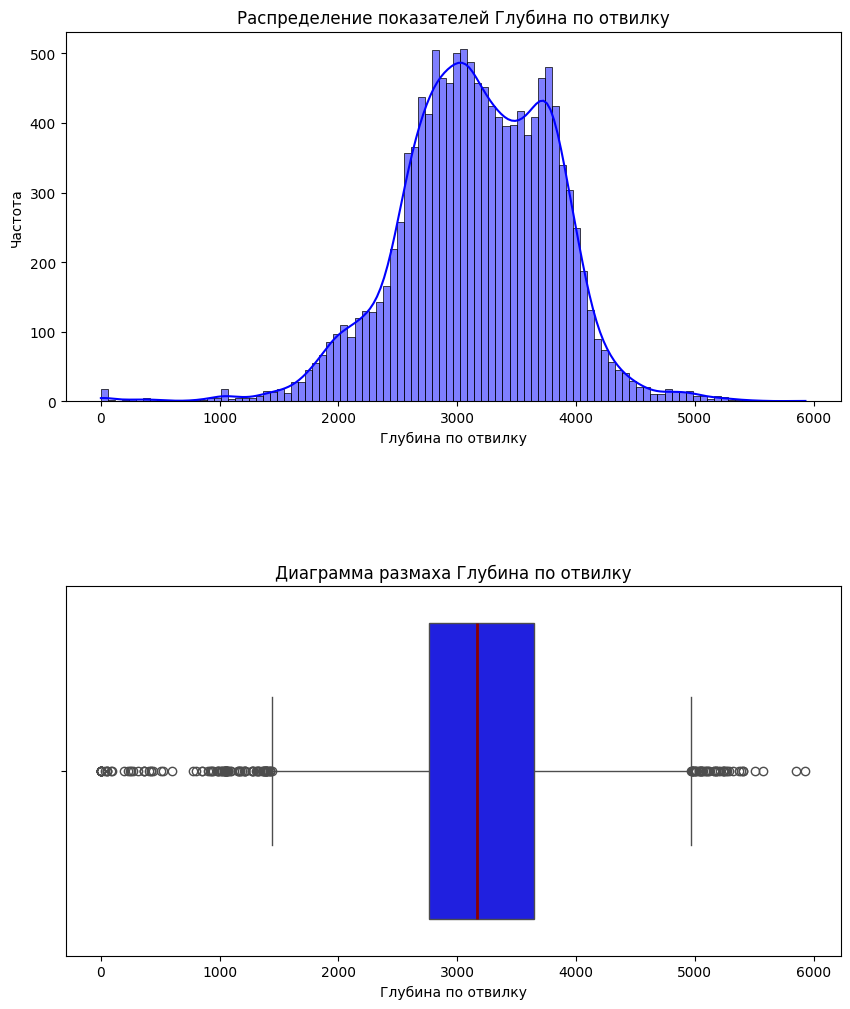

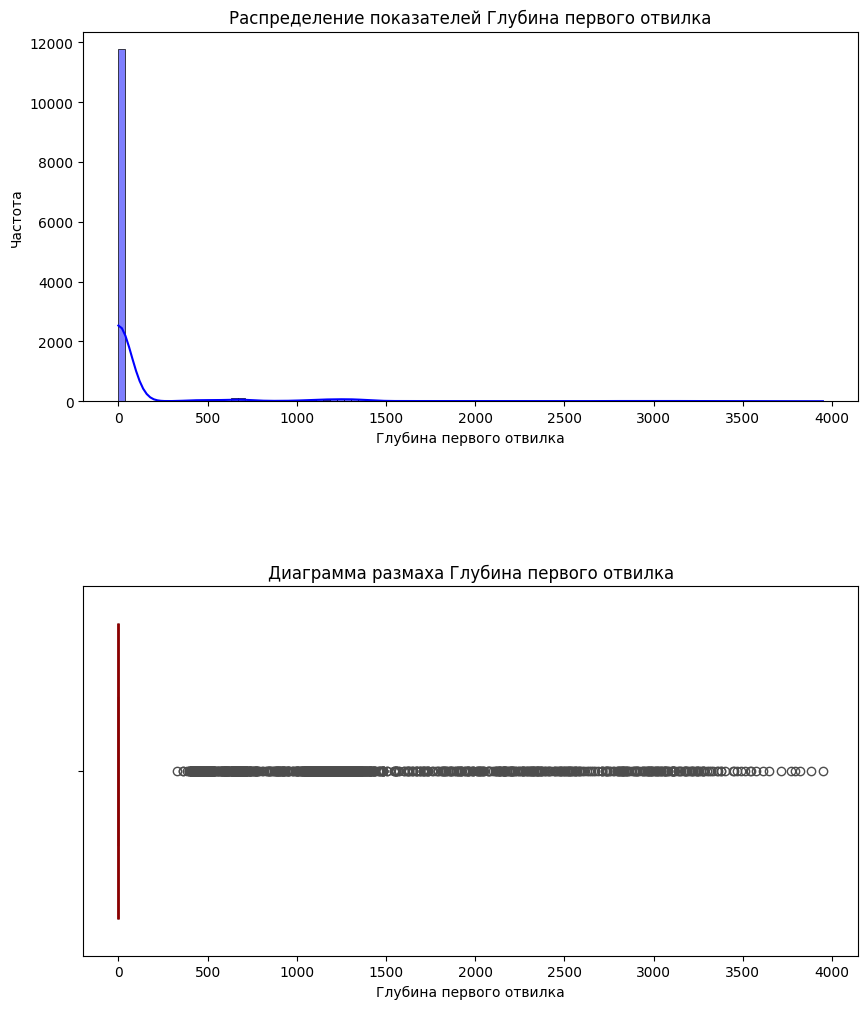

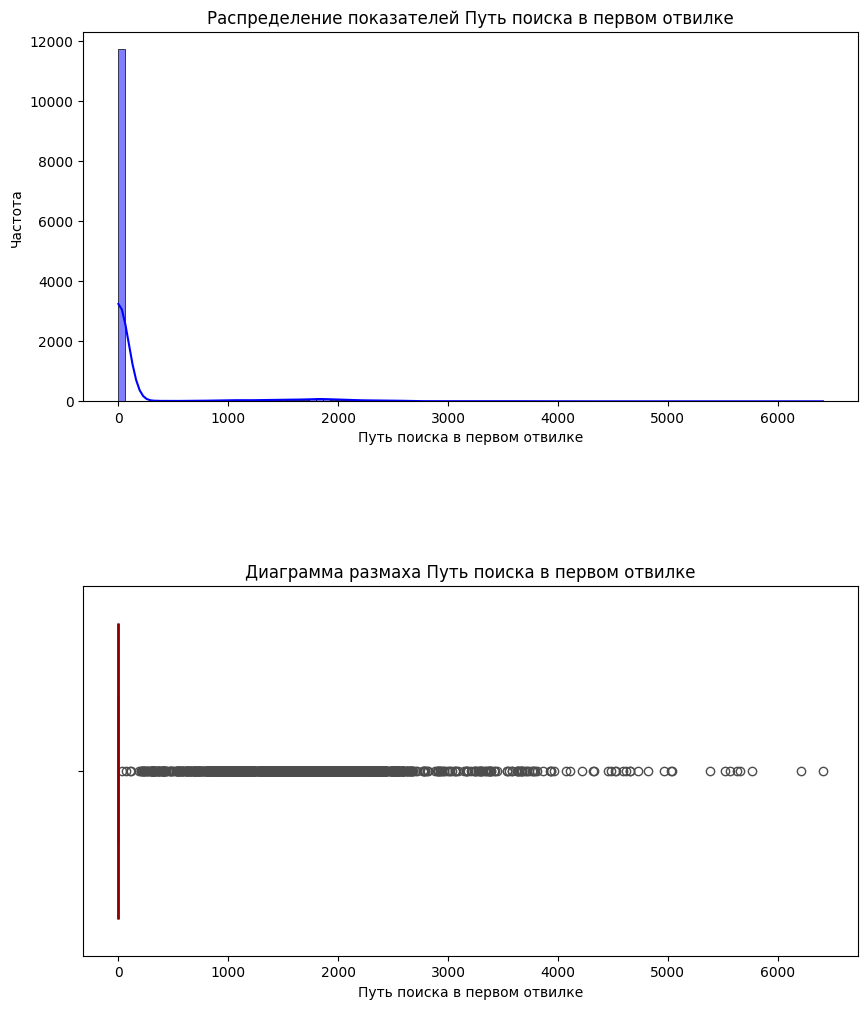

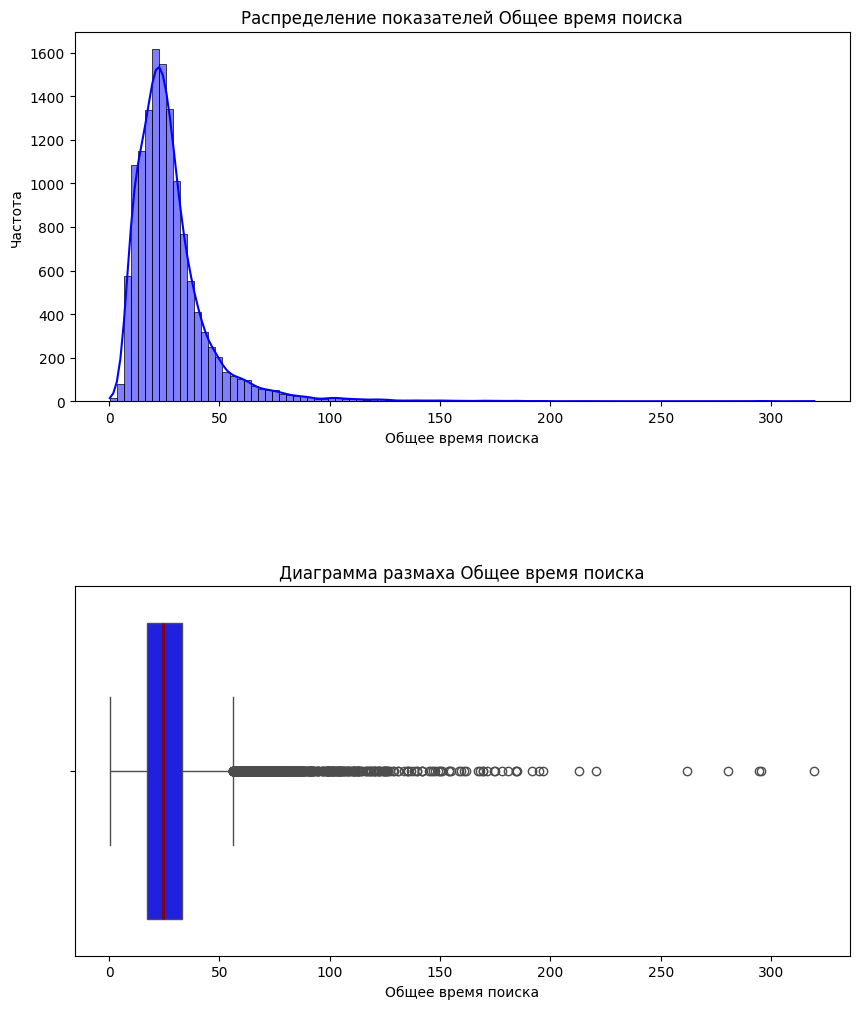

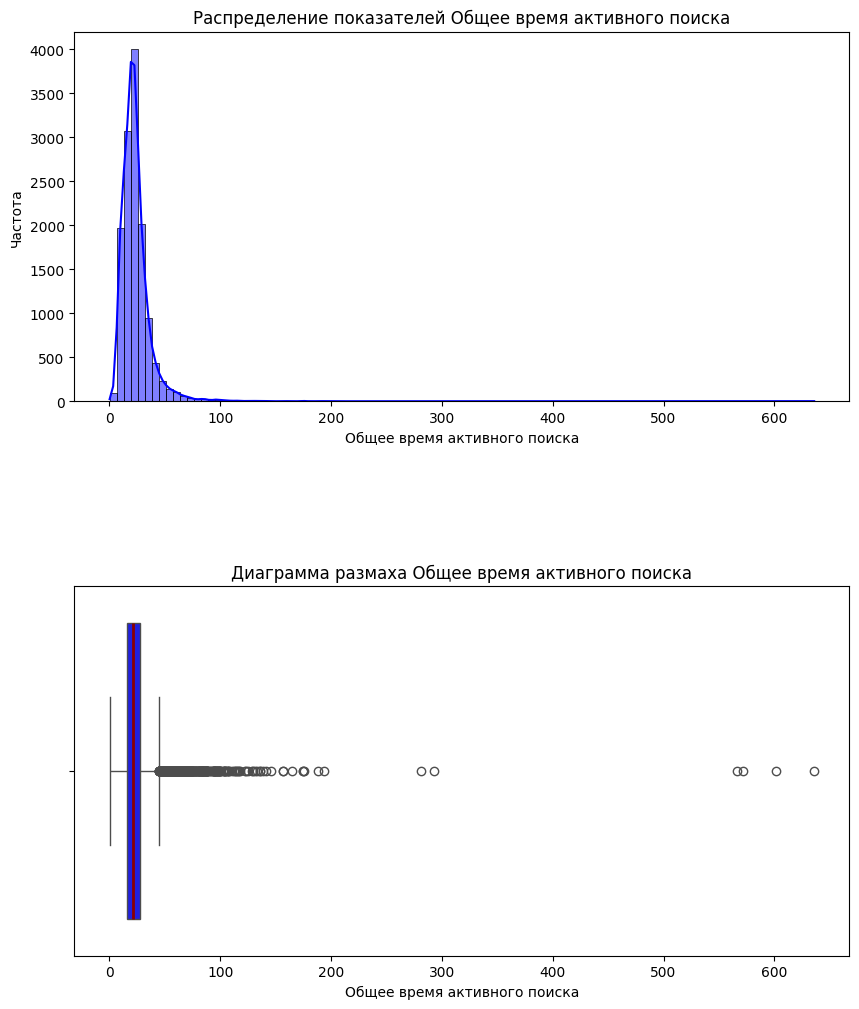

In [ ]:
researchvis_num_features(df, data_num_cols[:8], 'blue')

1) Количество труб скорее категориальный признак нежели количественный, обычно кол-во труб конкретное, а вариантов, сколько их может быть не много.

2) Количество дополнительных отвилков. Значения от 0 и до 20. Судя по ящику распределния признак тоже скорее категориальный, у нас малое ограниченнное кол-во дополнительных отвилков.

3) Количество пилотных отвилков. Как и в предыдущих случаях признак скорее категориальный, знчения от 0 и до 8.

4) Глубина по отвилку. Признак преимущественно распределен нормально, несмотря на две вершины с разбросом около 1000 единиц вокруг центрального значения. Средняя глубина 3166.

5) Общее время поиска и общее время активного поиска это явная утечка целевого признака, посколку они сопоставимы или от них напрямую зависит величина целевого признака, срока поиска в днях, конечная разница между датой начала поиска и его конца. Следовательно эти признаки учавствовать в обучении не будут.

<ipython-input-9-49eaee6590a0>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(2, 1, figsize=(10, 12))


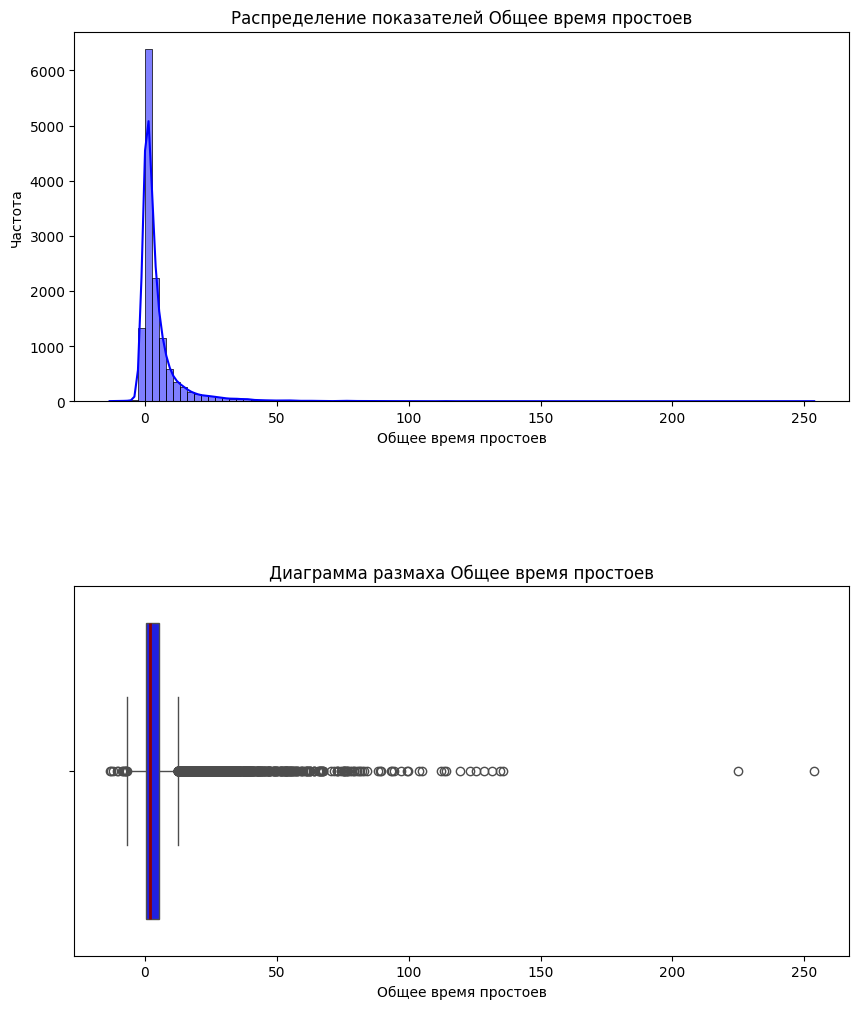

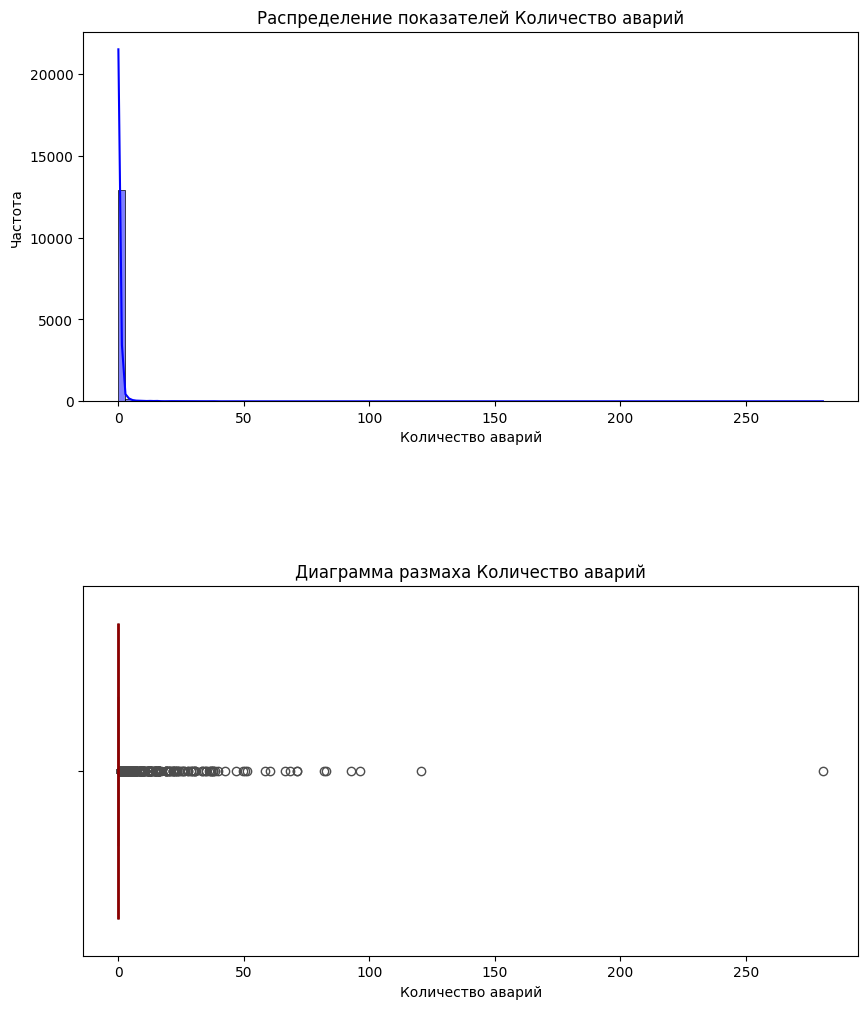

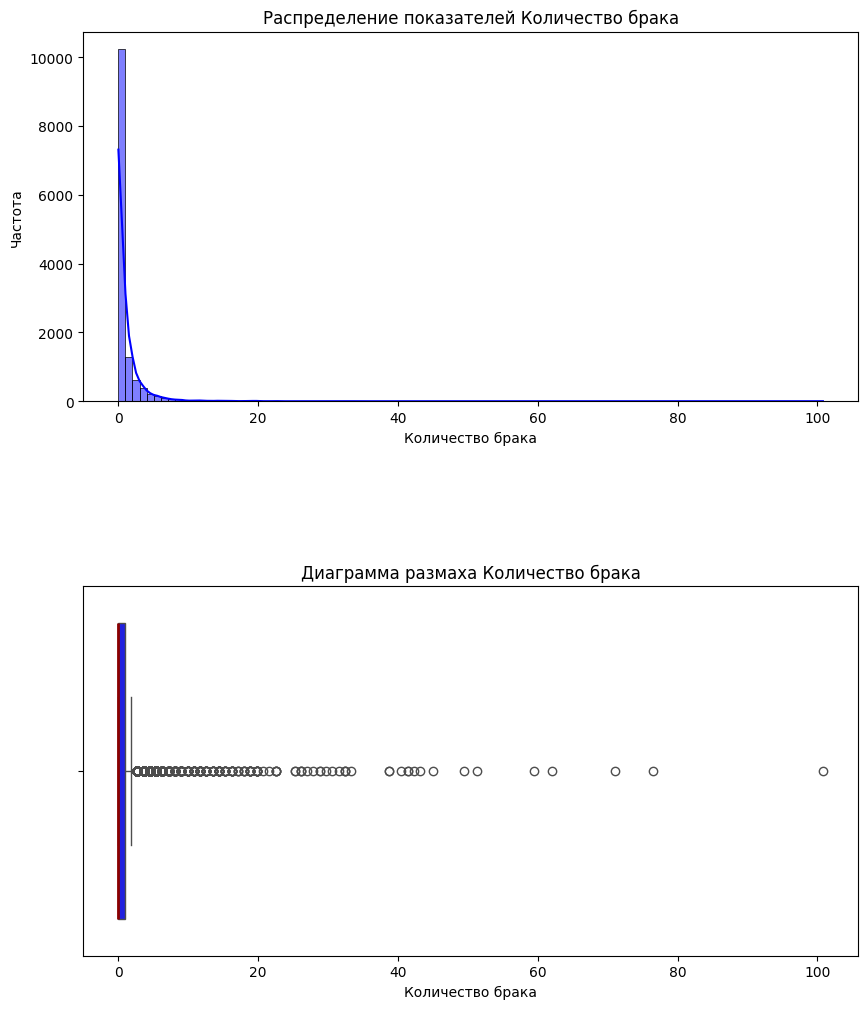

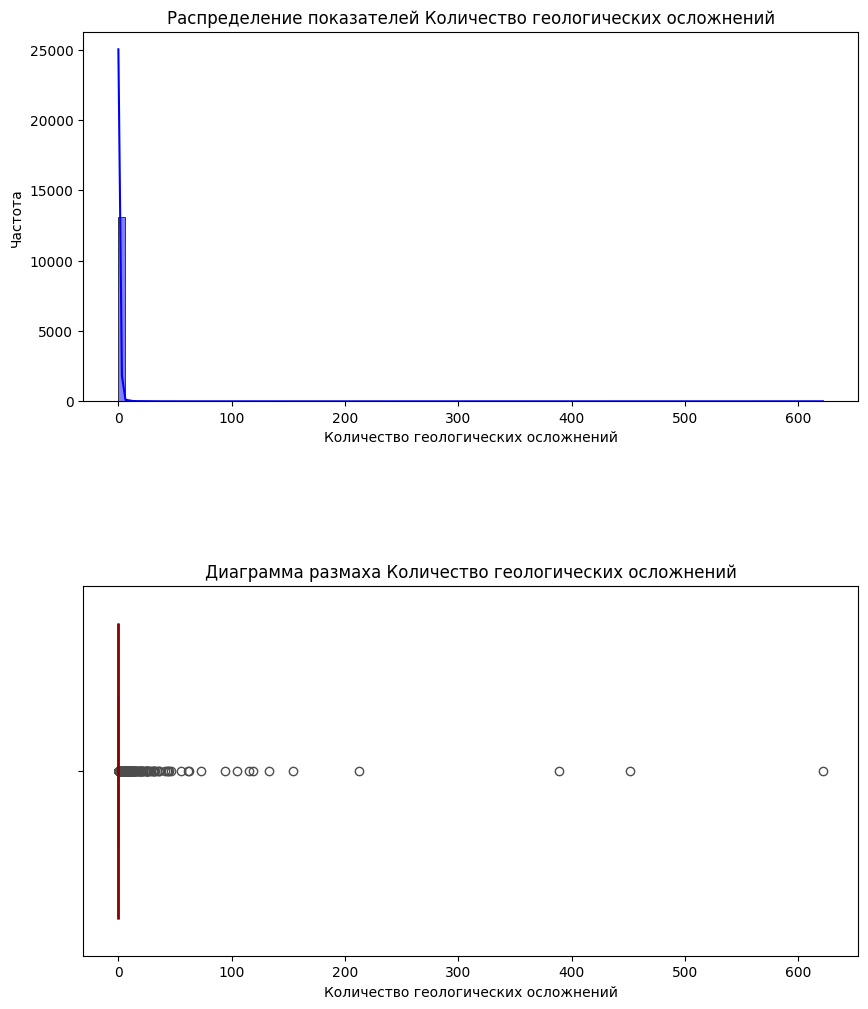

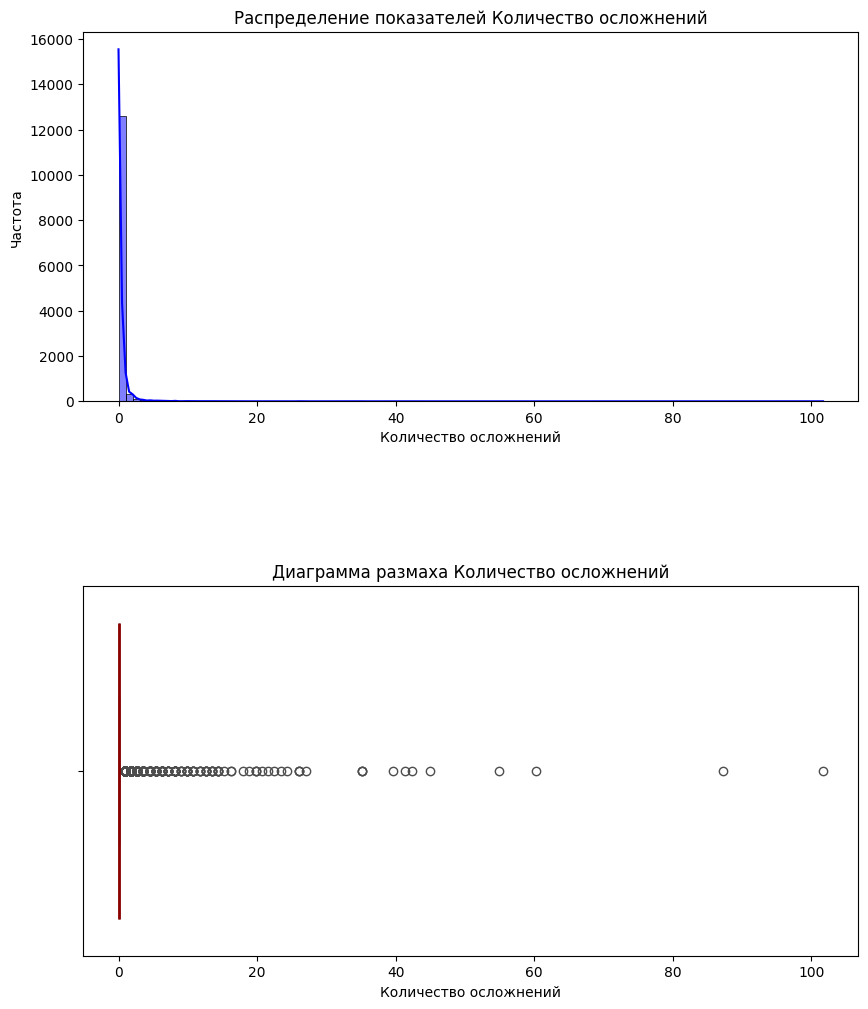

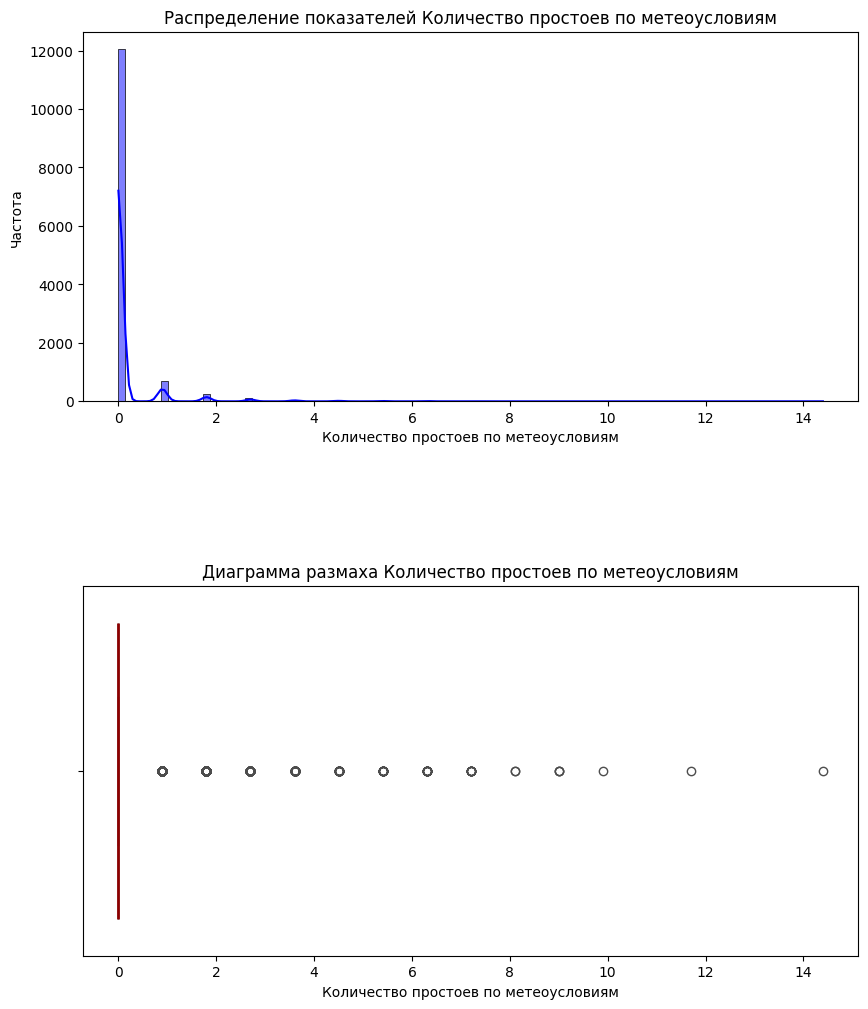

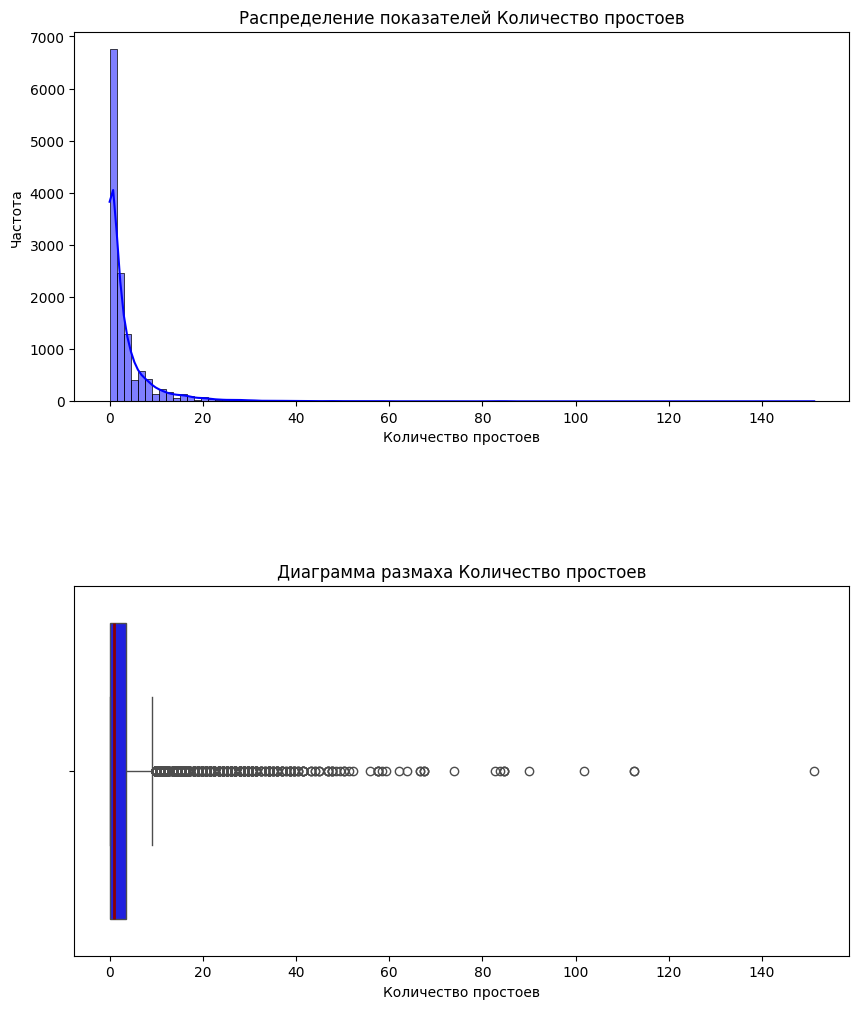

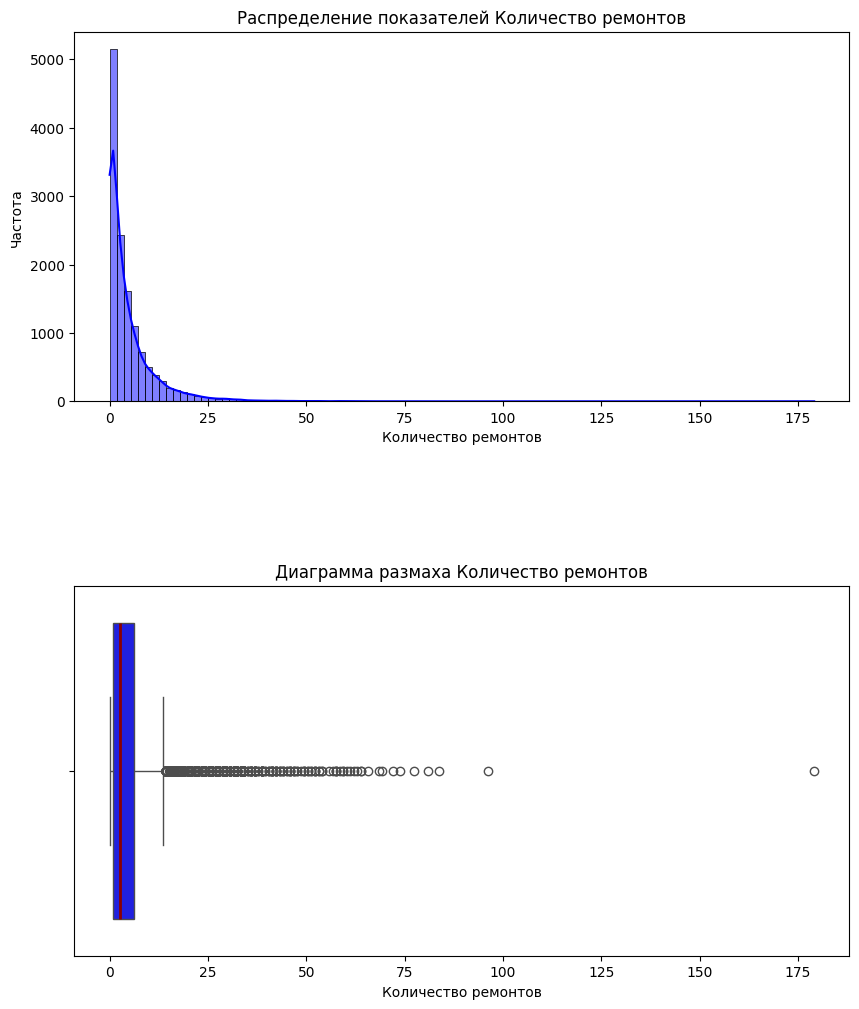

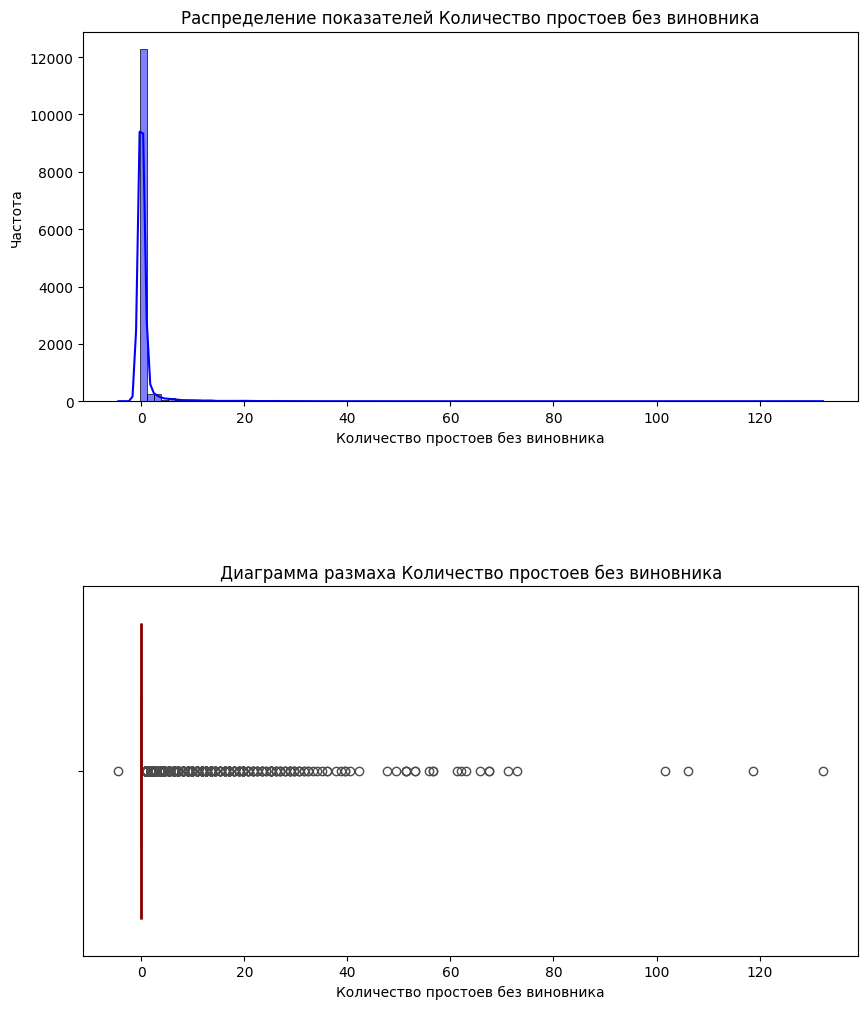

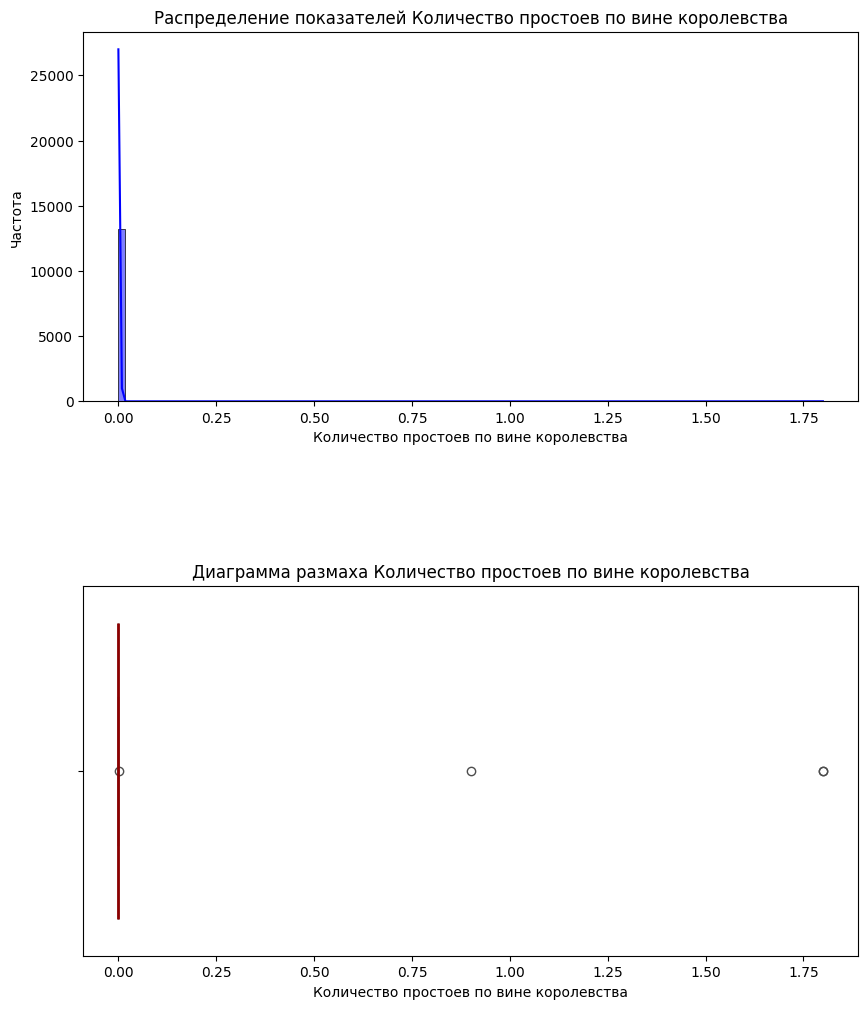

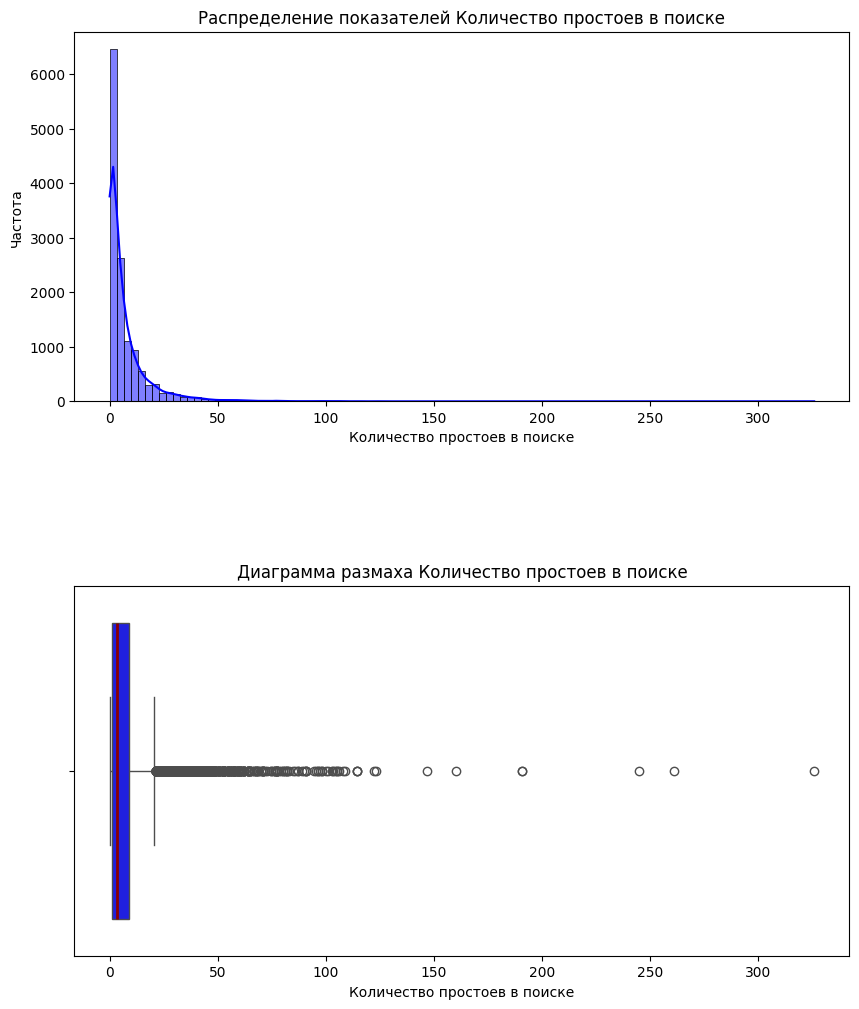

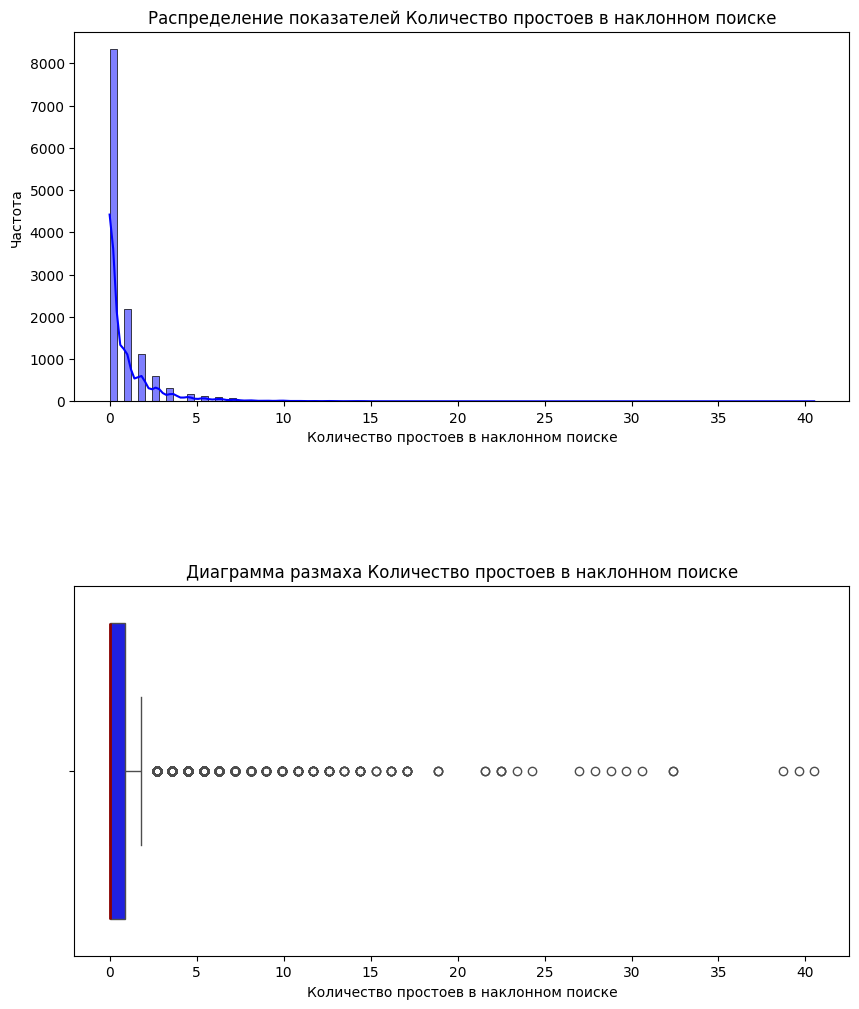

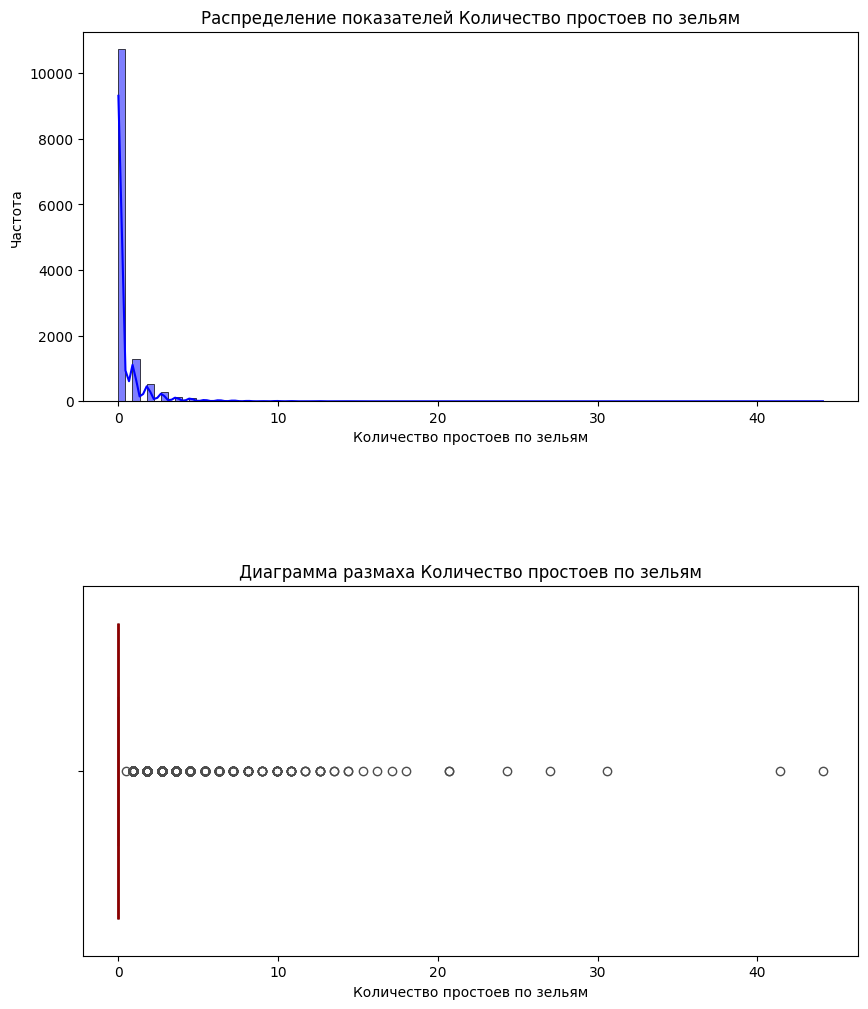

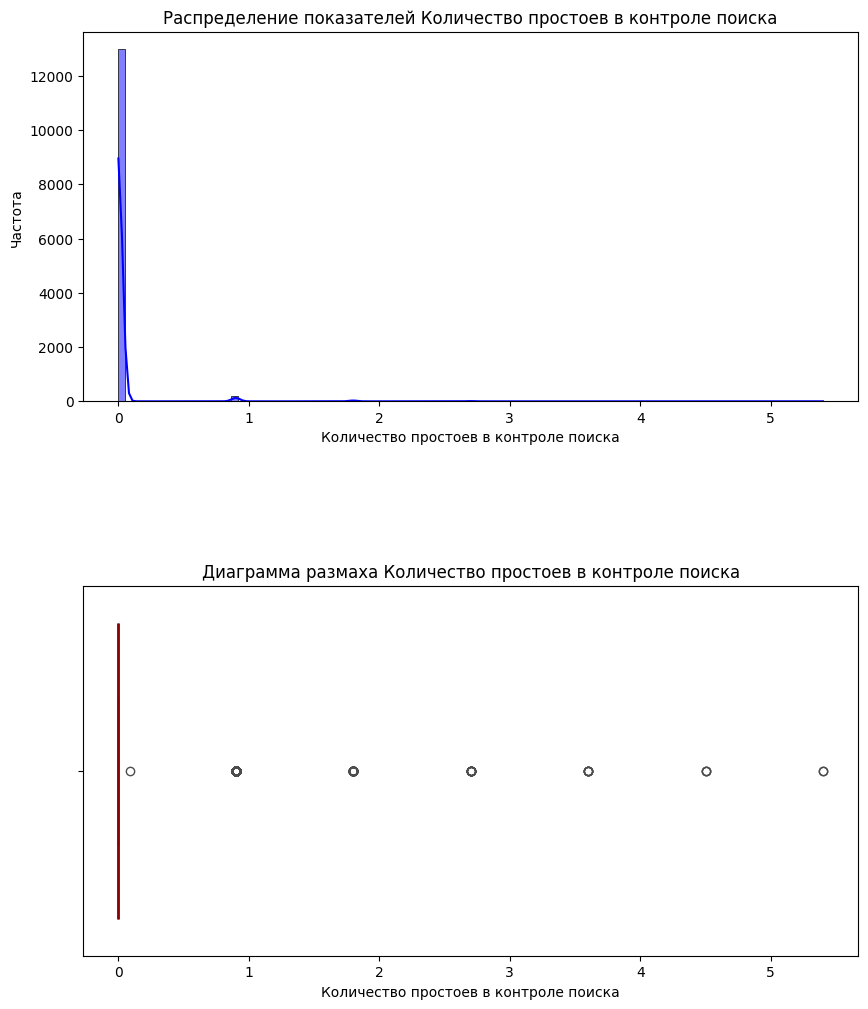

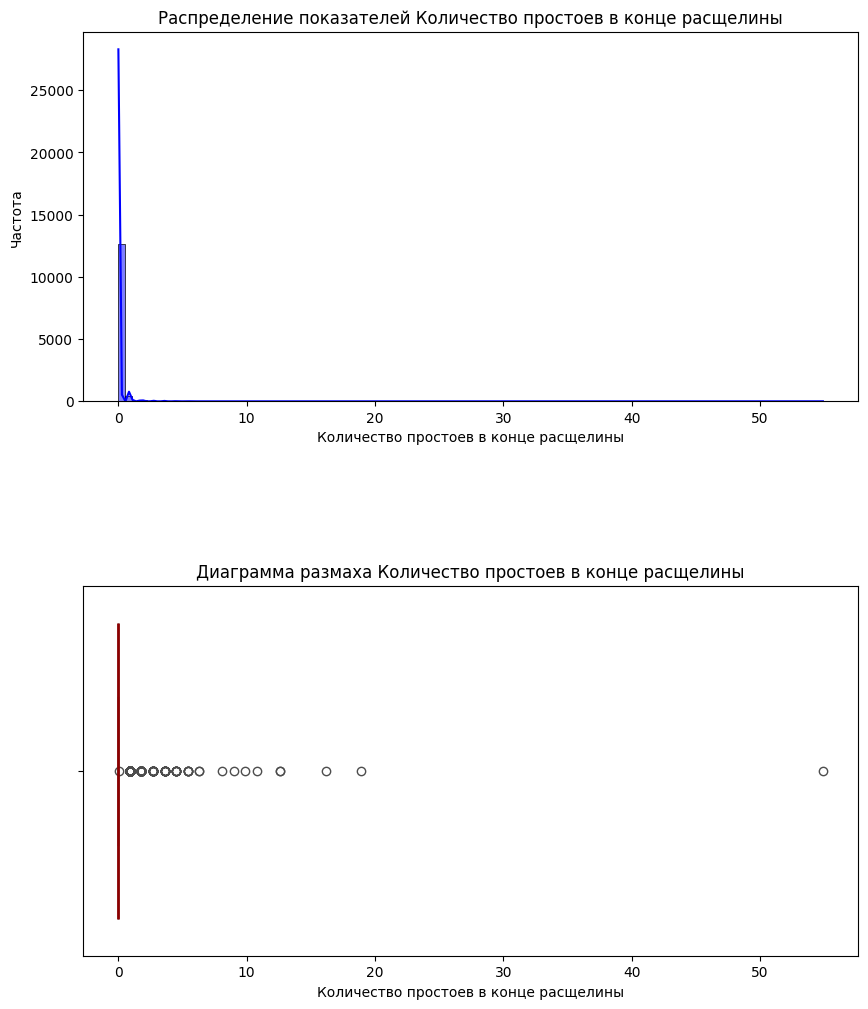

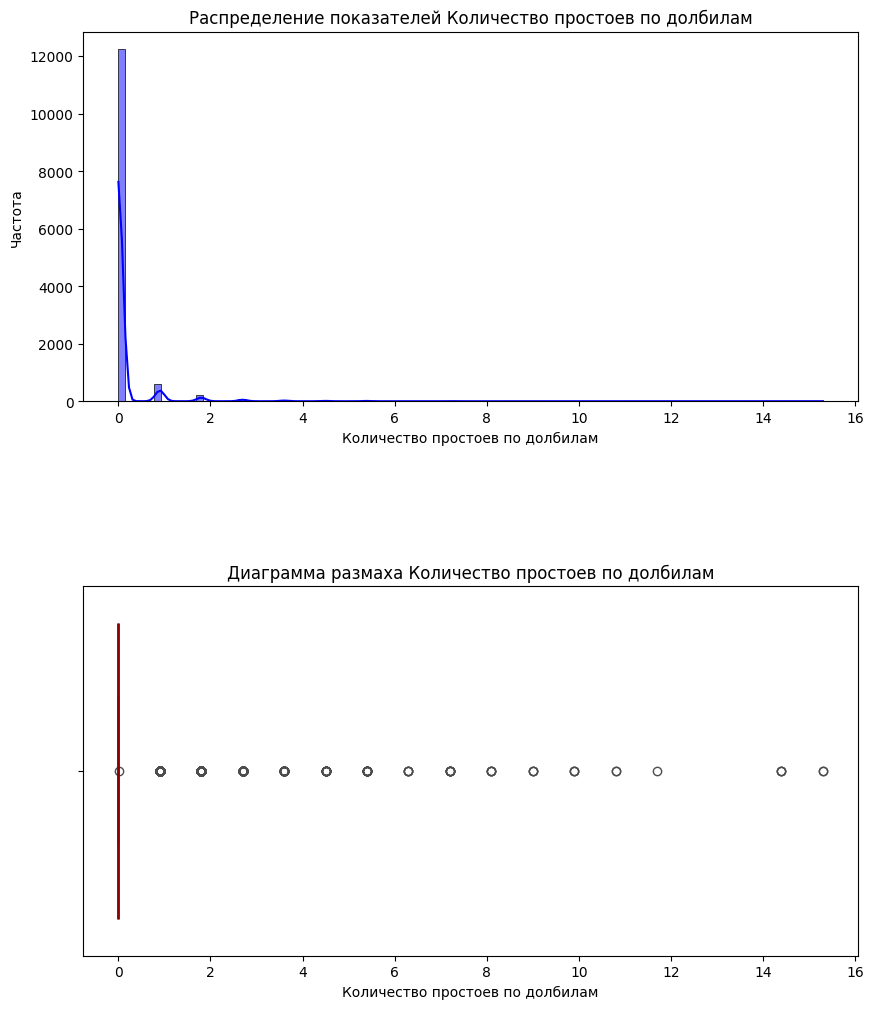

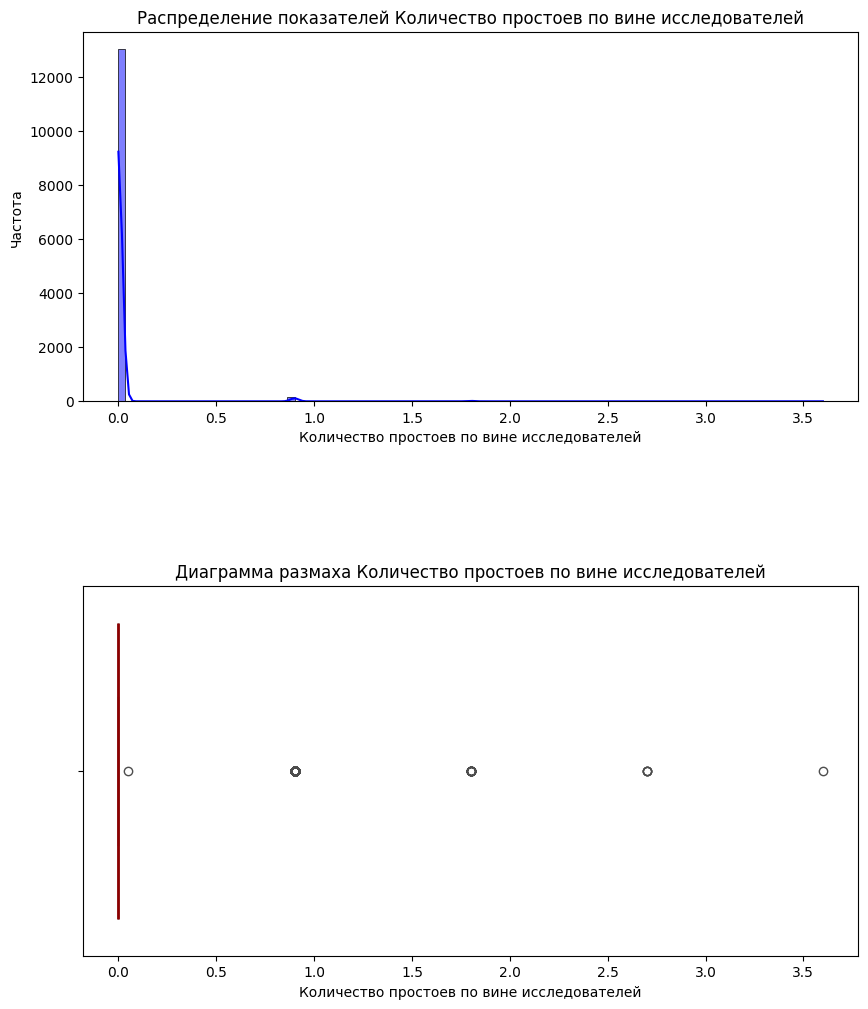

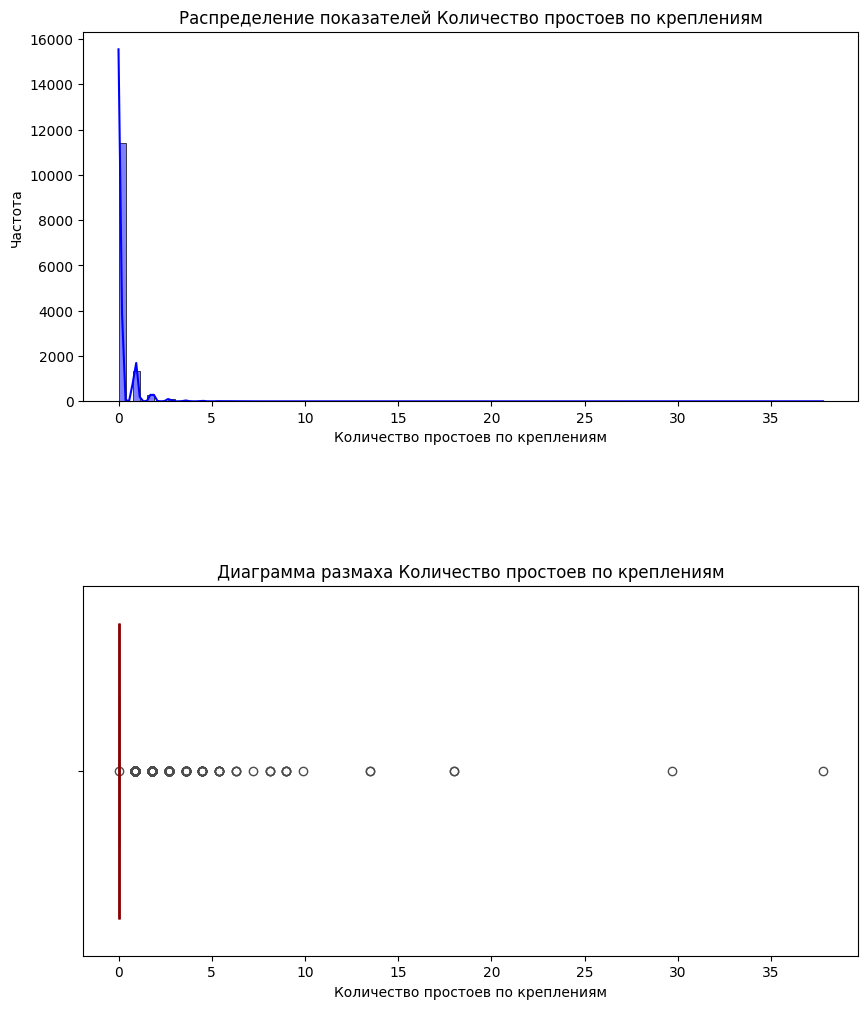

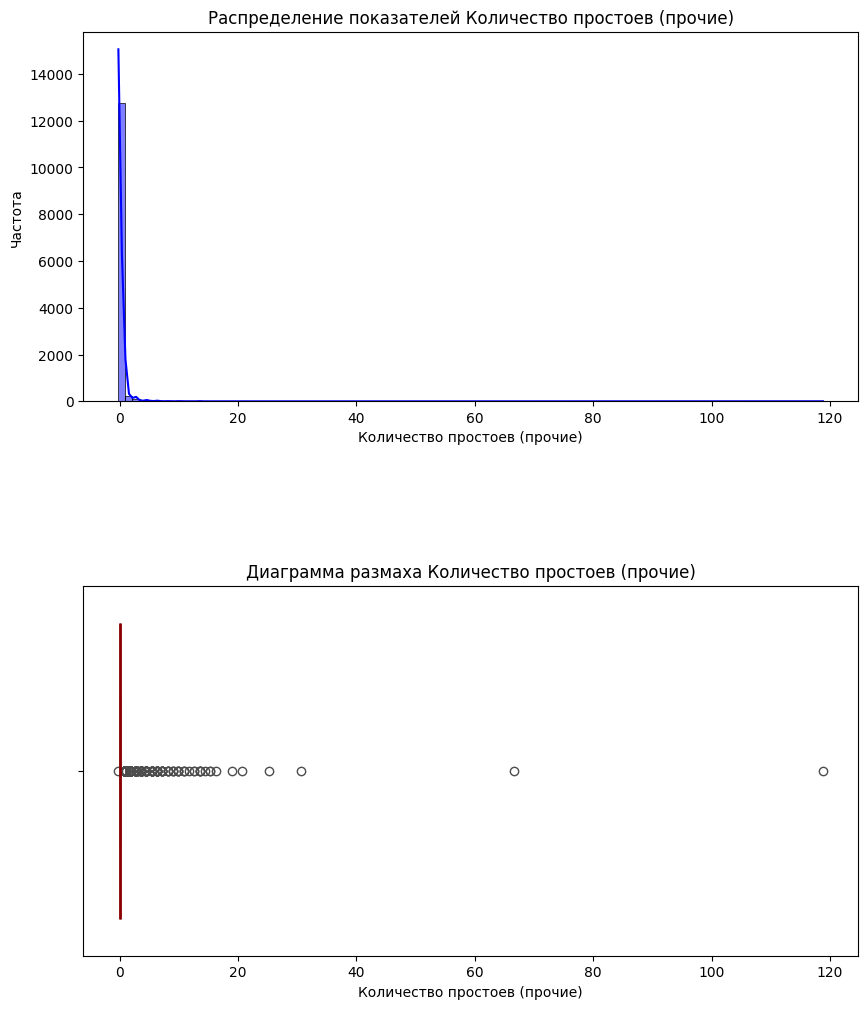

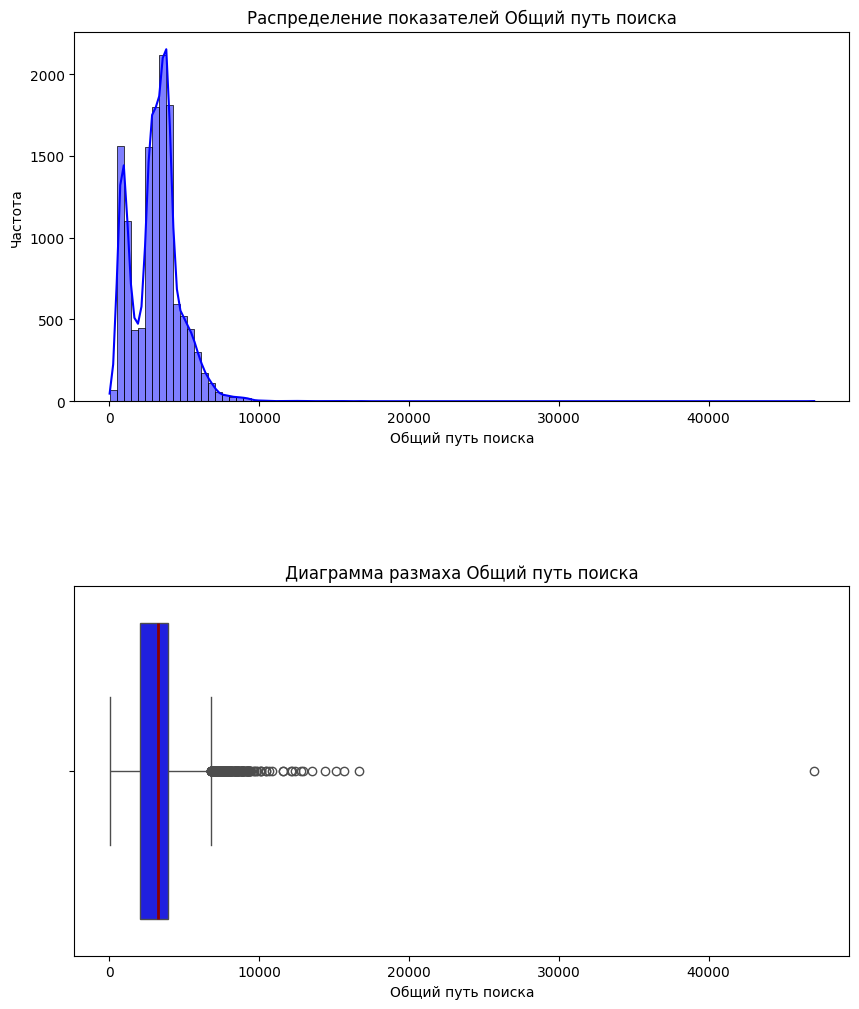

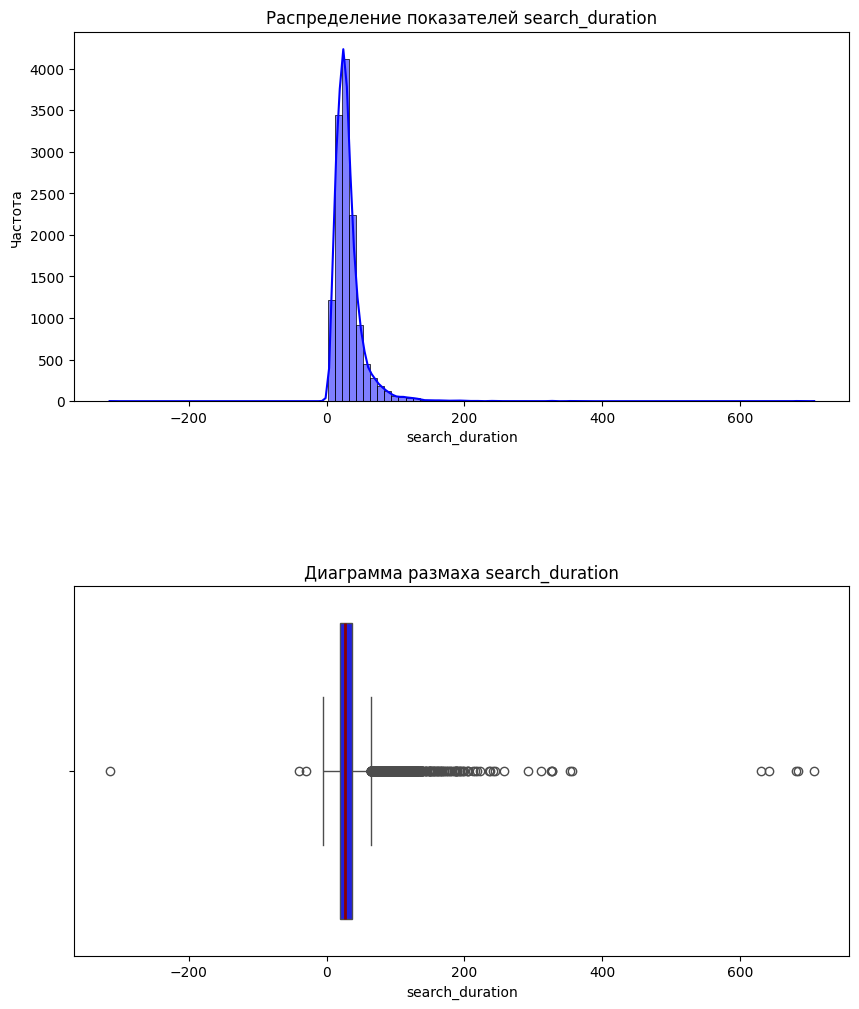

In [ ]:
researchvis_num_features(df, data_num_cols[8:], 'blue')

Теперь изучим количественные признаки простоев по разным причинам, авариям и осложнениям. В этих признаках кроется скорее логическая проблема, чем эмпирическая. Число происшествий по поисковым операциям в реальных условиях можно узнать только после окончания исследования, а main task по этому кейсу заключается в предсказании сроков поиска. Значит исследование не завершено и додлинно неизвестно количество простоев заранее. Это же касается общего пути поиска, заблаговременно мы о нём не знаем.

In [ ]:
df.describe().T

count  \
Наименование расщелины                      13227.0   
Количество труб                             13227.0   
Количество дополнительных отвилков          13227.0   
Количество пилотных отвилков                13227.0   
Глубина по отвилку                          13227.0   
Глубина первого отвилка                     13227.0   
Путь поиска в первом отвилке                13227.0   
Общее время поиска                          13227.0   
Общее время активного поиска                13227.0   
Общее время простоев                        13227.0   
Количество аварий                           13227.0   
Количество брака                            13227.0   
Количество геологических осложнений         13227.0   
Количество осложнений                       13227.0   
Количество простоев по метеоусловиям        13227.0   
Количество простоев                         13227.0   
Количество ремонтов                         13227.0   
Количество простоев без виновника           13227.0   
Количество простоев по вине королевства     13227.0   
Количество простоев в поиске                13227.0   
Количество простоев в наклонном поиске      13227.0   
Количество простоев по зельям               13227.0   
Количество простоев в контроле поиска       13227.0   
Количество простоев в конце расщелины       13227.0   
Количество простоев по долбилам             13227.0   
Количество простоев по вине исследователей  13227.0   
Количество простоев по креплениям           13227.0   
Количество простоев (прочие)                13227.0   
Общий путь поиска                           13227.0   
Дата начала поиска                            13227   
Дата окончания поиска                         13227   
search_duration                             13227.0   

                                                                     mean  \
Наименование расщелины                                        4987.136161   
Количество труб                                                  2.640395   
Количество дополнительных отвилков                               0.552204   
Количество пилотных отвилков                                     0.337416   
Глубина по отвилку                                            3166.293233   
Глубина первого отвилка                                        146.788285   
Путь поиска в первом отвилке                                   199.080362   
Общее время поиска                                              27.985566   
Общее время активного поиска                                    23.862131   
Общее время простоев                                             4.947838   
Количество аварий                                                0.493173   
Количество брака                                                 1.069766   
Количество геологических осложнений                              0.443502   
Количество осложнений                                             0.29306   
Количество простоев по метеоусловиям                             0.151123   
Количество простоев                                              3.506986   
Количество ремонтов                                              4.724541   
Количество простоев без виновника                                0.634366   
Количество простоев по вине королевства                           0.00034   
Количество простоев в поиске                                     7.263858   
Количество простоев в наклонном поиске                           0.892688   
Количество простоев по зельям                                    0.399719   
Количество простоев в контроле поиска                            0.024706   
Количество простоев в конце расщелины                            0.067979   
Количество простоев по долбилам                                  0.129282   
Количество простоев по вине исследователей                       0.015109   
Количество простоев по креплениям                                0.182558   
Количество простоев (прочие)                                     0.191387 

#Обработка аномалий и выбросов

Общее время простоев. Смущают отрицательные занчения признаке, всё же речь идет про время, хоть мы и не знаем точно в каких единицах исчисляетя время. Всего таких случаев 97. Их менее 1%, поэтому лучше поменяем знак, тем более, что отрицательные значения не имеют большого разброса относительно второго квантиля.

In [ ]:
df['Общий путь поиска'][df['Общий путь поиска'] > 20000] = df['Общий путь поиска'][df['Общий путь поиска'] > 20000] / 10

<ipython-input-47-2b0f35215a3f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Общий путь поиска'][df['Общий путь поиска'] > 20000] = df['Общий путь поиска'][df['Общий путь поиска'] > 20000] / 10


In [ ]:
df[df['Количество простоев (прочие)'] > 60]

Наименование королевства Наименование земли Наименование хребта  \
793                   Темерия     КрайняяПустошь                 630   
3393                  Редания             Балейк                2142   

      Наименование расщелины   Цель   Тип расщелины Категория расщелины  \
793                     6139  поиск  горизонтальная           Поисковая   
3393                    1614  поиск       наклонная           Поисковая   

     Назначение расщелины                                            Участки  \
793                   NaN  верхнее укрепление+верхнее укрепление+среднее ...   
3393          Око Дракона        верхнее укрепление+среднее укрепление+пилот   

      Тип отвилка  ... Количество простоев в контроле поиска  \
793   Материнский  ...                                   0.0   
3393  Материнский  ...                                   0.0   

     Количество простоев в конце расщелины Количество простоев по долбилам  \
793                                    0.0                             0.0   
3393                                   0.0                             0.0   

     Количество простоев по вине исследователей  \
793                                         0.0   
3393                                        0.0   

     Количество простоев по креплениям Количество простоев (прочие)  \
793                                0.0                         66.6   
3393                               0.0                        118.8   

     Общий путь поиска  Дата начала поиска Дата окончания поиска  \
793             5656.5 2163-08-08 12:00:17   2163-08-27 17:30:17   
3393            3519.0 2166-02-25 12:00:17   2166-05-18 00:00:17   

     search_duration  
793               19  
3393              81  

[2 rows x 54 columns]

In [ ]:
df['Количество простоев (прочие)'][df['Количество простоев (прочие)'] > 60] = df['Количество простоев (прочие)'][df['Количество простоев (прочие)'] > 60] / 10

<ipython-input-49-8c9e6d794714>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Количество простоев (прочие)'][df['Количество простоев (прочие)'] > 60] = df['Количество простоев (прочие)'][df['Количество простоев (прочие)'] > 60] / 10


In [ ]:
df[df['Количество простоев в поиске'] > 125]

Наименование королевства Наименование земли Наименование хребта  \
2276                    Кэдвен            Приобия                 926   
2821                   Редания         НовыйЗарин                1047   
4541                Зеррикания         МессВосток               10529   
4974                   Редания          Балалейка                1327   
11114                  Темерия             Вингар                 846   
11930               Зеррикания             Мессоя                 236   
12455                 Скеллиге             Чаянда             321-677   

       Наименование расщелины      Цель   Тип расщелины Категория расщелины  \
2276                     4620     поиск  горизонтальная           Поисковая   
2821                     1893  разведка    вертикальная  Поисково-оценочная   
4541                     7755  разведка    вертикальная  Поисково-оценочная   
4974                     3836  разведка    вертикальная         Разведочная   
11114                    4741     поиск  горизонтальная           Поисковая   
11930                    5260  разведка    вертикальная  Поисково-оценочная   
12455                    9779     поиск    многощельная           Поисковая   

      Назначение расщелины                                            Участки  \
2276           Око Дракона  верхнее укрепление+среднее укрепление+основное...   
2821                   NaN                                                      
4541                   NaN  верхнее укрепление+среднее укрепление+пилот+ос...   
4974                   NaN                                                      
11114          Око Дракона                                                      
11930          Око Дракона        верхнее укрепление+среднее укрепление+пилот   
12455          Око Дракона  верхнее укрепление+среднее укрепление+основное...   

                                 Тип отвилка  ...  \
2276                          Дополнительный  ...   
2821                                          ...   
4541                             Материнский  ...   
4974                                          ...   
11114                            Материнский  ...   
11930                            Материнский  ...   
12455  Дополнительный; Материнский; Пилотный  ...   

      Количество простоев в контроле поиска  \
2276                                    0.0   
2821                                    0.0   
4541                                    0.0   
4974                                    0.0   
11114                                   0.0   
11930                                   0.0   
12455                                   0.0   

      Количество простоев в конце расщелины Количество простоев по долбилам  \
2276                                    0.0                             0.0   
2821                                    0.0                             0.0   
4541                                    0.0                             0.0   
4974                                    0.0                             0.0   
11114                                   0.0                             2.7   
11930                                   0.0                             0.9   
12455                                   0.0                             9.9   

      Количество простоев по вине исследователей  \
2276                                         0.0   
2821                                         0.0   
4541                                         0.0   
4974                                         0.0   
11114                                        0.0   
11930                                        0.0   
12455                                        0.0   

      Количество простоев по креплениям Количество простоев (прочие)  \
2276                                0.0                          0.0   
2821                                0.0                          8.1   
4541                                0.0                          3.6   

Если изучить статистические показатели по количеству простоев в поиске выяснится, что и кол-во простоев и кол-во ремонтов, да и общее время простов в некоторых случаях высоко. Однако и хребты и расщелины разные, и судя по имеющимся данным кол-во простоев в поиске оправдано. Поэтому пока выбросы не убираем.

In [ ]:
df[df['search_duration'] > 500]

Наименование королевства Наименование земли Наименование хребта  \
729                   Темерия             Вингар                1171   
9298                  Темерия             Вингах                4009   
9339                  Темерия             Вингах                4009   
9375                  Темерия             Вингах                4009   
9865                   Бругге             Ачимор                 447   

      Наименование расщелины             Цель   Тип расщелины  \
729                     5693  боковой отвилок  горизонтальная   
9298                    9925            поиск  горизонтальная   
9339                    5081            поиск  горизонтальная   
9375                     634            поиск  горизонтальная   
9865                    8663            поиск  горизонтальная   

     Категория расщелины Назначение расщелины  \
729            Поисковая                  NaN   
9298           Поисковая          Око Дракона   
9339           Поисковая          Око Дракона   
9375           Поисковая          Око Дракона   
9865           Поисковая          Око Дракона   

                                                Участки  \
729                            тупик+верхнее укрепление   
9298                           среднее укрепление+пилот   
9339  верхнее укрепление+среднее укрепление+основное...   
9375  верхнее укрепление+среднее укрепление+основное...   
9865  верхнее укрепление+среднее укрепление+основное...   

                  Тип отвилка  ... Количество простоев в контроле поиска  \
729   Боковой; Дополнительный  ...                                   0.0   
9298              Материнский  ...                                   0.0   
9339              Материнский  ...                                   0.0   
9375              Материнский  ...                                   0.0   
9865    Материнский; Пилотный  ...                                   0.0   

     Количество простоев в конце расщелины Количество простоев по долбилам  \
729                                    0.0                             1.8   
9298                                   0.0                             0.0   
9339                                   0.0                             0.0   
9375                                   0.0                             0.0   
9865                                   0.0                             0.0   

     Количество простоев по вине исследователей  \
729                                         0.0   
9298                                        0.0   
9339                                        0.0   
9375                                        0.0   
9865                                        0.0   

     Количество простоев по креплениям Количество простоев (прочие)  \
729                                0.0                          0.0   
9298                               0.0                          0.0   
9339                               0.0                          0.0   
9375                               0.0                          0.0   
9865                               0.0                          0.0   

     Общий путь поиска  Дата начала поиска Дата окончания поиска  \
729             5886.9 2161-12-17 23:01:17   2163-11-03 00:00:17   
9298            3525.3 2168-12-25 11:00:17   2170-11-07 13:00:17   
9339            3347.1 2169-02-16 23:00:17   2170-11-21 01:00:17   
9375            3674.7 2169-03-10 01:30:17   2170-12-01 11:00:17   
9865            8457.3 2169-05-26 18:00:17   2171-05-04 20:00:17   

     search_duration  
729              685  
9298             682  
9339             642  
9375             631  
9865             708  

[5 rows x 54 columns]

In [ ]:
df[df['search_duration'] > 500].describe().T

count  \
Наименование расщелины                       5.0   
Количество труб                              5.0   
Количество дополнительных отвилков           5.0   
Количество пилотных отвилков                 5.0   
Глубина по отвилку                           5.0   
Глубина первого отвилка                      5.0   
Путь поиска в первом отвилке                 5.0   
Общее время поиска                           5.0   
Общее время активного поиска                 5.0   
Общее время простоев                         5.0   
Количество аварий                            5.0   
Количество брака                             5.0   
Количество геологических осложнений          5.0   
Количество осложнений                        5.0   
Количество простоев по метеоусловиям         5.0   
Количество простоев                          5.0   
Количество ремонтов                          5.0   
Количество простоев без виновника            5.0   
Количество простоев по вине королевства      5.0   
Количество простоев в поиске                 5.0   
Количество простоев в наклонном поиске       5.0   
Количество простоев по зельям                5.0   
Количество простоев в контроле поиска        5.0   
Количество простоев в конце расщелины        5.0   
Количество простоев по долбилам              5.0   
Количество простоев по вине исследователей   5.0   
Количество простоев по креплениям            5.0   
Количество простоев (прочие)                 5.0   
Общий путь поиска                            5.0   
Дата начала поиска                             5   
Дата окончания поиска                          5   
search_duration                              5.0   

                                                                     mean  \
Наименование расщелины                                             5999.2   
Количество труб                                                      2.34   
Количество дополнительных отвилков                                    0.6   
Количество пилотных отвилков                                          0.6   
Глубина по отвилку                                                3498.66   
Глубина первого отвилка                                            120.06   
Путь поиска в первом отвилке                                       905.58   
Общее время поиска                                                  34.67   
Общее время активного поиска                                       485.52   
Общее время простоев                                                4.782   
Количество аварий                                                    0.54   
Количество брака                                                     5.94   
Количество геологических осложнений                                   0.0   
Количество осложнений                                                 0.0   
Количество простоев по метеоусловиям                                 0.18   
Количество простоев                                                   8.1   
Количество ремонтов                                                 11.16   
Количество простоев без виновника                                   12.78   
Количество простоев по вине королевства                               0.0   
Количество простоев в поиске                                         7.56   
Количество простоев в наклонном поиске                               0.54   
Количество простоев по зельям                                        0.18   
Количество простоев в контроле поиска                                 0.0   
Количество простоев в конце расщелины                                 0.0   
Количество простоев по долбилам                                      0.36   
Количество простоев по вине исследователей                            0.0   
Количество простоев по креплениям                                     0.0   
Количество простоев (прочие)                                          0.0   
Общий путь поиска                                                 4978.26   
Дата начала поис

Несмотря на длительность поисков, которая составила около 2 лет, показатели по самим признака экстремальными не являются, все они в пределах нормы, а королевства, в которых велись поиски наиболее популярны в датасете. Можно справедливо полагать, что перед нами выброс, скорее всего завершение поисков по этим расщелинам не подтвердили и дата была поставлена постфактум.

In [ ]:
df = df[df['search_duration'] < 500]

In [ ]:
df[df['Общее время простоев'] > 95].describe().T

count  \
Наименование расщелины                      17.0   
Количество труб                             17.0   
Количество дополнительных отвилков          17.0   
Количество пилотных отвилков                17.0   
Глубина по отвилку                          17.0   
Глубина первого отвилка                     17.0   
Путь поиска в первом отвилке                17.0   
Общее время поиска                          17.0   
Общее время активного поиска                17.0   
Общее время простоев                        17.0   
Количество аварий                           17.0   
Количество брака                            17.0   
Количество геологических осложнений         17.0   
Количество осложнений                       17.0   
Количество простоев по метеоусловиям        17.0   
Количество простоев                         17.0   
Количество ремонтов                         17.0   
Количество простоев без виновника           17.0   
Количество простоев по вине королевства     17.0   
Количество простоев в поиске                17.0   
Количество простоев в наклонном поиске      17.0   
Количество простоев по зельям               17.0   
Количество простоев в контроле поиска       17.0   
Количество простоев в конце расщелины       17.0   
Количество простоев по долбилам             17.0   
Количество простоев по вине исследователей  17.0   
Количество простоев по креплениям           17.0   
Количество простоев (прочие)                17.0   
Общий путь поиска                           17.0   
Дата начала поиска                            17   
Дата окончания поиска                         17   
search_duration                             17.0   

                                                                     mean  \
Наименование расщелины                                        5752.470588   
Количество труб                                                  2.382353   
Количество дополнительных отвилков                               0.411765   
Количество пилотных отвилков                                     0.705882   
Глубина по отвилку                                            3054.732943   
Глубина первого отвилка                                        479.911765   
Путь поиска в первом отвилке                                   691.252941   
Общее время поиска                                             165.663529   
Общее время активного поиска                                    53.645882   
Общее время простоев                                           130.787647   
Количество аварий                                                9.582353   
Количество брака                                                12.441176   
Количество геологических осложнений                             10.005882   
Количество осложнений                                            0.529412   
Количество простоев по метеоусловиям                             0.423529   
Количество простоев                                             30.758824   
Количество ремонтов                                             31.658824   
Количество простоев без виновника                                1.323529   
Количество простоев по вине королевства                               0.0   
Количество простоев в поиске                                    58.552941   
Количество простоев в наклонном поиске                           2.858824   
Количество простоев по зельям                                    1.482353   
Количество простоев в контроле поиска                            0.052941   
Количество простоев в конце расщелины                            0.741176   
Количество простоев по долбилам                                  1.535294   
Количество простоев по вине исследователей                       0.317647   
Количество простоев по креплениям                                0.423529   
Количество простоев (прочие)                                     1.429412   
Общий путь поиска                                             4613.037647   
Дата начала поис

In [ ]:
df = df[df['Общее время простоев'] < 120]

Рассмотрим признак Общее время простоев. Первые пробелы начинаются после значения 100. Как ни странно значения по кол-ву простоев в норме у большинства таких признаков в норме. Только в нескольких случаях количество ремнтов и количество простоев в поиске является экстремальным и явным выбросом. Лучше избавиться от этих значений, их всего 17, а на общее время простоев они влияют в значительной степени. Также учтем, что был произведен отказ от количественных признаков связанных с человеческим фактором, а без этих признаков модель часто будет занижать сроки поиска, т.е целевой признак.

In [ ]:
df['search_duration'][df['search_duration'] < 0] = df['search_duration'][df['search_duration'] < 0] * (-1)
df['search_duration'][df['search_duration'] < 0]

Series([], Name: search_duration, dtype: int64)

In [ ]:
df[data_num_cols].describe().T

count         mean          std  \
Количество труб                             13214.0     2.640472     1.020566   
Количество дополнительных отвилков          13214.0     0.551990     1.472773   
Количество пилотных отвилков                13214.0     0.337067     0.818535   
Глубина по отвилку                          13214.0  3166.124821   640.445005   
Глубина первого отвилка                     13214.0   146.542088   488.235278   
Путь поиска в первом отвилке                13214.0   198.603091   615.465065   
Общее время поиска                          13214.0    27.884187    17.907866   
Общее время активного поиска                13214.0    23.670453    13.497246   
Общее время простоев                        13214.0     4.855673     9.027502   
Количество аварий                           13214.0     0.490117     4.055733   
Количество брака                            13214.0     1.064008     2.850625   
Количество геологических осложнений         13214.0     0.443325     8.390477   
Количество осложнений                       13214.0     0.292735     2.027439   
Количество простоев по метеоусловиям        13214.0     0.150863     0.640200   
Количество простоев                         13214.0     3.490820     6.501150   
Количество ремонтов                         13214.0     4.705827     7.009452   
Количество простоев без виновника           13214.0     0.629882     3.877079   
Количество простоев по вине королевства     13214.0     0.000341     0.023486   
Количество простоев в поиске                13214.0     7.230547    12.053873   
Количество простоев в наклонном поиске      13214.0     0.891932     2.037139   
Количество простоев по зельям               13214.0     0.398818     1.350710   
Количество простоев в контроле поиска       13214.0     0.024663     0.208346   
Количество простоев в конце расщелины       13214.0     0.067161     0.646997   
Количество простоев по долбилам             13214.0     0.128456     0.650606   
Количество простоев по вине исследователей  13214.0     0.014852     0.133886   
Количество простоев по креплениям           13214.0     0.182465     0.739056   
Количество простоев (прочие)                13214.0     0.177994     0.873671   
Общий путь поиска                           13214.0  3122.080822  1591.877894   
search_duration                             13214.0    31.498184    21.702117   

                                                  min       25%          50%  \
Количество труб                              0.900000     2.700     2.700000   
Количество дополнительных отвилков           0.000000     0.000     0.000000   
Количество пилотных отвилков                 0.000000     0.000     0.000000   
Глубина по отвилку                           0.000000  2762.325  3166.122374   
Глубина первого отвилка                      0.000000     0.000     0.000000   
Путь поиска в первом отвилке                 0.000000     0.000     0.000000   
Общее время поиска                           0.330000    17.325    24.210000   
Общее время активного поиска                 0.300000    15.940    21.410000   
Общее время простоев                       -13.350782     0.490     1.870000   
Количество аварий                            0.000000     0.000     0.000000   
Количество брака                             0.000000     0.000     0.000000   
Количество геологических осложнений          0.000000     0.000     0.000000   
Количество осложнений                        0.000000     0.000     0.000000   
Количество простоев по метеоусловиям         0.000000     0.000     0.000000   
Количество простоев                          0.000000     0.000     0.900000   
Количество ремонтов                          0.000000     0.900     2.700000   
Количество простоев без виновника           -4.445809     0.000     0.000000   
Количество простоев по вине королевства      0.000000     0.000     0.000000   
Количество простоев в поиске                 0.000000     0.900     3.600000   
Количество прос

Общее время поиска Общее время активного поиска Количество простоев по вине королевства Количество простоев по зельям Количество простоев по вине исследователей Количество простоев по креплениям

In [ ]:
df.groupby('Наименование расщелины')['Общий путь поиска'].mean().sort_values(ascending=False)

Наименование расщелины
1910    12208.185
6310    12153.600
2611    11603.700
4192    10869.300
9563     9854.100
          ...    
1594      499.500
7838      391.500
1847      387.000
871       348.300
5907       52.200
Name: Общий путь поиска, Length: 4910, dtype: float64

In [ ]:
df[df['Количество геологических осложнений'] > 100]

Наименование королевства Наименование земли Наименование хребта  \
1898                  Редания     ФилатовыйЦарич                 А14   
1934                  Редания     ФилатовыйЦарич                2377   
1947                  Редания     ФилатовыйЦарич                2703   
1972                  Редания     ФилатовыйЦарич                7079   
2134                  Редания     ФилатовыйЦарич                8549   
2423                  Редания     ФилатовыйЦарич               1078Н   
2712                   Кэдвен            Приобия                1306   
2800                  Редания     ФилатовыйЦарич                8510   
3606                  Редания     ФилатовыйЦарич             721А.11   

      Наименование расщелины   Цель   Тип расщелины Категория расщелины  \
1898                    3842  поиск       наклонная           Поисковая   
1934                     784  поиск  горизонтальная           Поисковая   
1947                    5199  поиск  горизонтальная           Поисковая   
1972                    3168  поиск  горизонтальная           Поисковая   
2134                    1722  поиск  горизонтальная           Поисковая   
2423                    7084  поиск  горизонтальная           Поисковая   
2712                    9270  поиск  горизонтальная           Поисковая   
2800                    1051  поиск       наклонная           Поисковая   
3606                    4968  поиск  горизонтальная           Поисковая   

     Назначение расщелины                                            Участки  \
1898                  NaN        верхнее укрепление+среднее укрепление+пилот   
1934                  NaN  верхнее укрепление+среднее укрепление+пилот+ос...   
1947                  NaN        верхнее укрепление+среднее укрепление+пилот   
1972                  NaN  верхнее укрепление+среднее укрепление+пилот+ос...   
2134                  NaN  верхнее укрепление+среднее укрепление+пилот+ос...   
2423                  NaN       среднее укрепление+пилот+основное укрепление   
2712          Око Дракона  верхнее укрепление+среднее укрепление+основное...   
2800                  NaN  верхнее укрепление+среднее укрепление+основное...   
3606          Око Дракона  верхнее укрепление+среднее укрепление+пилот+ос...   

                Тип отвилка  ... Количество простоев в контроле поиска  \
1898            Материнский  ...                                   0.0   
1934            Материнский  ...                                   0.0   
1947            Материнский  ...                                   0.0   
1972  Материнский; Пилотный  ...                                   0.0   
2134            Материнский  ...                                   0.0   
2423  Материнский; Пилотный  ...                                   0.0   
2712            Материнский  ...                                   0.0   
2800            Материнский  ...                                   0.0   
3606            Материнский  ...                                   0.0   

     Количество простоев в конце расщелины Количество простоев по долбилам  \
1898                                   0.0                             5.4   
1934                                   0.0                             0.9   
1947                                   0.0                             0.9   
1972                                   0.0                             0.9   
2134                                   0.0                             0.0   
2423                                   0.0                             5.4   
2712                                   0.0                             5.4   
2800                                   0.0                            15.3   
3606                                   0.0                             0.9   

     Количество простоев по вине исследователей  \
1898                                        0.0   
1934                                        0.0   
1947                                        0.0   
1972  

In [ ]:
df = df[df['Количество геологических осложнений'] < 100]

Подозрительные выбросы по количеству геологических осложнений. Наибольшее кол-во осложнений произошло в Редании в регионе ФилатовыйЦарич, всего их 8. На этой земле было проведено не так много исследований в целом? всего 127, однако почти все экстремальные имеют аналогичную характеристику участков и схожую дистанцию по общему пути, несмотря на разные хребты и расщелины. Схожая картина наблюдается только в регионе приобия. Однако в остальных случаях разрывов между данными нет, это выбросы и они подлежат удалению.

In [ ]:
df[df['Количество аварий'] > 50]

Наименование королевства Наименование земли Наименование хребта  \
64                     Темерия             Вингах                8150   
247                    Темерия             Вингах                 432   
276                    Темерия             Вингар                 964   
606                    Темерия     КрайняяПустошь                 926   
1087                   Темерия    ЗападныйЧатыльк                4883   
1159                    Кэдвен            Приобия                4061   
1171                    Кэдвен             Киньям                8717   
1455                   Темерия              Ярайн                 А14   
1637                   Редания              Кувай                 А14   
1751                   Редания     ФилатовыйЦарич                 250   
1850                   Редания            Капинор                 434   
2276                    Кэдвен            Приобия                 926   
11114                  Темерия             Вингар                 846   

       Наименование расщелины             Цель   Тип расщелины  \
64                       1386            поиск  горизонтальная   
247                      3459  боковой отвилок       наклонная   
276                      3065            поиск  горизонтальная   
606                       101  боковой отвилок  горизонтальная   
1087                      302         разведка    вертикальная   
1159                     2006  боковой отвилок  горизонтальная   
1171                     3784            поиск  горизонтальная   
1455                     1464  боковой отвилок       наклонная   
1637                     5258         разведка    вертикальная   
1751                     7947            поиск  горизонтальная   
1850                     9166            поиск    вертикальная   
2276                     4620            поиск  горизонтальная   
11114                    4741            поиск  горизонтальная   

      Категория расщелины Назначение расщелины  \
64              Поисковая                  NaN   
247             Поисковая                  NaN   
276             Поисковая                  NaN   
606             Поисковая                  NaN   
1087          Разведочная                  NaN   
1159            Поисковая                  NaN   
1171            Поисковая                  NaN   
1455            Поисковая                  NaN   
1637   Поисково-оценочная                  NaN   
1751            Поисковая                  NaN   
1850            Поисковая                  NaN   
2276            Поисковая          Око Дракона   
11114           Поисковая          Око Дракона   

                                                 Участки  \
64     верхнее укрепление+среднее укрепление+пилот+ос...   
247                                                        
276    верхнее укрепление+среднее укрепление+основное...   
606                                                        
1087                                  верхнее укрепление   
1159                                                       
1171                                                       
1455                                               тупик   
1637                                                       
1751   верхнее укрепление+среднее укрепление+пилот+ос...   
1850                                                       
2276   верхнее укрепление+среднее укрепление+основное...   
11114                                                      

                       Тип отвилка  ... Количество простоев в контроле поиска  \
64                     Материнский  ...                                   0.0   
247                        Боковой  ...                                   0.0   
276                    Материнский  ...                                   0.0   
606                        Боковой  ...                                   0.0   
1087                   Материнский  ...                                   0.0   
1159                       Бок

In [ ]:
df = df[df['Количество аварий'] < 50]

In [ ]:
df[df['Количество простоев в конце расщелины'] > 10]

Наименование королевства Наименование земли Наименование хребта  \
2080                   Темерия     КрайняяПустошь                1141   
2386                   Темерия             Вингар                 361   
2394                Зеррикания             Мессоя                1333   
4288                   Темерия              Сутор                 148   
4373                    Кэдвен            Приобия                 358   
12146                   Верден              Совет               15001   

       Наименование расщелины             Цель   Тип расщелины  \
2080                     3055            поиск    многощельная   
2386                     9495            поиск  горизонтальная   
2394                     4747            поиск       наклонная   
4288                     7185  боковой отвилок  горизонтальная   
4373                     1567            поиск  горизонтальная   
12146                    8455            поиск  горизонтальная   

      Категория расщелины Назначение расщелины  \
2080            Поисковая          Око Дракона   
2386            Поисковая          Око Дракона   
2394         Водозаборная                  NaN   
4288            Поисковая                  NaN   
4373            Поисковая          Око Дракона   
12146           Поисковая          Око Дракона   

                                                 Участки  \
2080        среднее укрепление+основное укрепление+тупик   
2386   верхнее укрепление+среднее укрепление+пилот+ос...   
2394   верхнее укрепление+среднее укрепление+основное...   
4288                                               тупик   
4373   верхнее укрепление+среднее укрепление+основное...   
12146  верхнее укрепление+среднее укрепление+среднее ...   

                 Тип отвилка  ... Количество простоев в контроле поиска  \
2080          Дополнительный  ...                                   0.0   
2386             Материнский  ...                                   0.0   
2394             Материнский  ...                                   0.0   
4288                 Боковой  ...                                   0.0   
4373   Материнский; Пилотный  ...                                   0.0   
12146            Материнский  ...                                   0.0   

      Количество простоев в конце расщелины Количество простоев по долбилам  \
2080                                   18.9                             0.0   
2386                                   12.6                             0.0   
2394                                   16.2                             0.0   
4288                                   54.9                             0.0   
4373                                   12.6                             0.0   
12146                                  10.8                             0.0   

      Количество простоев по вине исследователей  \
2080                                         0.0   
2386                                         0.0   
2394                                         0.0   
4288                                         0.0   
4373                                         0.0   
12146                                        0.0   

      Количество простоев по креплениям Количество простоев (прочие)  \
2080                                0.0                          0.0   
2386                                0.0                          0.0   
2394                                0.9                          0.0   
4288                                0.0                          0.0   
4373                                0.0                          0.0   
12146                               0.0                          0.0   

      Общий путь поиска  Дата начала поиска Дата окончания поиска  \
2080             4958.1 2164-11-29 11:00:17   2165-03-26 21:00:17   
2386             3764.7 2165-05-21 00:30:17   2165-07-03 05:00:17   
2394             1766.7 2165-05-30 11:00:17   2165-07-06 06:00:17   
4288             2079.9 2166-12-0

# Корреляционный анализ признаков

In [ ]:
summary = ['Количество простоев',
       'Количество ремонтов', 'Количество простоев без виновника',
       'Количество простоев в наклонном поиске',
       'Количество простоев в конце расщелины',
       'Количество простоев по долбилам', 'Количество простоев по креплениям', 'Количество простоев по метеоусловиям',
       'Количество простоев (прочие)']

In [ ]:
df['Суммарное_кол-во_простоев'] = df[summary].sum(axis=1)
df['Суммарное_кол-во_простоев'].info()

<class 'pandas.core.series.Series'>
Index: 13192 entries, 0 to 13414
Series name: Суммарное_кол-во_простоев
Non-Null Count  Dtype  
--------------  -----  
13192 non-null  float64
dtypes: float64(1)
memory usage: 206.1 KB


In [ ]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Зима'
    elif month in [3, 4, 5]:
        return 'Весна'
    elif month in [6, 7, 8]:
        return 'Лето'
    else:
        return 'Осень'

df['Время_года'] = df['Дата начала поиска'].dt.month.apply(get_season)

df.head()

Наименование королевства Наименование земли Наименование хребта  \
0                   Кэдвен            Приобия                 684   
1                  Темерия              Сутор                1141   
2                   Кэдвен            Приобия              18А.28   
3                   Кэдвен            Приобия               9А.18   
4                   Кэдвен            Приобия                 627   

   Наименование расщелины   Цель   Тип расщелины Категория расщелины  \
0                    2903  поиск       наклонная      Нагнетательная   
1                    1332  поиск  горизонтальная           Поисковая   
2                    1027  поиск       наклонная           Поисковая   
3                    4208  поиск       наклонная           Поисковая   
4                    9352  поиск       наклонная      Нагнетательная   

     Назначение расщелины                                            Участки  \
0  Магическое воздействие  верхнее укрепление+среднее укрепление+основное...   
1                     NaN  верхнее укрепление+среднее укрепление+основное...   
2                     NaN  верхнее укрепление+среднее укрепление+основное...   
3                     NaN  верхнее укрепление+среднее укрепление+основное...   
4  Магическое воздействие  верхнее укрепление+среднее укрепление+основное...   

   Тип отвилка  ... Количество простоев по долбилам  \
0  Материнский  ...                             0.0   
1  Материнский  ...                             0.0   
2  Материнский  ...                             0.0   
3  Материнский  ...                             0.0   
4  Материнский  ...                             0.0   

  Количество простоев по вине исследователей  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

  Количество простоев по креплениям Количество простоев (прочие)  \
0                               0.0                          0.0   
1                               0.0                          0.0   
2                               0.9                          0.0   
3                               0.0                          0.0   
4                               0.0                          0.0   

  Общий путь поиска  Дата начала поиска Дата окончания поиска search_duration  \
0            2889.0 2162-12-23 15:00:17   2163-01-04 07:00:17              11   
1            5620.5 2162-11-09 00:00:17   2163-01-05 04:30:17              57   
2            2600.1 2162-12-24 23:30:17   2163-01-06 02:30:17              12   
3            2699.1 2162-12-24 12:00:17   2163-01-06 01:00:17              12   
4            3195.0 2162-12-24 12:00:17   2163-01-07 19:00:17              14   

  Суммарное_кол-во_простоев Время_года  
0                       5.4       Зима  
1                      27.0      Осень  
2                      11.7       Зима  
3                       3.6       Зима  
4                       9.0       Зима  

[5 rows x 56 columns]

In [ ]:
remove = ['Общее время поиска', 'Общее время активного поиска', 'Количество простоев по вине королевства', 'Количество простоев по зельям', 'Количество простоев по вине исследователей',
         'Количество простоев в контроле поиска', 'Количество простоев в поиске', 'Количество простоев в конце расщелины']
data_num_cols_new = data_num_cols.drop(remove)
data_num_cols_new

Index(['Количество труб', 'Количество дополнительных отвилков',
       'Количество пилотных отвилков', 'Глубина по отвилку',
       'Глубина первого отвилка', 'Путь поиска в первом отвилке',
       'Общее время простоев', 'Количество аварий', 'Количество брака',
       'Количество геологических осложнений', 'Количество осложнений',
       'Количество простоев по метеоусловиям', 'Количество простоев',
       'Количество ремонтов', 'Количество простоев без виновника',
       'Количество простоев в наклонном поиске',
       'Количество простоев по долбилам', 'Количество простоев по креплениям',
       'Количество простоев (прочие)', 'Общий путь поиска', 'search_duration'],
      dtype='object')

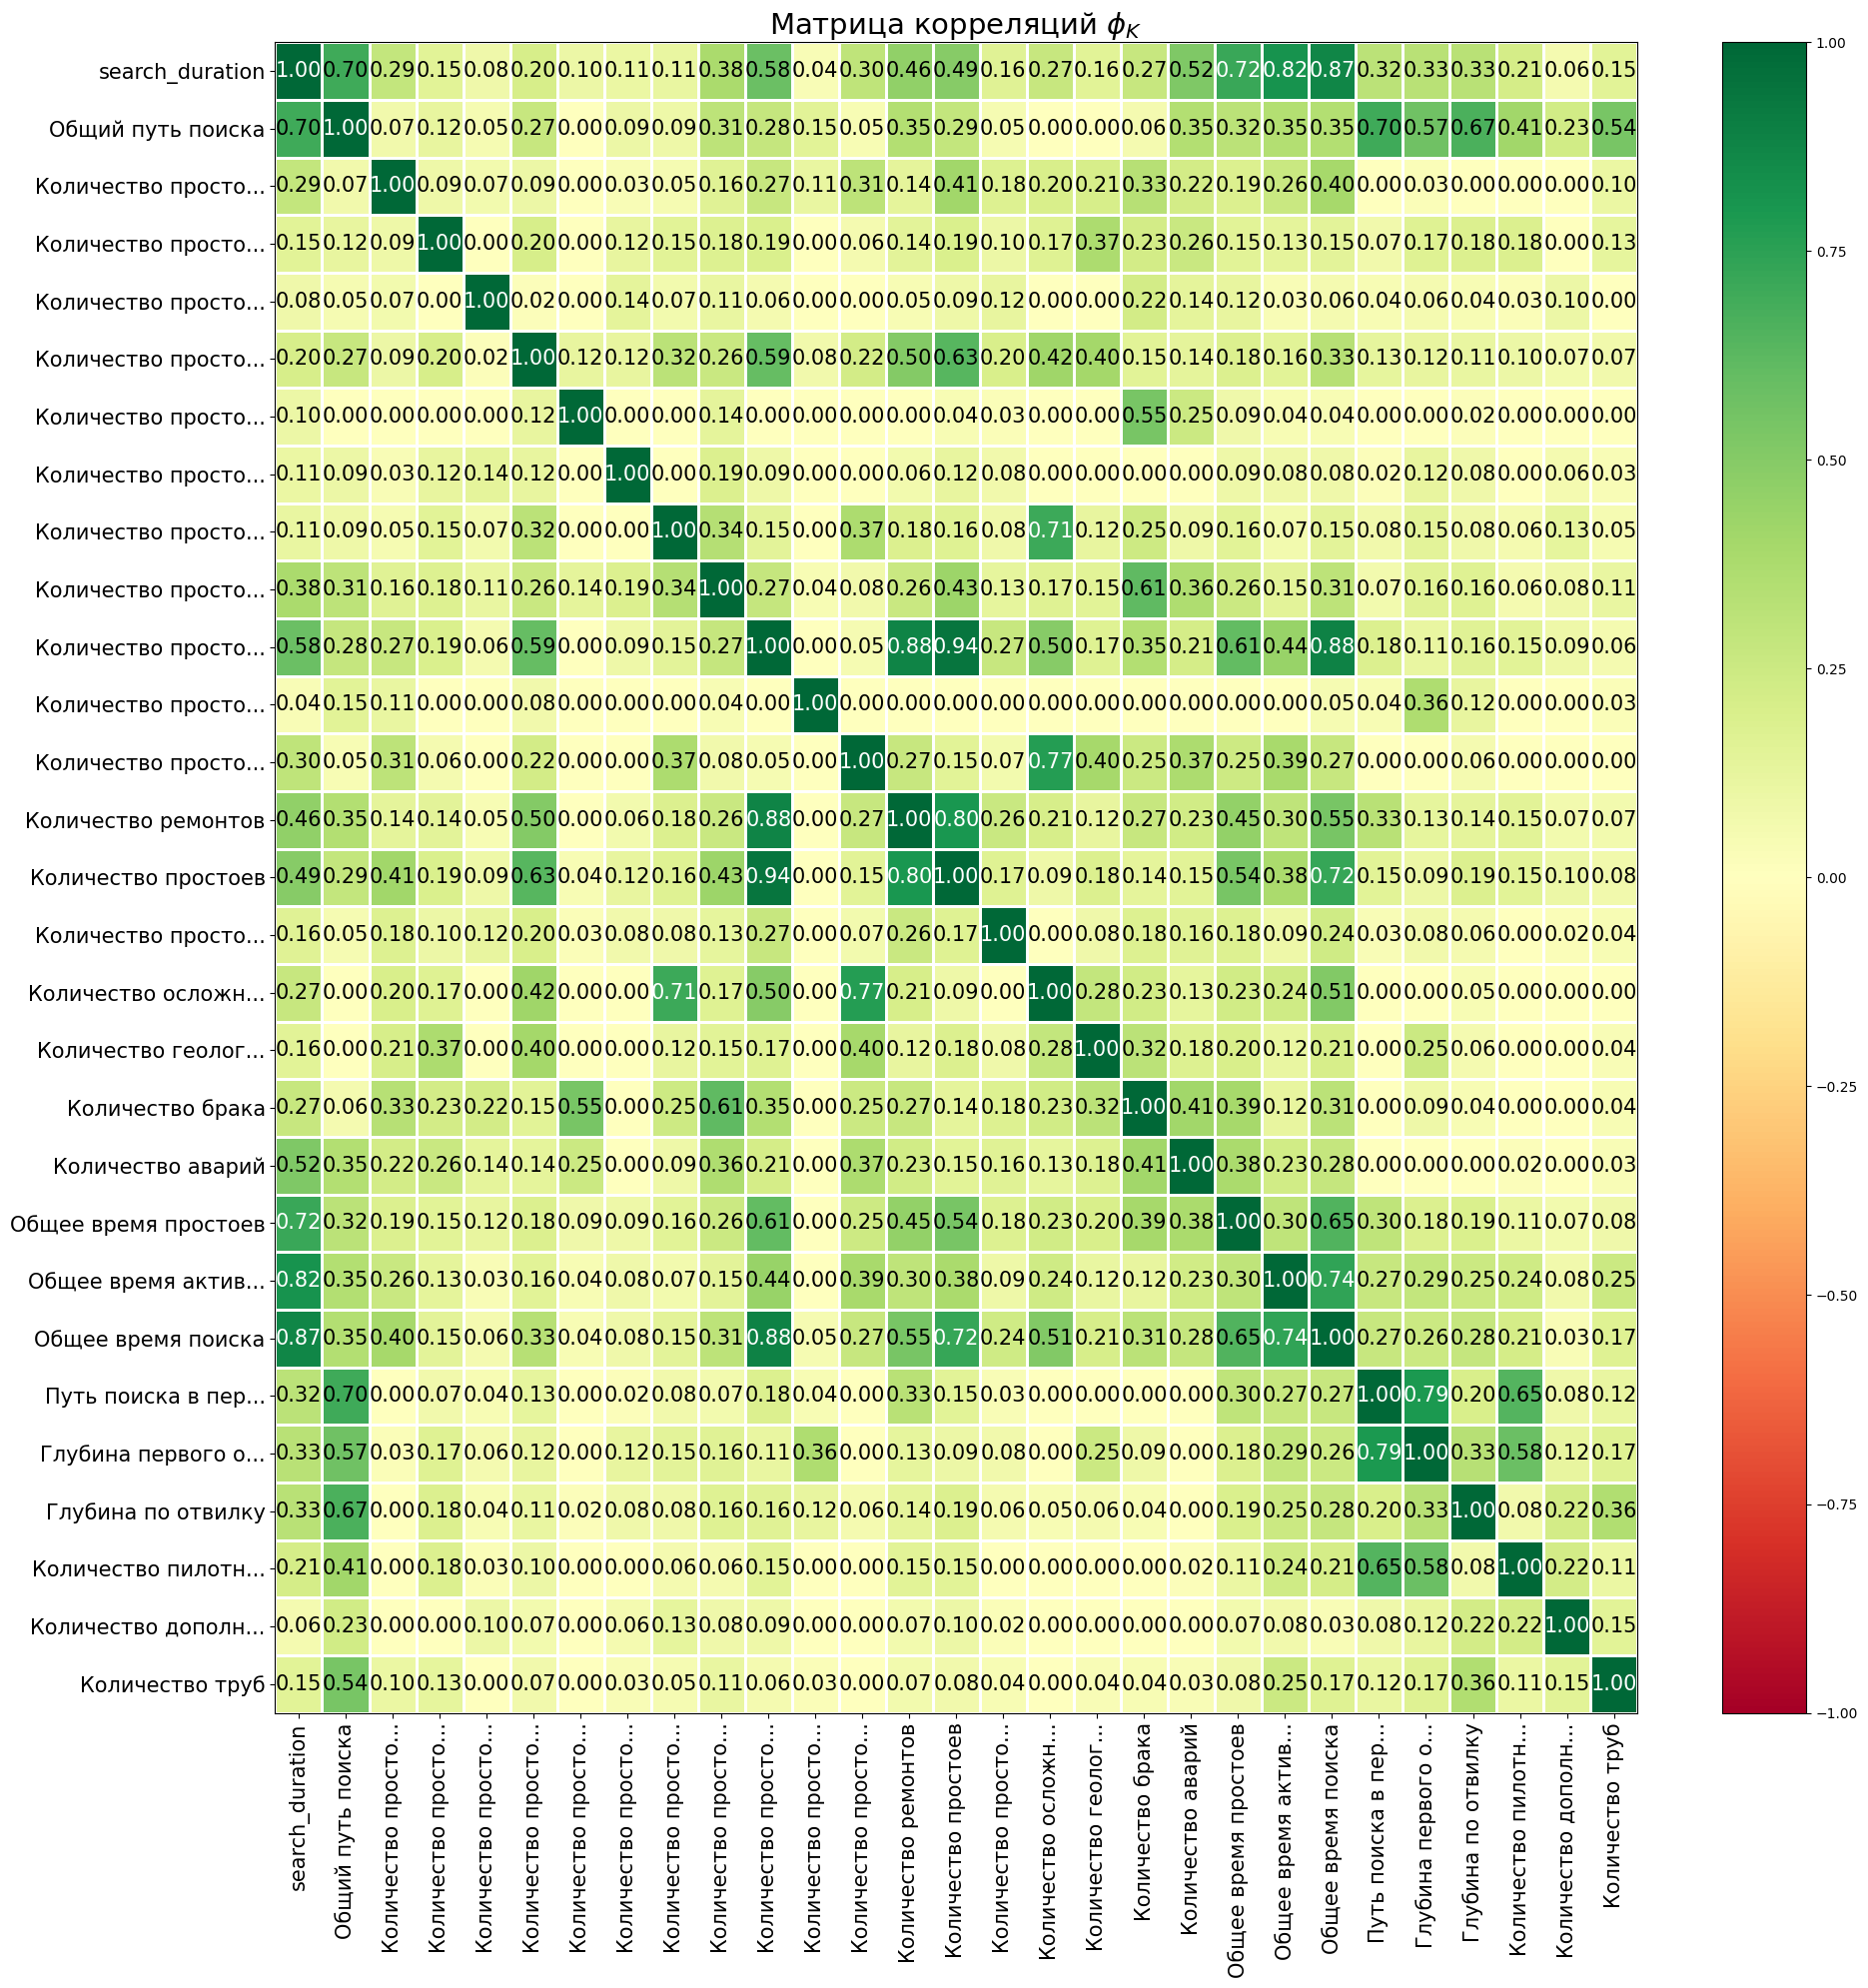

In [ ]:
from phik import phik_matrix
phik_features_matrix(df[data_num_cols], data_num_cols)

#Отбор признаков.

Отбор признаков для дальнейшего обучения модели важен, качество и адекватность прогнозов зависят от этого выбора.

В первую очередь исключены признаки с явной утечкой целвого признака. Это признаки общее время поиска, общее время активного поиска. Мои слова подтфердила матрица корреляций Фика, эти признаки и целевой признак мультиколлинеарны, зависимость между ними превышает 0.8.

Также удалению подлежат признаки связанные с человеческим фактором. Это признаки количество простоев по вине королевства, количество простоев по зельям,количество простоев по вине исследователей, количество простоев в контроле поиска. Заранее мы не можем знать какие будут приняты решения со стороны государства, исследователей, какие будут допущения по контрою поиска и какие растворы, химикаты и зеля будут использованы и величину их качества. Всё это зависит от человеческого фактора, а это спргнозировать крайне трудно на основе имеющихся данных. Также мои слова подтверждает слабая связь этих признаков с целевым.

Также в обучении не будет принимать участие признак количество простоев в конце расщелины. Пока рсщелина не исследована, то знать мы этого не можем.

Теперь по поводу остальных признаков, связанных с авариями, простоями, ремонтами и осложнениями. В случае с геологическими и метеологическими простоями всё понятно, здесь участие человеческого фактора мало, это данность, которая зависит от местности. Касательно остальных признаков количество осложнений, количество простоев, количество ремонтов, количество простоев без виновника, количество простоев в наклонном поиске, количество простоев по долбилам, количество простоев без виновника, количество простоев по креплениям, количество простоев (прочие). Эти признаки в меньшей степени связаны с человеческим фактором, например кол-ва аврий, ремонтов, простоев по долбилам, они могут быть свзяаны с износом или выходом из строя оборудования, обвалов, эрозии почв, грунтовых вод, затоплений и многих других специфических факторов, из-за которых поисковые операции могли замедлиться.

Следует рассмотреть признаки пройденного пути и глубины. Это признаки глубина по отвилку, глубина первого отвилка, путь поиска в первом отвилке, общее время простоев. Эти признаки потенциально могут помочь.

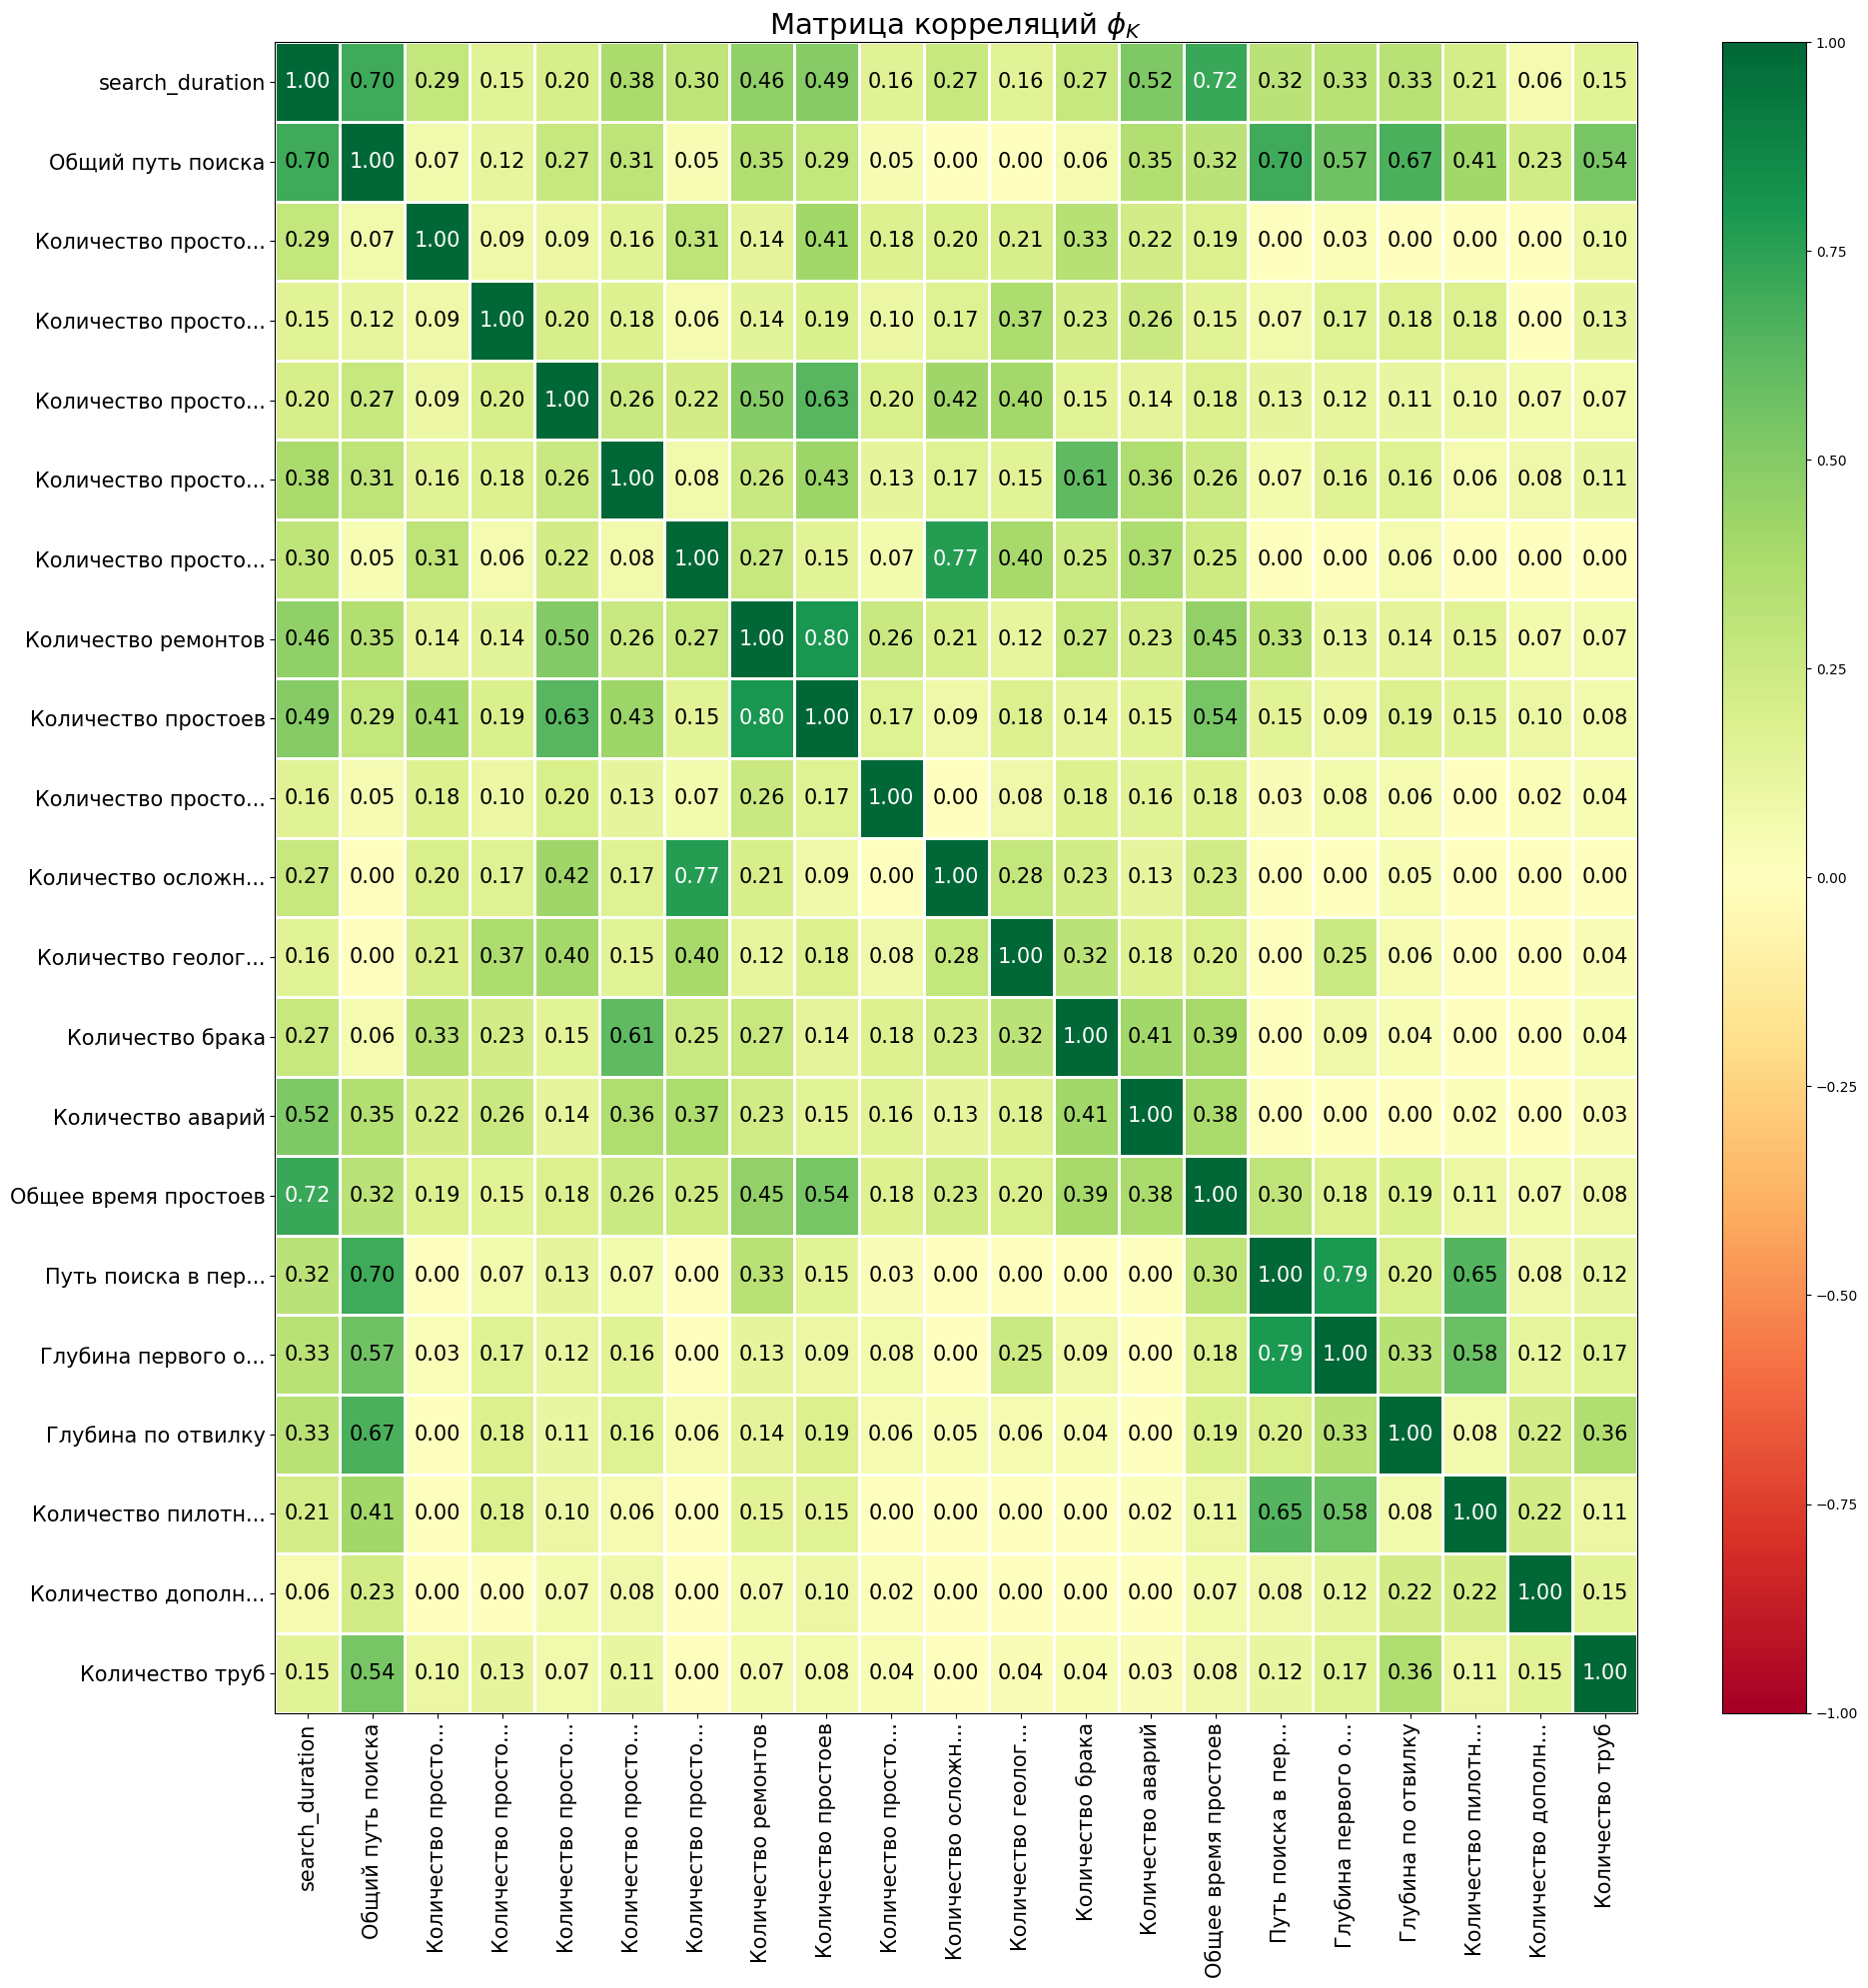

In [ ]:
phik_features_matrix(df[data_num_cols_new], data_num_cols_new)

In [ ]:
df[data_num_cols_new].info()

<class 'pandas.core.frame.DataFrame'>
Index: 13192 entries, 0 to 13414
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Количество труб                         13192 non-null  float64
 1   Количество дополнительных отвилков      13192 non-null  float64
 2   Количество пилотных отвилков            13192 non-null  float64
 3   Глубина по отвилку                      13192 non-null  float64
 4   Глубина первого отвилка                 13192 non-null  float64
 5   Путь поиска в первом отвилке            13192 non-null  float64
 6   Общее время простоев                    13192 non-null  float64
 7   Количество аварий                       13192 non-null  float64
 8   Количество брака                        13192 non-null  float64
 9   Количество геологических осложнений     13192 non-null  float64
 10  Количество осложнений                   13192 non-null  float64

# Обучение модели

##Выбор моделей и их сильные стороны

###CatBoostRegressor:

 CatBoost — градиентный бустинг, разработанный для эффективной работы c категориальными признаками, что делает его подходящим для вашего кейса, где имеются категориальные данные.

Автоматическая обработка пропусков и категориальных данных: Модель автоматически преобразует категориальные признаки и обрабатывает пропуски, что упрощает предобработку данных.

Работа с небольшими и большими объемами данных: CatBoost хорошо справляется как с большими, так и с малым количеством данных, что делает его универсальным выбором.

###DecisionTreeRegressor:

 Деревья решений легко интерпретировать, и они могут дать представление о важных признаках.
Работа с нелинейными зависимостями: DecisionTreeRegressor подходит для выявления сложных, нелинейных зависимостей, что полезно в случае, если факторы, влияющие на срок поиска, сложно моделировать линейно.
Быстрое обучение: Деревья решений имеют быструю скорость обучения, что полезно для начальной оценки модели.

###XGBRegressor:

XGBoost (градиентный бустинг) часто показывает высокую производительность за счет усиления на ошибках предыдущих деревьев, что позволяет улучшить точность на сложных данных.
Гибкость и настраиваемость: XGBoost предоставляет гибкость в настройке гиперпараметров и имеет встроенные функции регуляризации для предотвращения переобучения.
Подходит для структурированных данных: XGBRegressor широко применяется для табличных данных и часто дает высокое качество прогноза в таких задачах.

###LinearRegression:

 Линейная регрессия обеспечивает простую линейную модель, которая полезна для сравнения с более сложными моделями.
Интерпретируемость: Линейные модели легко интерпретировать, и они показывают, какой вклад вносят отдельные признаки. Это может быть полезным для анализа и объяснения результатов.
Эффективна при линейных связях: Если часть данных имеет линейные зависимости, линейная регрессия может успешно их улавливать, что повысит точность в комбинации с другими моделями.
RandomForestRegressor:

Устойчивость к выбросам и надежность:

### RandomForest:
 RandomForest является ансамблем деревьев решений, что делает его устойчивым к выбросам и шуму в данных.
Хорошо работает с признаками в различных масштабах: Лес решений способен учитывать сложные взаимодействия между признаками, а также работает с разными типами данных.
Устойчив к переобучению: RandomForest за счет усреднения предсказаний множества деревьев часто уменьшает риск переобучения, что полезно для более сложных задач регрессии.

In [ ]:
data_cols = data_cat_cols[data_cat_cols != 'Статус поиска']
data_cols = data_cols.append(pd.Index(['Время_года']))
data_num_cols_new = data_num_cols_new.append(pd.Index(['Суммарное_кол-во_простоев']))

In [ ]:
!pip install category_encoders
from category_encoders.target_encoder import TargetEncoder

  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.0 MB/s eta 0:00:00
Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [ ]:
final_feat = data_cols.append(data_num_cols_new)
final_feat

Index(['Наименование королевства', 'Наименование земли', 'Наименование хребта',
       'Наименование расщелины', 'Цель', 'Тип расщелины',
       'Категория расщелины', 'Назначение расщелины', 'Участки', 'Тип отвилка',
       'Технологическая особенность', 'Помощник по контролю поиска',
       'Помощник по поиску', 'Помощник по наклонным расщелинам',
       'Помощник по зельям', 'Помощник по долбилам',
       'Помощник по исследованиям', 'Помощник по укреплению',
       'Помощник по огненным заклятиям', 'Помощник по подвескам',
       'Помощник по вырезке окна', 'Тип инструмента', 'Время_года',
       'Количество труб', 'Количество дополнительных отвилков',
       'Количество пилотных отвилков', 'Глубина по отвилку',
       'Глубина первого отвилка', 'Путь поиска в первом отвилке',
       'Общее время простоев', 'Количество аварий', 'Количество брака',
       'Количество геологических осложнений', 'Количество осложнений',
       'Количество простоев по метеоусловиям', 'Количество просто

In [ ]:
from sklearn.ensemble import VotingRegressor

In [ ]:
X = df[final_feat].drop('search_duration', axis=1)
y = df['search_duration']

RANDOM_STATE = 42

y_binned = pd.qcut(y, q=5, labels=False)

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y_binned, random_state = RANDOM_STATE, test_size=0.25)

In [ ]:
cat_pipeline = Pipeline([
    ('target_enc', TargetEncoder())
])

In [ ]:
preprocessor_data = ColumnTransformer(
    [
        ('num', StandardScaler(), data_num_cols_new.drop('search_duration')),
        ('cat', cat_pipeline, data_cols)
    ]
)

In [ ]:
pipe_final = Pipeline(
    [
        ('preprocessor', preprocessor_data),
        ('models', VotingRegressor(estimators=[
            ('cbr', CatBoostRegressor(random_state=RANDOM_STATE)),
            ('dtr', DecisionTreeRegressor(random_state=RANDOM_STATE)),
            ('xgb', XGBRegressor(random_state=RANDOM_STATE)),
            ('lr', LinearRegression()),
            ('rfr', RandomForestRegressor(random_state=RANDOM_STATE))
        ]))
    ]
)

In [ ]:
params_rs = [

    {
        'models': [CatBoostRegressor(random_state=RANDOM_STATE, verbose=10)],
        'models__learning_rate':  [0.05, 0.1, 0.25],
        'models__max_depth': [8, 10, 12, 14],
        'models__n_estimators': [200, 500, 1000],
        'models__subsample': [0.8, 1.0],
        'models__colsample_bylevel': [0.8, 1.0],
        'models__l2_leaf_reg': [1, 3, 5, 10]
    },

    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(5, 25, 5),
        'models__min_samples_split': range(2, 20),
        'models__min_samples_leaf': range(1, 10),
        'models__max_features': ["auto", "sqrt", "log2"],
        'models__splitter': ['best', 'random']
    },

    {
        'models': [XGBRegressor(random_state=RANDOM_STATE, verbosity=1)],
        'models__learning_rate':  [0.05, 0.1, 0.25],
        'models__max_depth': [6, 10, 12, 15],
        'models__n_estimators': [200, 500, 1000],
        'models__subsample': [0.8, 1.0],
        'models__colsample_bytree': [0.8, 1.0],
        'models__reg_alpha': [0, 0.5, 1],
        'models__reg_lambda': [1, 1.5, 2]
    },

    {
        'models': [LinearRegression()],
        'models__normalize': [True, False]
    },

    {
        'models': [RandomForestRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(5, 25, 5),
        'models__min_samples_leaf': range(1, 10),
        'models__min_samples_split': range(2, 20),
        'models__n_estimators': [100, 200, 500, 1000],
        'models__max_features': ['auto', 'sqrt', 'log2'],
        'models__bootstrap': [True, False]
    }

]

In [ ]:
rscv = RandomizedSearchCV(
    pipe_final,
    params_rs,
    cv=5,
    n_jobs=-1, random_state=RANDOM_STATE,
    scoring='neg_mean_absolute_error')

In [ ]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 9894 entries, 12345 to 10942
Series name: search_duration
Non-Null Count  Dtype
--------------  -----
9894 non-null   int64
dtypes: int64(1)
memory usage: 154.6 KB


In [ ]:
rscv.fit(X_train, y_train)
rscv.best_estimator_

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **la

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Количество труб', 'Количество дополнительных отвилков',
       'Количество пилотных отвилков', 'Глубина по отвилку',
       'Глубина первого отвилка', 'Путь поиска в первом отвилке',
       'Общее время простоев', 'Количество аварий', 'Количество брака',
       'Количество геологических осложнений', 'Количеств...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=10, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

Лучшая модель XGBRegressor c параметрами

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
rscv.best_score_ * (-1)

np.float64(5.090365695953369)

### Качество предсказаний на целевой выборке

In [ ]:
y_pred = rscv.predict(X_test)
mean_absolute_error(y_test, y_pred)

4.846261501312256

На тестовых данных метрика MAE повысилась. В итоге МАЕ составило 4.81. Возможно качество повысилось в том числе, что в тестовую выборку попали более поздние исследования, у которых взаимосвязей больше.

В среднем моя модель ошибается в пределах 5 суток.

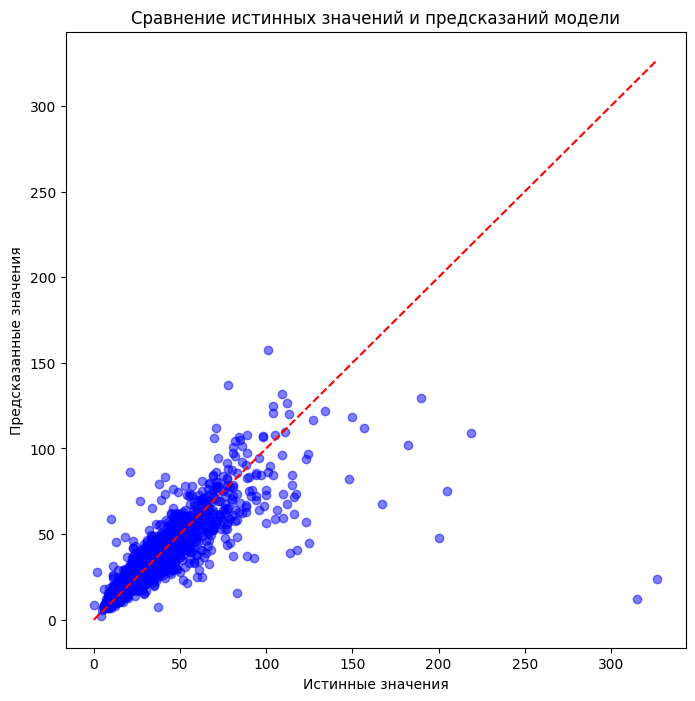

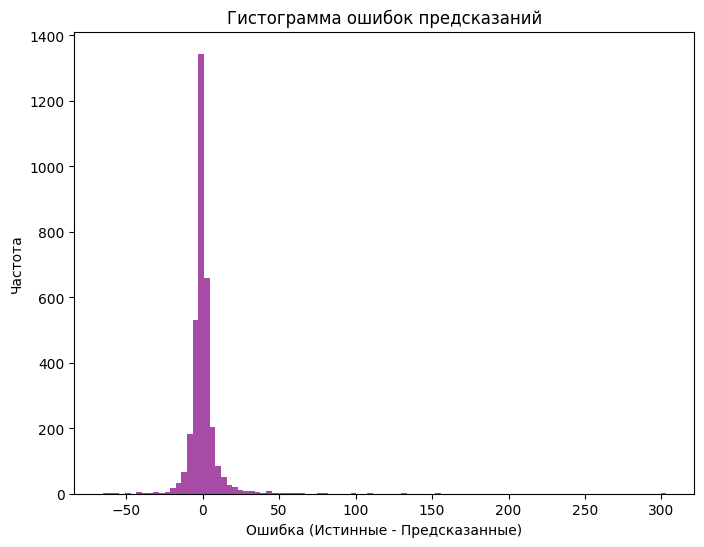

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("Истинные значения")
plt.ylabel("Предсказанные значения")
plt.title("Сравнение истинных значений и предсказаний модели")
plt.show()

errors = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=100, color='purple', alpha=0.7)
plt.xlabel("Ошибка (Истинные - Предсказанные)")
plt.ylabel("Частота")
plt.title("Гистограмма ошибок предсказаний")
plt.show()

#Значимость признаков

In [ ]:
X = df[final_feat].drop('search_duration', axis=1)
y = df['search_duration']

In [ ]:

from tensorflow.keras.layers import Embedding, Flatten, Concatenate, Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

quant_features = X.select_dtypes(include=[np.number]).columns.tolist()
cat_features = X.select_dtypes(include=[object]).columns.tolist()

scaler = StandardScaler()
X_numeric = scaler.fit_transform(X[quant_features])

X_categorical_all = []
for feature in cat_features:
    X[feature] = X[feature].astype('category')
    X_categorical_all.append(X[feature].cat.codes.values)

X_categorical_all = np.column_stack(X_categorical_all)

X_train_numeric, X_test_numeric, X_train_categorical, X_test_categorical, y_train, y_test = train_test_split(
    X_numeric, X_categorical_all, y, test_size=0.2, random_state=42)

In [ ]:

from tensorflow.keras.optimizers import Adam

input_numeric = Input(shape=(X_train_numeric.shape[1],), name="numeric_input")


embedding_layers = []
input_layers = [input_numeric]

for i in range(X_train_categorical.shape[1]):
    num_categories = len(np.unique(X_train_categorical[:, i]))
    input_cat = Input(shape=(1,), name=f"categorical_input_{i}")
    embedding = Embedding(input_dim=num_categories, output_dim=30, input_length=1)(input_cat)
    embedding_layers.append(Flatten()(embedding))
    input_layers.append(input_cat)  #

x = Concatenate()([input_numeric] + embedding_layers)

x = Dense(128, activation='relu', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(32, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)


output = Dense(1, activation='linear')(x)

model = Model(inputs=input_layers, outputs=output)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])


history = model.fit(
    [X_train_numeric] + [X_train_categorical[:, i] for i in range(X_train_categorical.shape[1])],
    y_train,
    validation_split=0.2,
    epochs=64,
    batch_size=32,
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/64
264/264 ━━━━━━━━━━━━━━━━━━━━ 30s 36ms/step - loss: 1287.1240 - mae: 30.6785 - val_loss: 1190.3607 - val_mae: 30.8524
Epoch 2/64
264/264 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 869.4584 - mae: 25.3182 - val_loss: 523.3780 - val_mae: 19.1959
Epoch 3/64
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 439.6991 - mae: 16.7013 - val_loss: 237.5261 - val_mae: 9.3065
Epoch 4/64
264/264 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 193.9627 - mae: 9.4870 - val_loss: 178.4862 - val_mae: 6.1812
Epoch 5/64
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 158.9921 - mae: 7.5243 - val_loss: 186.5498 - val_mae: 6.2937
Epoch 6/64
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 191.9769 - mae: 7.7295 - val_loss: 215.7829 - val_mae: 6.2172
Epoch 7/64
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 165.4671 - mae: 7.3030 - val_loss: 219.4205 - val_mae: 6.1973
Epoch 8/64
264/264 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 174.6946 - mae: 7.5430 - val_loss: 197.3144 - val_mae: 6.0330
Epoch 9/64
264/

In [ ]:
y_pred = model.predict([X_test_numeric] + [X_test_categorical[:, i] for i in range(X_test_categorical.shape[1])])

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE) на тестовых данных:", mae)

83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step
Mean Absolute Error (MAE) на тестовых данных: 6.5876054763793945


Показатель МАЕ на тестовой выборке проигрывает модели XGBoost по итогам работы ансамблевого метода. МАЕ составил 5.69.

Лучшим выбором остается ансамбль моделей с показателем MAE равным 4.77

#Рекомендации

  1. Оптимизация процесса предсказания

  Рекомендуется разработать стандарты и процедуры для сбора данных, чтобы снизить количество пропусков и аномалий. Качественные данные позволят повысить точность прогнозов, а также упростят их интерпретацию. Если данные собираются на разных этапах поисковых работ, регулярное обновление модели с учетом новых данных (возможно, в онлайн-режиме) может повысить точность предсказания.

  При обучении моделей разделение на квантили по срокам (например, разделение на группы по коротким, средним и длинным срокам) может помочь создать модели, которые будут лучше справляться с предсказанием в каждом из интервалов.

  2. Технические рекомендации для улучшения модели

  Не будет лишним провести оценку важности признаков, чтобы выделить те, которые наиболее значимо влияют на прогноз. Такие признаки, как "геологические осложнения" и "метеоусловия", вероятно, имеют большой вес, и их анализ может помочь лучше понять, какие именно факторы приводят к задержкам. Необходимо привлекать помощников геологов и геодезистов с целью изучения грунтов и пород, их прочности. А также важно составлять карты рельефа.

  В будущем можно добавить признаки, связанные с внешними факторами, такими как сезонные или погодные условия, которые могут повлиять на сроки. Также можно дополнительно анализировать эффективность конкретных команд, задействованных в поиске, или использовать данные о прошлых работах в аналогичных условиях.

  Необходимо продолжить экспериментировать с ансамблями моделей, такими как случайный лес и градиентный бустинг, которые хорошо работают с табличными данными и позволяют учесть нелинейные зависимости. Ансамбли могут снизить ошибку модели за счет объединения сильных сторон разных подходов к предсказанию.

  Также настройка гиперпараметров с помощью методов вроде кросс-валидации или поиска по сетке (Grid Search) поможет улучшить качество прогнозов. Это особенно полезно для моделей бустинга и случайного леса.

  3. Рекомендации для бизнес-процессов

 На основе предсказанных сроков можно разделить проекты на группы по риску задержек и заранее выделять больше ресурсов на сложные задачи. Такой подход позволяет снизить риски значительных отклонений по срокам.

 На основе анализа данных можно создать рекомендации по снижению простоев. Например, если из данных следует, что определенные геологические или метеорологические условия часто становятся причиной задержек, можно заранее принимать меры предосторожности.

 Использование модели для прогнозирования сроков позволяет более точно планировать ресурсы. В частности, можно предусмотреть распределение специалистов и техники в зависимости от сложности условий.

 Поскольку данные могут со временем изменяться, полезно разрабатывать политику регулярного обновления модели, чтобы она сохраняла актуальность. Использование подходов к обучению на новых данных, таких как онлайн-обучение, позволит учесть изменения в процессе и повысить точность прогнозов.

###Заключение
  Эти рекомендации помогут улучшить точность прогнозирования и оптимизировать поисковые процессы. Снизив задержки и затраты, связанные с поисковыми работами, компания сможет повысить производительность и сократить издержки.